<a href="https://colab.research.google.com/github/PhungVietBac/FD/blob/main/FD_private.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of the Intrusion Detection Evaluation Dataset (UNSW-NB15)**
[Dataset Link](https://www.unb.ca/cic/datasets/ids-2017.html)







## **1.  An overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models.**

*   **Dataset Characteristics:**
*   **Exploratory Data Analysis:**
*   **Data Prepocessing:**
*   **Data Analysis:**
*   **ML Models:**
*   **Performance Evaluation:**

## **2.  Dataset Characteristics and Exploratory Data Analysis**

### **2.1 Load, View Data and Show Analysis on Rows and Columns**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
data1 = pd.read_csv('/content/drive/MyDrive/Training and Testing Sets/UNSW_NB15_training-set.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Training and Testing Sets/UNSW_NB15_testing-set.csv')

In [ ]:
data_list = [data1, data2]

print('Data dimensions:')
for i, data in enumerate(data_list, start=1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions:
Data1 -> 175341 rows, 45 columns
Data2 -> 82332 rows, 45 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 257673
Number of columns: 45
Total cells: 11595285


In [ ]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns=col_names, inplace=True)

In [ ]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


count          mean           std   min           25%  \
id                 257673.0  7.281182e+04  4.892992e+04   1.0  32210.000000   
dur                257673.0  1.246715e+00  5.974305e+00   0.0      0.000008   
spkts              257673.0  1.977714e+01  1.359472e+02   1.0      2.000000   
dpkts              257673.0  1.851470e+01  1.119860e+02   0.0      0.000000   
sbytes             257673.0  8.572952e+03  1.737739e+05  24.0    114.000000   
dbytes             257673.0  1.438729e+04  1.461993e+05   0.0      0.000000   
rate               257673.0  9.125391e+04  1.603446e+05   0.0     30.789277   
sttl               257673.0  1.800009e+02  1.024883e+02   0.0     62.000000   
dttl               257673.0  8.475496e+01  1.127621e+02   0.0      0.000000   
sload              257673.0  7.060869e+07  1.857313e+08   0.0  12318.004880   
dload              257673.0  6.582143e+05  2.412372e+06   0.0      0.000000   
sloss              257673.0  4.889317e+00  6.557495e+01   0.0      0.000000   
dloss              257673.0  6.743691e+00  5.370222e+01   0.0      0.000000   
sinpkt             257673.0  9.123008e+02  6.922153e+03   0.0      0.008000   
dinpkt             257673.0  9.891546e+01  1.094049e+03   0.0      0.000000   
sjit               257673.0  5.419373e+03  4.903450e+04   0.0      0.000000   
djit               257673.0  5.822515e+02  3.930153e+03   0.0      0.000000   
swin               257673.0  1.217537e+02  1.273674e+02   0.0      0.000000   
stcpb              257673.0  1.006120e+09  1.367795e+09   0.0      0.000000   
dtcpb              257673.0  1.002295e+09  1.363877e+09   0.0      0.000000   
dwin               257673.0  1.192546e+02  1.272305e+02   0.0      0.000000   
tcprtt             257673.0  4.603810e-02  9.290834e-02   0.0      0.000000   
synack             257673.0  2.365186e-02  5.385637e-02   0.0      0.000000   
ackdat             257673.0  2.238624e-02  4.577063e-02   0.0      0.000000   
smean              257673.0  1.376390e+02  2.059011e+02  24.0     57.000000   
dmean              257673.0  1.216497e+02  2.540410e+02   0.0      0.000000   
trans_depth        257673.0  1.022420e-01  7.105928e-01   0.0      0.000000   
response_body_len  257673.0  1.968900e+03  4.962523e+04   0.0      0.000000   
ct_srv_src         257673.0  9.383176e+00  1.082971e+01   1.0      2.000000   
ct_state_ttl       257673.0  1.324978e+00  9.922998e-01   0.0      1.000000   
ct_dst_ltm         257673.0  6.050467e+00  8.173749e+00   1.0      1.000000   
ct_src_dport_ltm   257673.0  5.238271e+00  8.160822e+00   1.0      1.000000   
ct_dst_sport_ltm   257673.0  4.032677e+00  5.831515e+00   1.0      1.000000   
ct_dst_src_ltm     257673.0  8.322964e+00  1.112075e+01   1.0      1.000000   
is_ftp_login       257673.0  1.281857e-02  1.160907e-01   0.0      0.000000   
ct_ftp_cmd         257673.0  1.284962e-02  1.164211e-01   0.0      0.000000   
ct_flw_http_mthd   257673.0  1.320045e-01  6.818536e-01   0.0      0.000000   
ct_src_ltm         257673.0  6.800045e+00  8.396266e+00   1.0      2.000000   
ct_srv_dst         257673.0  9.121049e+00  1.087475e+01   1.0      2.000000   
is_sm_ips_ports    257673.0  1.427391e-02  1.186179e-01   0.0      0.000000   
label              257673.0  6.390774e-01  4.802691e-01   0.0      0.000000   

                             50%           75%           max  
id                  64419.000000  1.109230e+05  1.753410e+05  
dur                     0.004285  6.857770e-01  5.999999e+01  
spkts                   4.000000  1.200000e+01  1.064600e+04  
dpkts                   2.000000  1.000000e+01  1.101800e+04  
sbytes                528.000000  1.362000e+03  1.435577e+07  
dbytes                178.000000  1.064000e+03  1.465753e+07  
rate                 2955.664893  1.250000e+05  1.000000e+06  
sttl                  254.000000  2.540000e+02  2.550000e+02  
dttl                   29.000000  2.520000e+02  2.540000e+02  
sload              743942.312500  8.000000e+07  5.988000e+09  
dload     

In [ ]:
pd.options.display.max_columns = 80
data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478   tcp       -   FIN      6      4     258     172   
1          2  0.649902   tcp       -   FIN     14     38     734   42014   
2          3  1.623129   tcp       -   FIN      8     16     364   13186   
3          4  1.681642   tcp     ftp   FIN     12     12     628     770   
4          5  0.449454   tcp       -   FIN     10      6     534     268   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  dttl         sload          dload  sloss  dloss  \
0          74.087490   252   254  1.415894e+04    8495.365234      0      0   
1          78.473372    62   252  8.395112e+03  503571.312500      2     17   
2          14.170161    62   252  1.572272e+03   60929.230470      1      6   
3          13.677108    62   252  2.740179e+03    3358.622070      1      3   
4          33.373826   254   252  8.561499e+03    3987.059814      2      1   
...              ...   ...   ...           ...            ...    ...    ...   
82327  200000.005100   254     0  8.320000e+07       0.000000      0      0   
82328      24.410067   254   252  1.241044e+05    2242.109863      7      1   
82329       0.000000     0     0  0.000000e+00       0.000000      0      0   
82330       0.000000     0     0  0.000000e+00       0.000000      0      0   
82331  111111.107200   254     0  4.622222e+07       0.000000      0      0   

             sinpkt      dinpkt          sjit          djit  swin       stcpb  \
0         24.295600    8.375000     30.177547     11.830604   255   621772692   
1         49.915000   15.432865     61.426934   1387.778330   255  1417884146   
2        231.875571  102.737203  17179.586860  11420.926230   255  2116150707   
3        152.876547   90.235726    259.080172   4991.784669   255  1107119177   
4         47.750333   75.659602   2415.837634    115.807000   255  2436137549   
...             ...         ...           ...           ...   ...         ...   
82327      0.005000    0.000000      0.000000      0.000000     0           0   
82328     55.880051  143.700000   4798.130981    190.980813   255  1072535109   
82329  60000.720000    0.000000      0.000000      0.000000     0           0   
82330  60000.732000    0.000000     10.954518      0.000000     0           0   
82331      0.009000    0.000000      0.000000      0.000000     0           0   

            dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  \
0      2202533631   255  0.000000  0.000000  0.000000     43     43   
1      3077387971   255  0.000000  0.000000  0.000000     52   1106   
2      2963114973   255  0.111897  0.061458  0.050439     46    824   
3      1047442890   255  0.000000  0.000000  0.000000     52     64   
4      1977154190   255  0.128381  0.071147  0.057234     53     45   
...           ...   ...       ...       ...       ...    ...    ...   
82327           0     0  0.000000  0.000000  0.000000     52      0   
82328  3284291478   255  0.173208  0.100191  0.073017    903     44   
82329           0     0  0.000000  0.000000  0.000000     46      0   
82330           0     0  0.000000  0.000000  0.000000     46      0   
82331           0     0  0.000000  0.000000  0.000000     52      0   

       trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0                0                  0           1             0           1   
1                0                  0          43             1           1   
2                0                  0           7             1           2   
3     

### **2.2 Data Cleaning**

#### **Identifying duplicate values**

In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 0


In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(257673, 45)

#### **Identifying missing values**

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include=np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace=True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 0
Missing values after processing infinite values: 0


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Series([], dtype: int64)


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis=1)
mis_table = mis_table.rename(columns={0: 'Missing Values', 1: 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

Empty DataFrame
Columns: [Missing Values, Percentage of Total Values]
Index: []


#### **Visualization of missing data**

In [ ]:
# sns.set_palette('pastel')
# colors = sns.color_palette()

# missing_vals = [col for col in data.columns if data[col].isnull().any()]

# fig, ax = plt.subplots(figsize=(2,6))
# msno.bar(data[missing_vals], ax=ax, fontsize=12, color=colors)
# ax.set_xlabel('Features', fontsize=12)
# ax.set_ylabel('Non-Null Value Count', fontsize=12)
# ax.set_title('Missing Value Chart', fontsize=12)
# plt.show()

#### **Dealing with missing values (Columns with missing data)**

In [ ]:
# plt.figure(figsize=(8,3))
# sns.boxplot(x=data[''])
# plt.xlabel('Boxplot of ')
# plt.show()

In [ ]:
# colors = sns.color_palette('Blues')
# plt.hist(data[''], color=colors[1])
# plt.title('Histogram of ')
# plt.xlabel('')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# med = data[''].median()

# print('Median of :', med)

In [ ]:
# # Filling missing values with median
# data[''].fillna(med, inplace=True)

In [ ]:
# print('Number of  missing values:', data[''].isna().sum())

### **2.3 Analysing Patterns using Visualizations**

#### **Visualization of column correlaction. Also, ploting Heat Map**

In [ ]:
data['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
# Types of attacks & normal instances (Normal)
data['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'Normal': 'Normal',
    'Generic': 'Generic',
    'Exploits': 'Exploits',
    'Fuzzers': 'Fuzzers',
    'DoS': 'DoS',
    'Reconnaissance': 'Reconnaissance',
    'Analysis': 'Analysis',
    'Backdoor': 'Backdoor',
    'Shellcode': 'Shellcode',
    'Worms': 'Worms'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['attack_cat'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

Attack Type
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
data.drop('attack_cat', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[6 1 0 4 8 7 3 2 9 5]


In [ ]:
# Printing corresponding attack type for each encoded value
encode_values = data['Attack Number'].unique()
for val in sorted(encode_values):
  print(f"{val}: {le.inverse_transform([val])[0]}")

0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


In [ ]:
corr = data.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

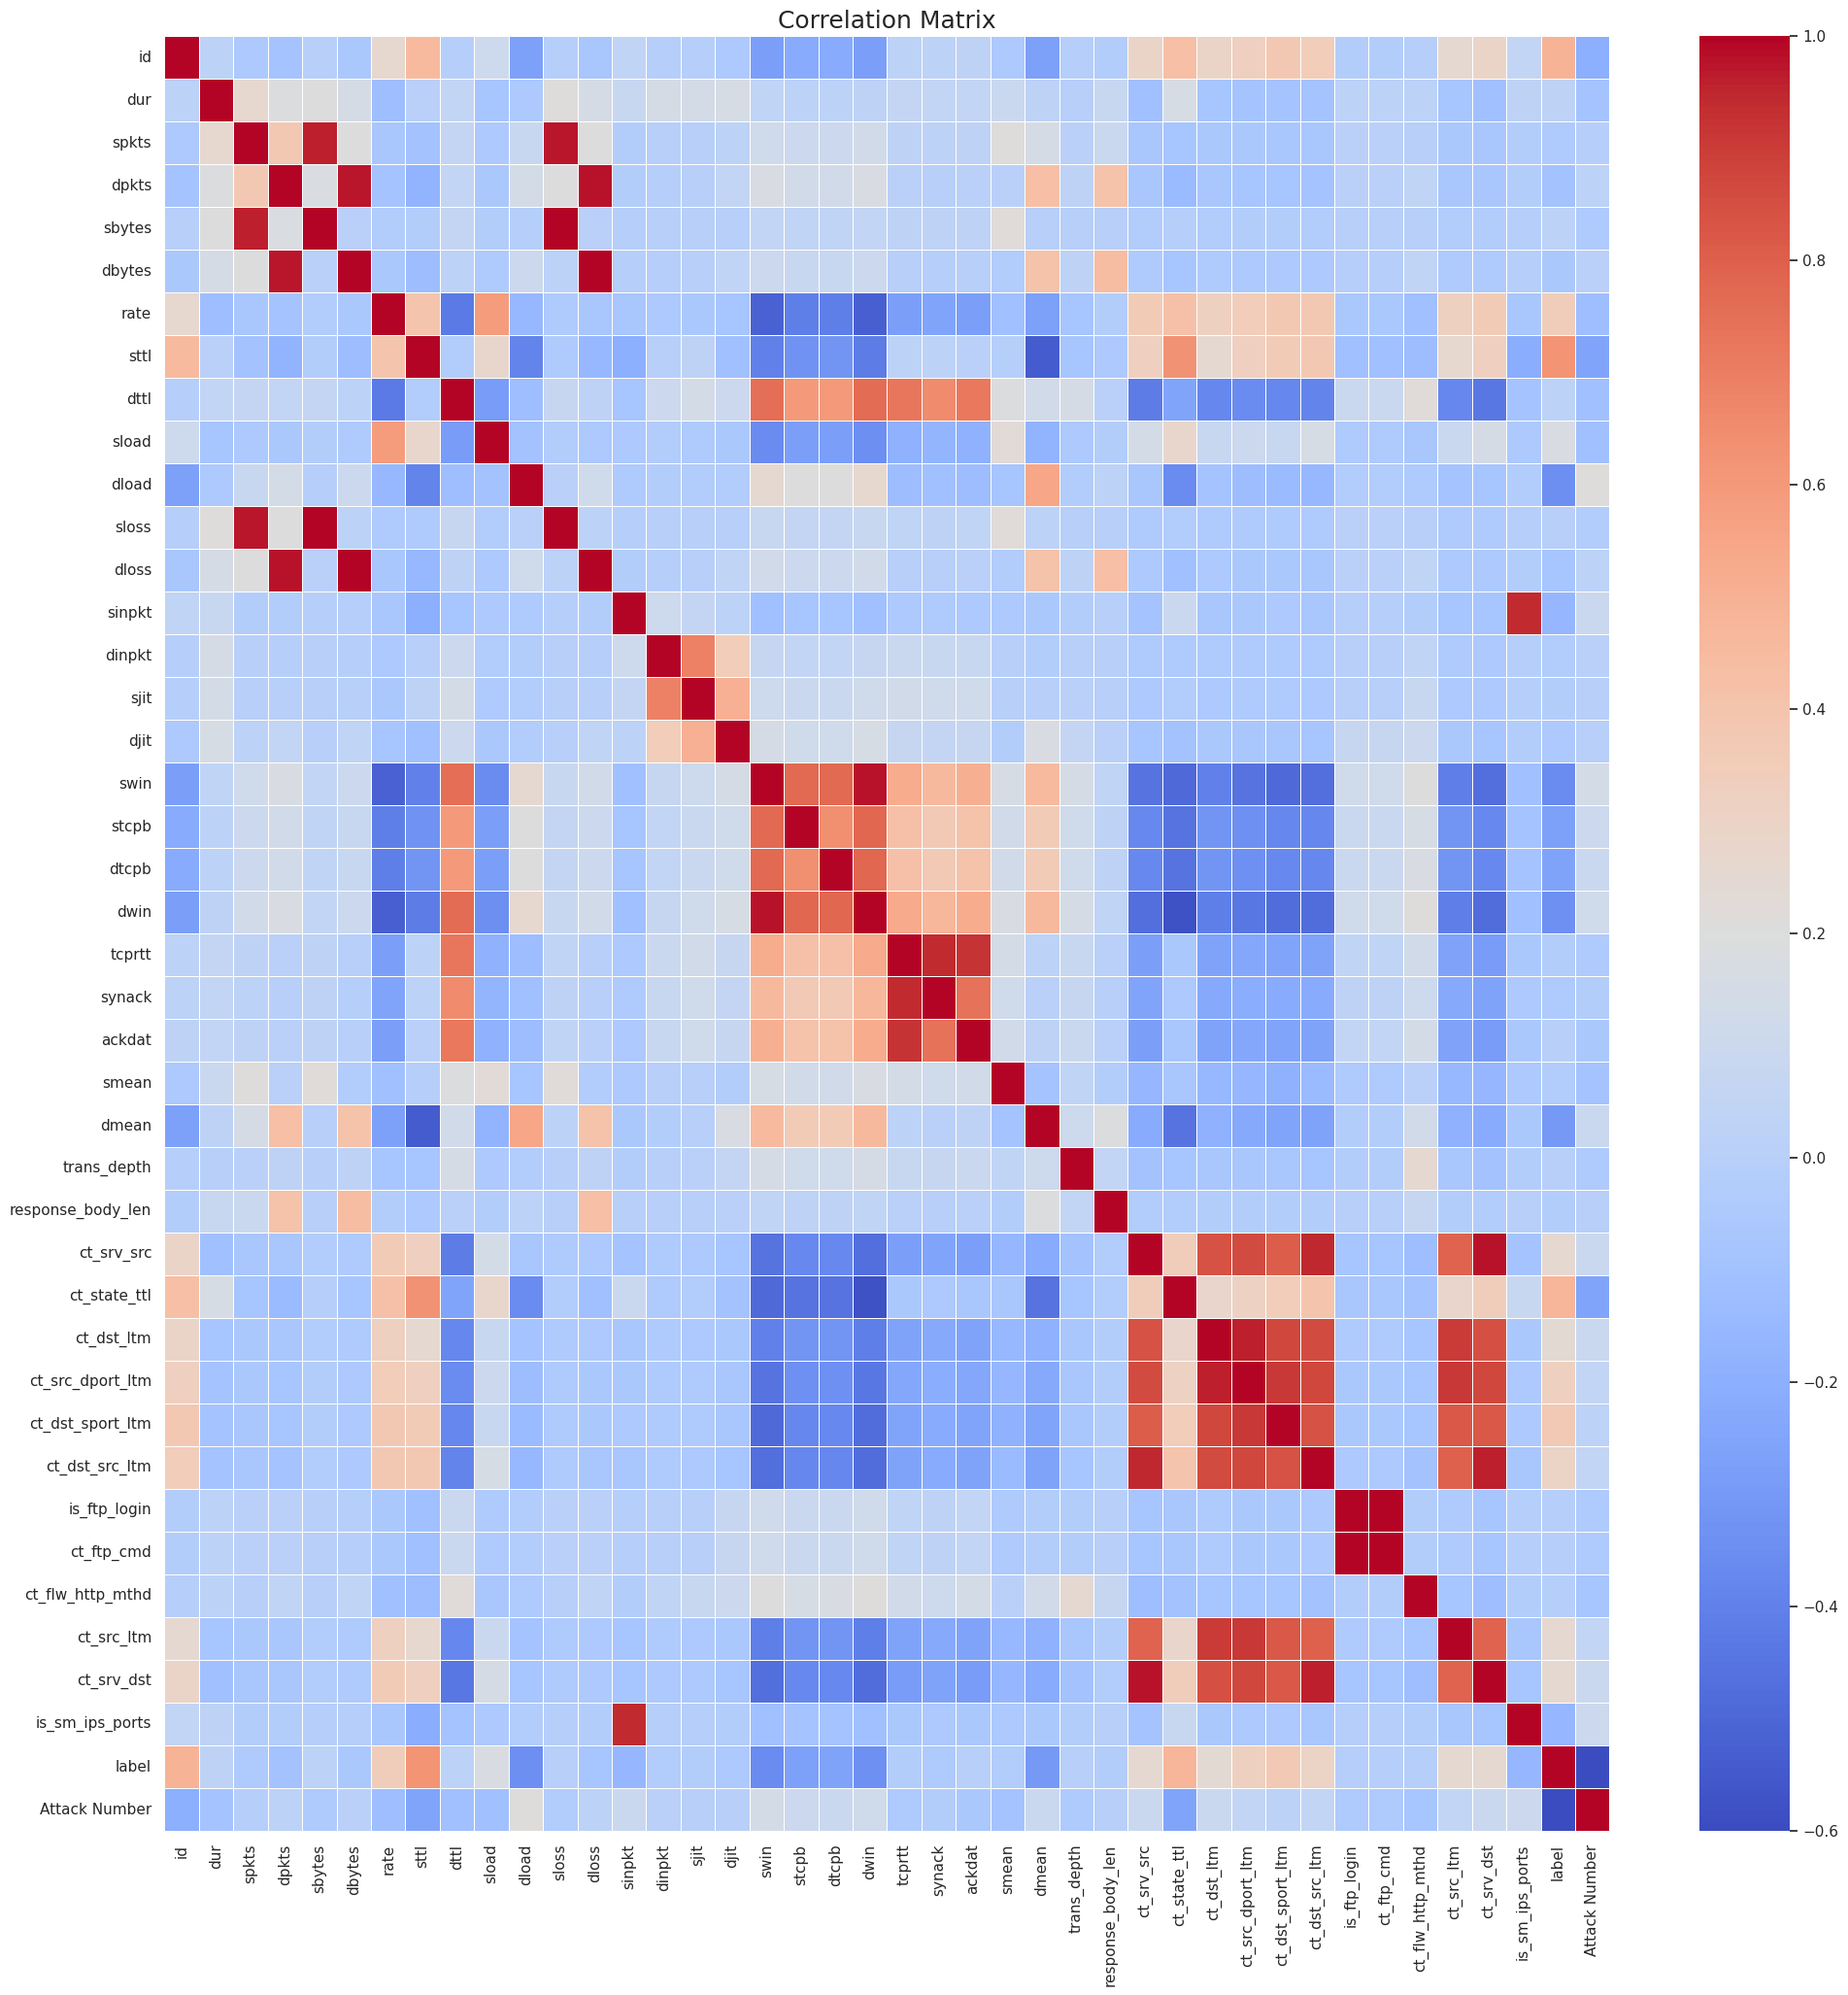

In [ ]:
fig, ax = plt.subplots(figsize=(24,24))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start=1):
  corr_value = corr.loc[feature, 'Attack Number']
  print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  dpkts                    :0.02
2.  dbytes                   :0.01
3.  dload                    :0.21
4.  dloss                    :0.02
5.  sinpkt                   :0.09
6.  dinpkt                   :0.01
7.  swin                     :0.14
8.  stcpb                    :0.1
9.  dtcpb                    :0.09
10. dwin                     :0.12
11. dmean                    :0.09
12. ct_srv_src               :0.09
13. ct_dst_ltm               :0.09
14. ct_src_dport_ltm         :0.05
15. ct_dst_sport_ltm         :0.02
16. ct_dst_src_ltm           :0.05
17. ct_src_ltm               :0.05
18. ct_srv_dst               :0.09
19. is_sm_ips_ports          :0.1


In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 19


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only=True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

[]

#### **Visualization of Linear Relationships of columns (Continuous Numerical Variables)**

In [ ]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n=sample_size, replace=False, random_state=0)
sampled_data.shape

(51534, 46)

In [ ]:
# To assess if a sample is representative of the population and comparision of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print('Descriptive Statistics Comparision (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
  old = data[col].describe()[1]
  new = sampled_data[col].describe()[1]
  if old == 0:
    pct = 0
  else:
    pct = abs((new - old) / old)
  if pct * 100 > 5:
    high_variations.append((col, pct * 100))
  print('{:<32s}{:<22.6f}{:<22.6f}{:2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparision (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
id                              72811.823858          72679.738736          0.18%
dur                             1.246715              1.248327              0.13%
spkts                           19.777144             20.187895             2.08%
dpkts                           18.514703             18.989813             2.57%
sbytes                          8572.951803           9125.803799           6.45%
dbytes                          14387.287543          15010.356580          4.33%
rate                            91253.912440          91502.533871          0.27%
sttl                            180.000931            179.892576            0.06%
dttl                            84.754957             84.409109             0.41%
sload                   

/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as pos

djit                            582.251456            581.399803            0.15%
swin                            121.753661            121.384309            0.30%
stcpb                           1006120340.177803     1001906323.831548     0.42%
dtcpb                           1002295002.140725     997385760.715101      0.49%
dwin                            119.254629            118.824834            0.36%
tcprtt                          0.046038              0.045734              0.66%
synack                          0.023652              0.023549              0.43%
ackdat                          0.022386              0.022185              0.90%
smean                           137.639027            139.773819            1.55%
dmean                           121.649703            120.966081            0.56%
trans_depth                     0.102242              0.102030              0.21%
response_body_len               1968.900121           2181.785132           10.81%
ct_srv_src     

/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as pos

ct_src_dport_ltm                5.238271              5.229596              0.17%
ct_dst_sport_ltm                4.032677              4.020821              0.29%
ct_dst_src_ltm                  8.322964              8.301432              0.26%
is_ftp_login                    0.012819              0.012341              3.72%
ct_ftp_cmd                      0.012850              0.012361              3.80%
ct_flw_http_mthd                0.132005              0.130807              0.91%
ct_src_ltm                      6.800045              6.803916              0.06%
ct_srv_dst                      9.121049              9.099235              0.24%
is_sm_ips_ports                 0.014274              0.014437              1.14%
label                           0.639077              0.638045              0.16%
Attack Number                   4.771598              4.773218              0.03%


/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-4083501089.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-4083501089.py:10: FutureWarning: Series.__getitem__ treating keys as pos

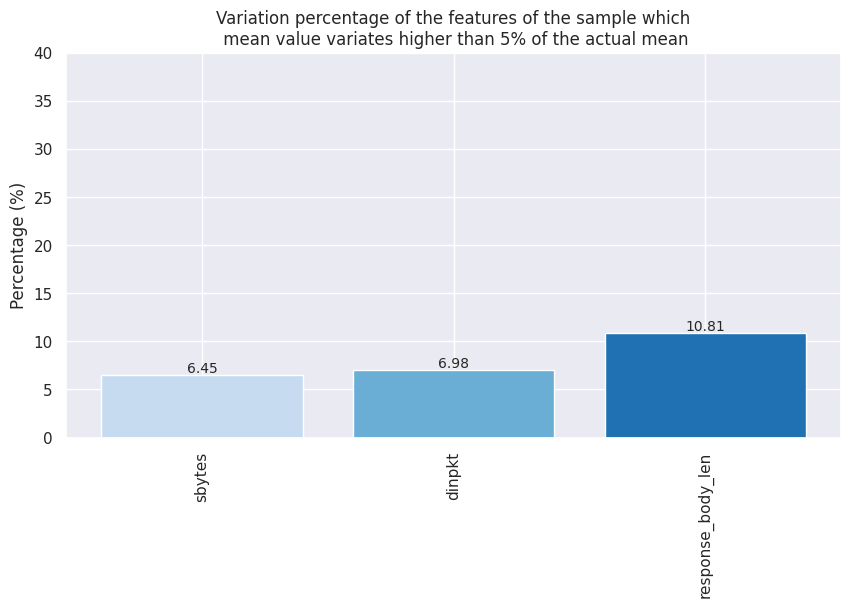

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(labels, values, color=colors)

for i in range(len(labels)):
  ax.text(i, values[i], str(round(values[i], 2)), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
ax.set_title('Variation percentage of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(sampled_data.columns[:-1], start=1):
  print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  id                            : 48247
2.  dur                           : 24981
3.  proto                         : 132
4.  service                       : 13
5.  state                         : 8
6.  spkts                         : 322
7.  dpkts                         : 327
8.  sbytes                        : 3588
9.  dbytes                        : 3107
10. rate                          : 25339
11. sttl                          : 12
12. dttl                          : 9
13. sload                         : 26913
14. dload                         : 25197
15. sloss                         : 226
16. dloss                         : 261
17. sinpkt                        : 24941
18. dinpkt                        : 23710
19. sjit                          : 24788
20. djit                          : 23992
21. swin                          : 3
22. stcpb                         : 23753
23. dtcpb                         : 23689
24. dwin                          : 5
2

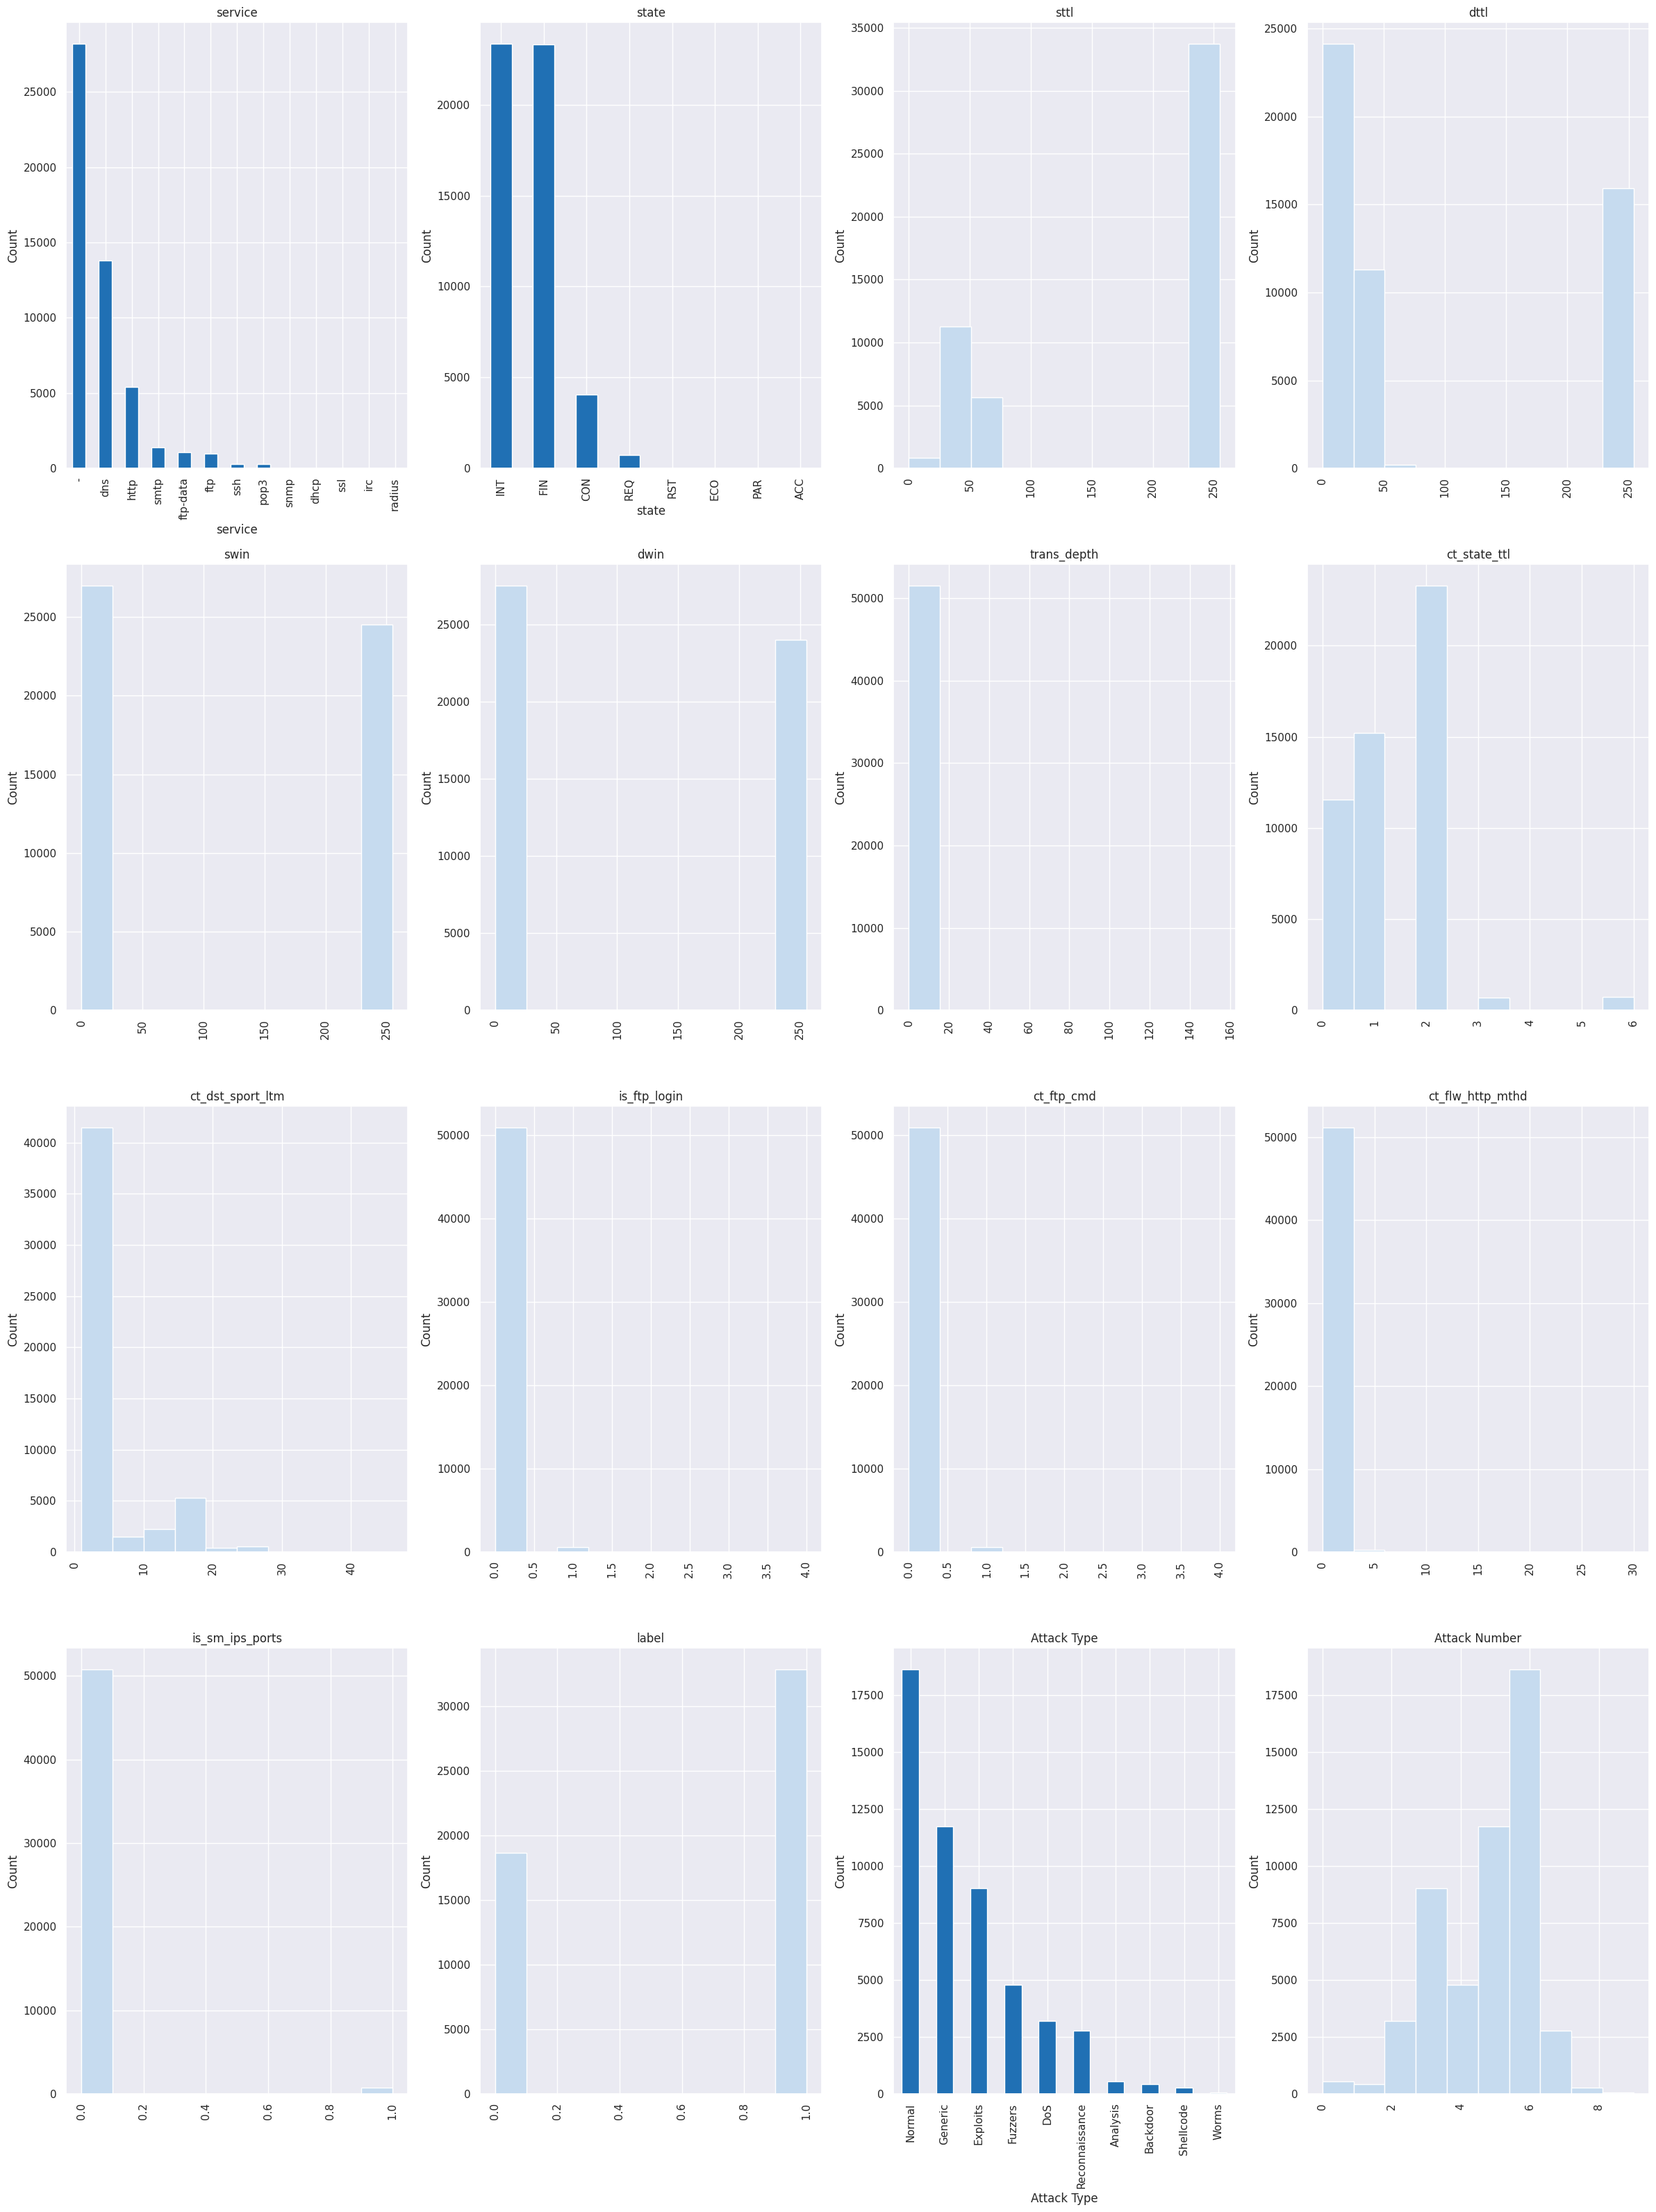

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors=3)
plt.figure(figsize=(6 * 4, 8 * num_of_rows))

for i in range(cols):
  plt.subplot(num_of_rows, 4, i + 1)
  col_data = selected_cols.iloc[:, i]
  if col_data.dtype.name == 'object':
    col_data.value_counts().plot(kind='bar', color=color_palette[2])
  else:
    col_data.hist(color=color_palette[0])

  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only=True).round(2)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

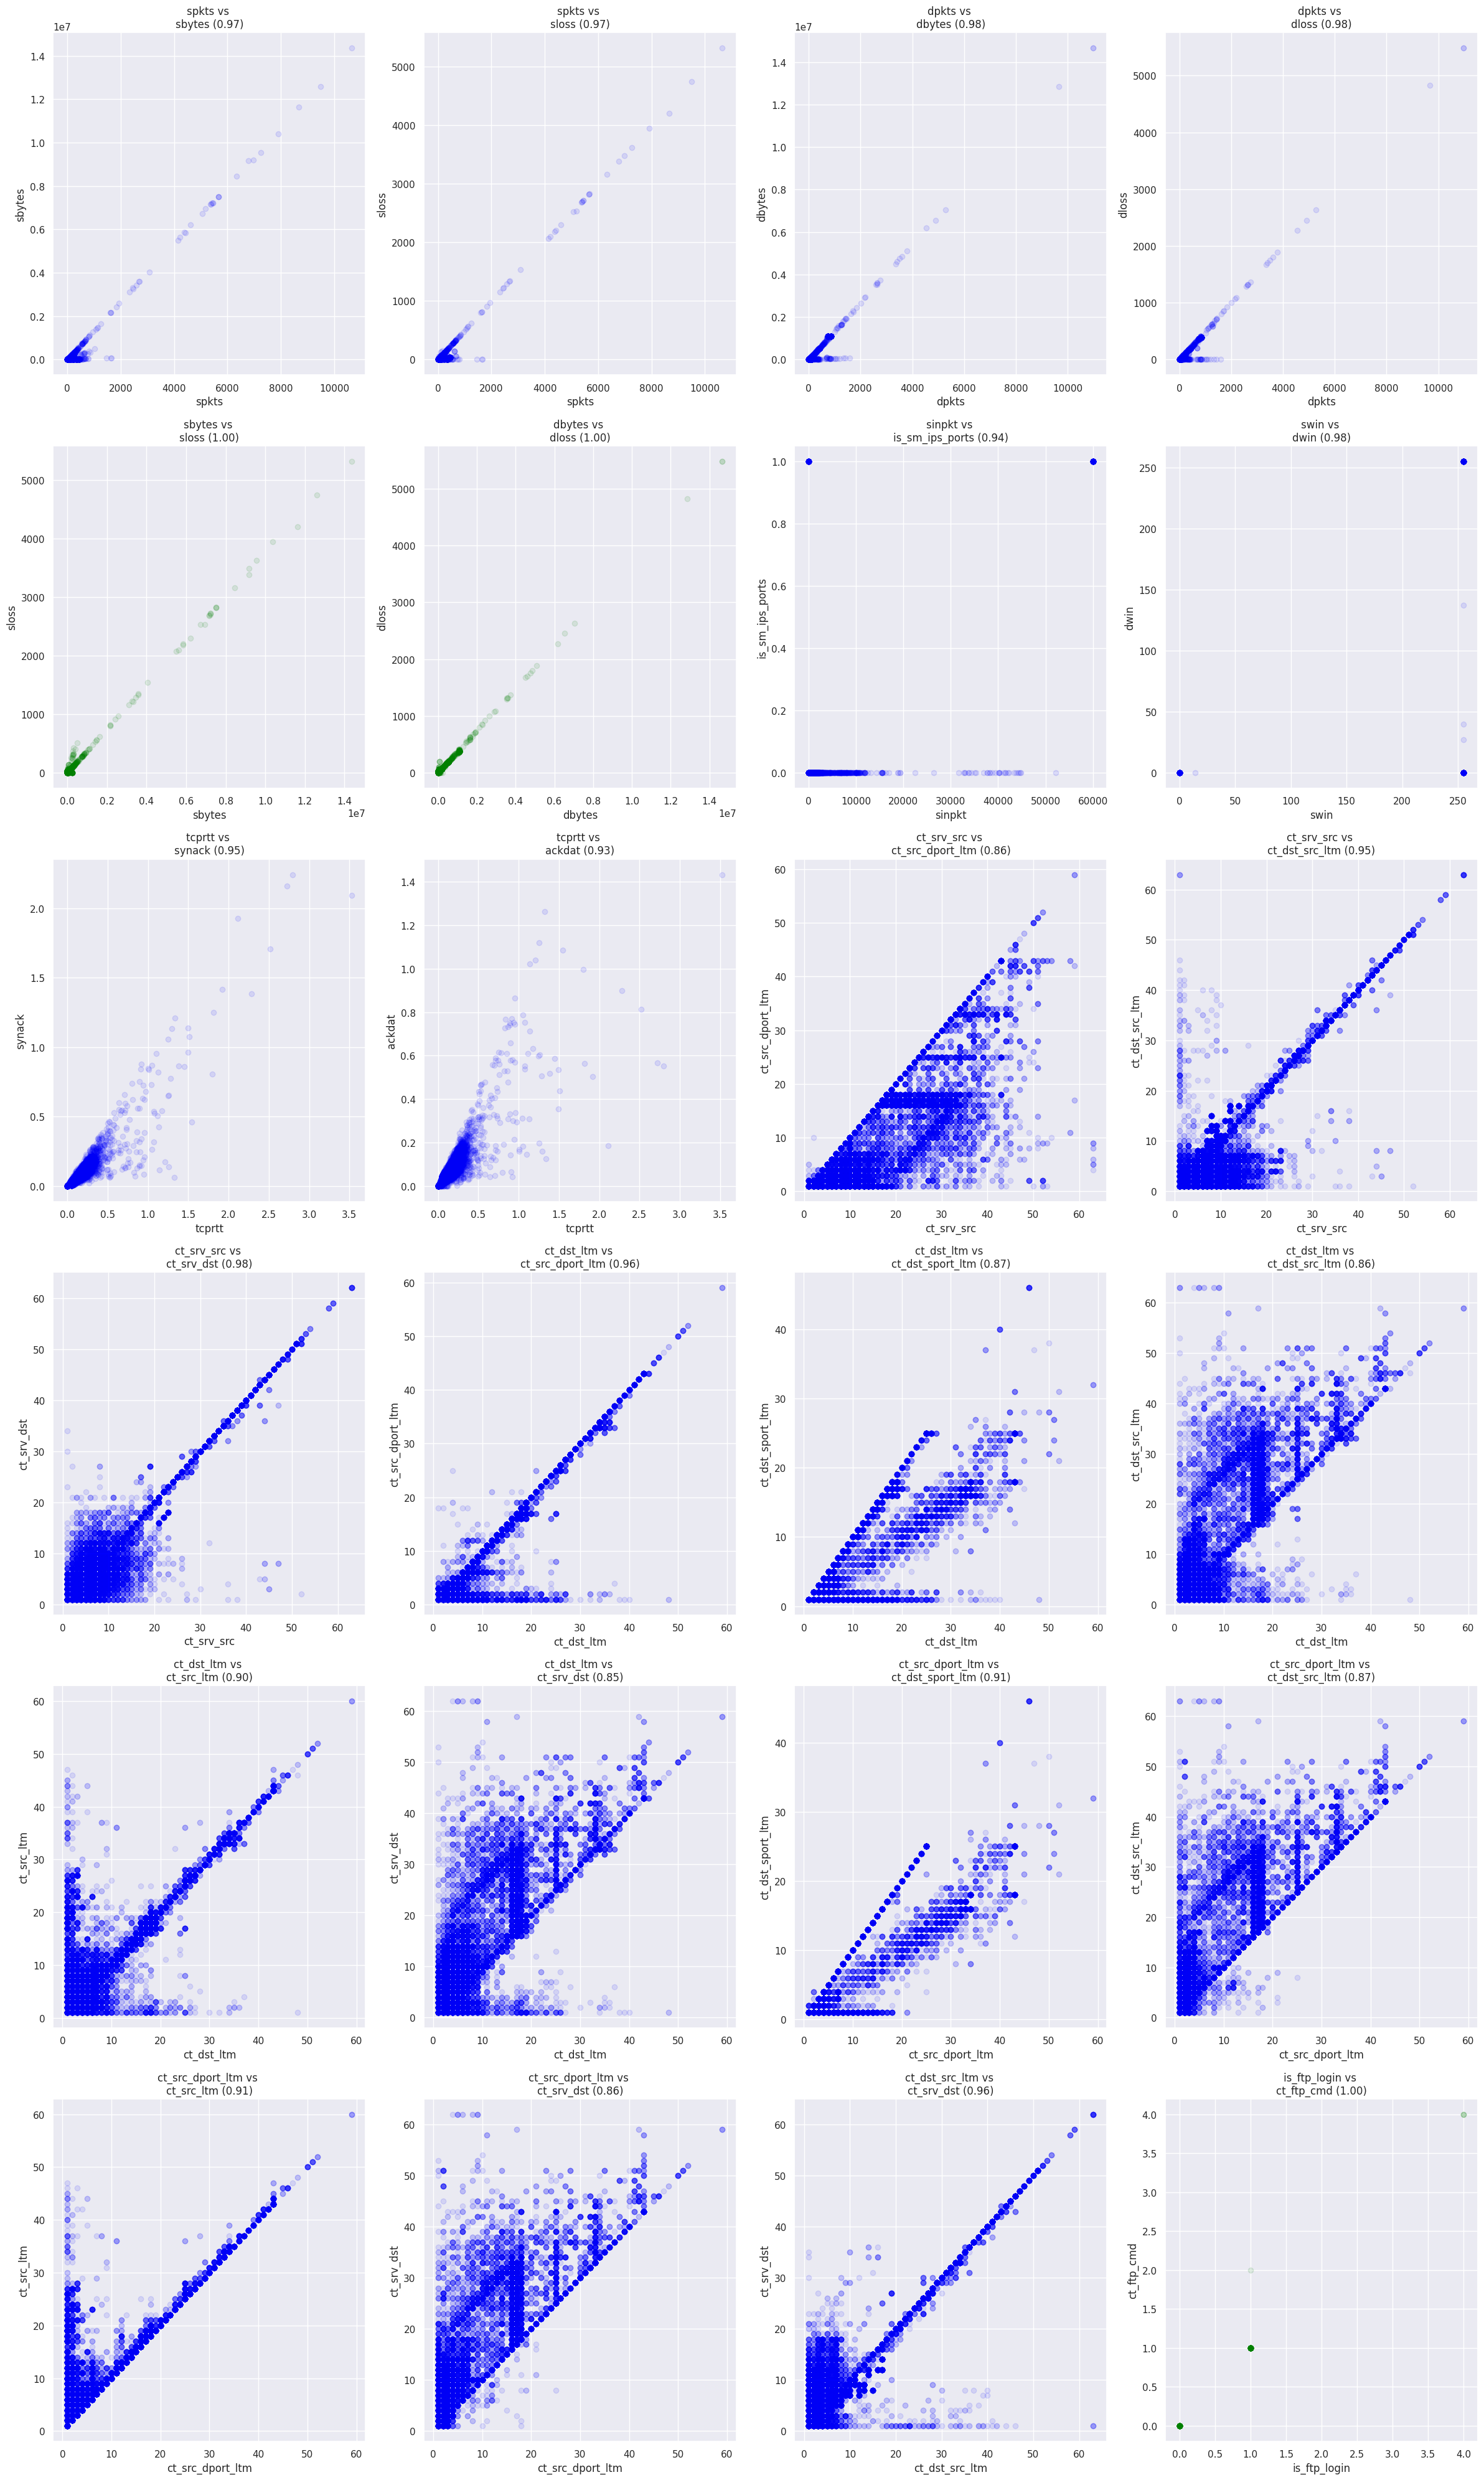

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sampled_data.columns)[:-2]
numeric_cols = []
for col in cols:
  if pd.api.types.is_numeric_dtype(sampled_data[col]):
    numeric_cols.append(col)

high_corr_pairs = []
corr_th = 0.85

for i in range(len(numeric_cols)):
  for j in range(i + 1, len(numeric_cols)):
    val = sampled_data[numeric_cols[i]].corr(sampled_data[numeric_cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, numeric_cols[i], numeric_cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem = size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize=(24, int(size * 1.7)))
for i in range(rows):
  for j in range(cols):
    try:
      val, x, y = high_corr_pairs[i * cols + j]
      if val > 0.99:
        axs[i, j].scatter(sampled_data[x], sampled_data[y], color='green', alpha=0.1)
      else:
        axs[i, j].scatter(sampled_data[x], sampled_data[y], color='blue', alpha=0.1)
      axs[i, j].set_xlabel(x)
      axs[i, j].set_ylabel(y)
      axs[i, j].set_title(f'{x} vs \n{y} ({val:.2f})')
    except IndexError:
      fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
sampled_data.drop('Attack Number', axis=1, inplace=True)
data.drop('Attack Number', axis=1, inplace=True)

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include=['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis=1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                   Outlier Count  Outlier Percentage
id                             0                0.00
dur                         4332                8.41
spkts                       7002               13.59
dpkts                       5954               11.55
sbytes                      6485               12.58
dbytes                      7927               15.38
rate                        4766                9.25
sttl                           0                0.00
dttl                           0                0.00
sload                       4442                8.62
dload                      11565               22.44
sloss                       3417                6.63
dloss                       7884               15.30
sinpkt                      4157                8.07
dinpkt                      3577                6.94
sjit                        4762                9.24
djit                        5806               11.27
swin                           0              

In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
  for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
    q1, q3 = np.percentile(attack_data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
    outlier_percent = num_outliers / len(attack_data) * 100
    outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: id
- Generic: 0 (0.00%)
- Normal: 0 (0.00%)
- Exploits: 0 (0.00%)
- Fuzzers: 0 (0.00%)
- Reconnaissance: 0 (0.00%)
- Shellcode: 0 (0.00%)
- DoS: 0 (0.00%)
- Analysis: 0 (0.00%)
- Backdoor: 0 (0.00%)
- Worms: 0 (0.00%)

Feature: dur
- Generic: 348 (2.96%)
- Normal: 1132 (6.07%)
- Exploits: 827 (9.16%)
- Fuzzers: 326 (6.81%)
- Reconnaissance: 105 (3.78%)
- Shellcode: 13 (4.51%)
- DoS: 558 (17.36%)
- Analysis: 113 (20.66%)
- Backdoor: 107 (24.77%)
- Worms: 8 (17.02%)

Feature: spkts
- Generic: 220 (1.87%)
- Normal: 1459 (7.82%)
- Exploits: 773 (8.56%)
- Fuzzers: 445 (9.30%)
- Reconnaissance: 32 (1.15%)
- Shellcode: 0 (0.00%)
- DoS: 281 (8.74%)
- Analysis: 129 (23.58%)
- Backdoor: 107 (24.77%)
- Worms: 16 (34.04%)

Feature: dpkts
- Generic: 210 (1.79%)
- Normal: 2128 (11.41%)
- Exploits: 586 (6.49%)
- Fuzzers: 42 (0.88%)
- Reconnaissance: 5 (0.18%)
- Shellcode: 0 (0.00%)
- DoS: 736 (22.89%)
- Analysis: 114 (20.84%)
- Backdoor: 70 (16.20%)
- Worms: 15 (31.91%)

Feature: sbytes
- Ge

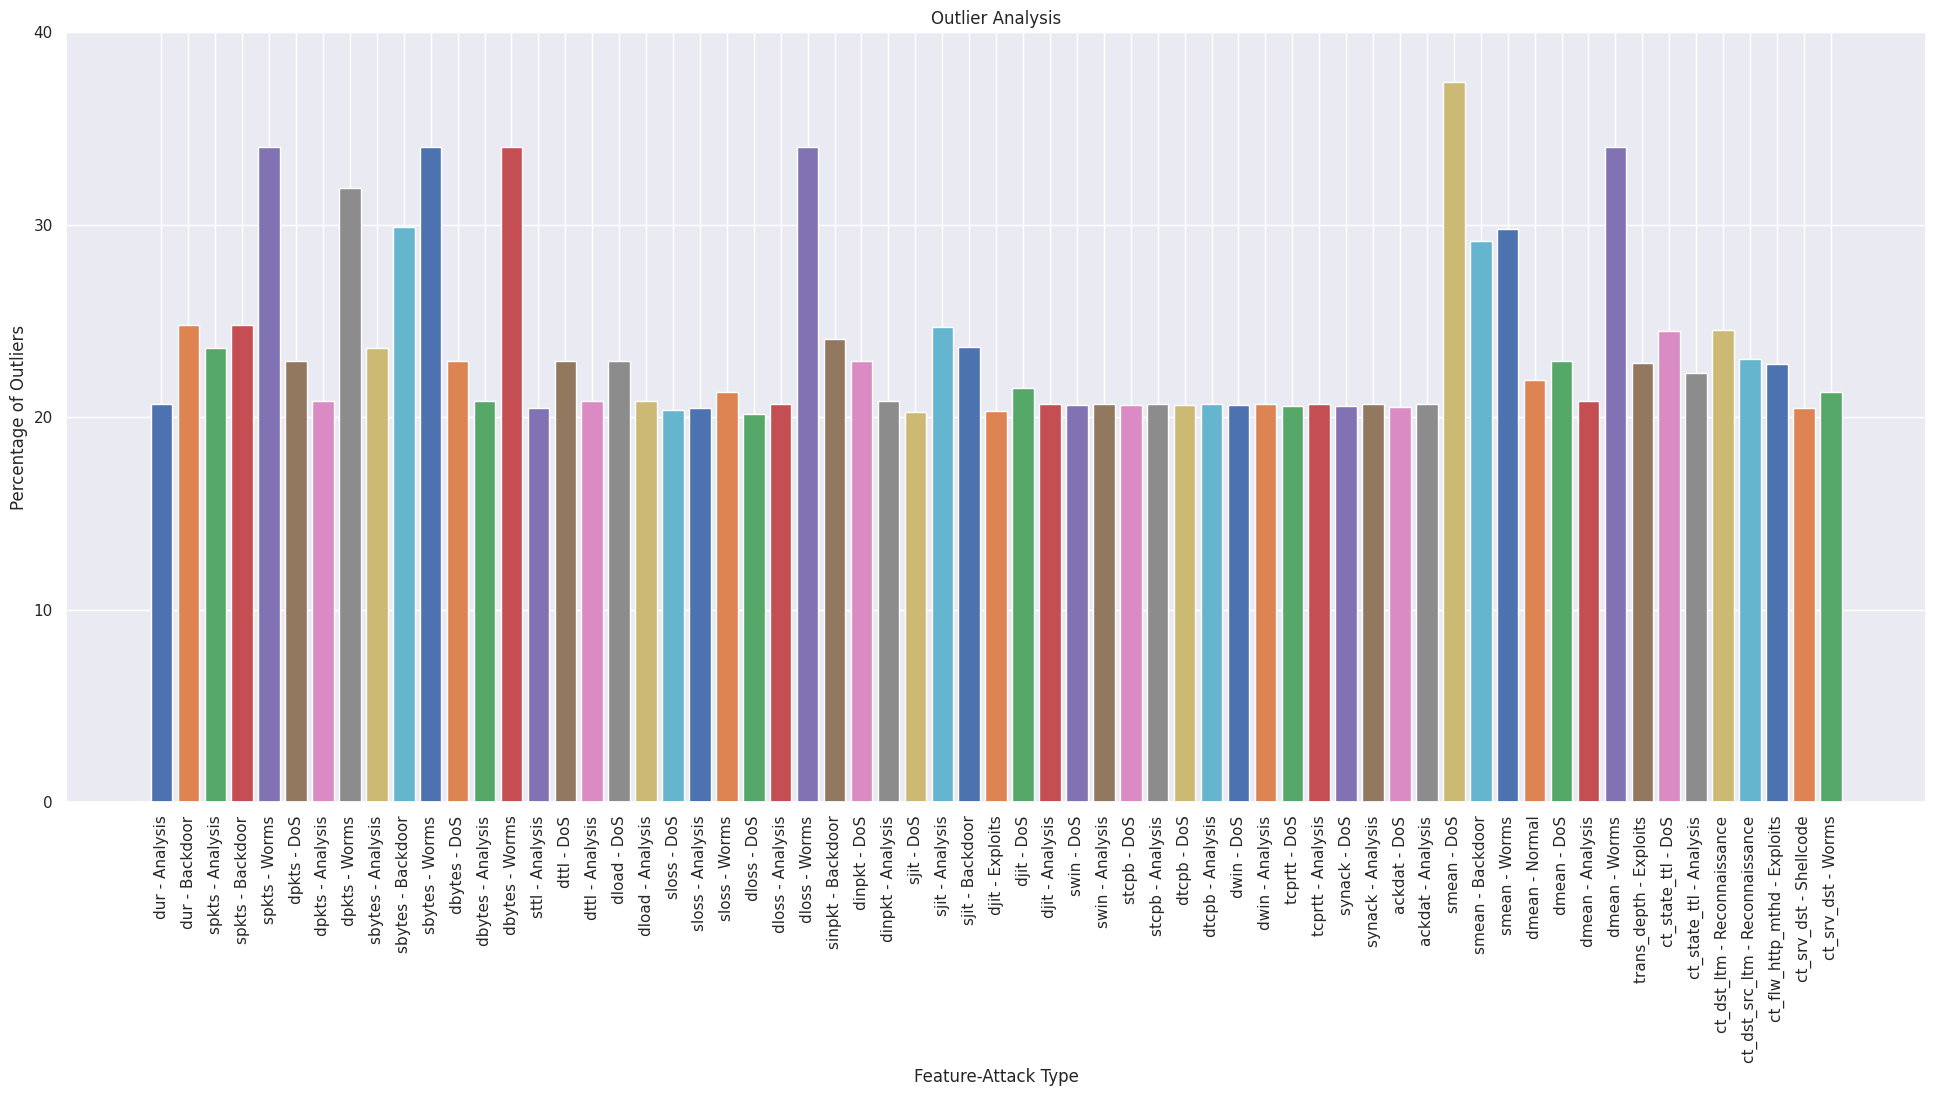

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize=(24, 10))
for i in numeric_data:
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    if outlier_percent > 20:
      ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation=90)
plt.show()

#### **Visualization of column relationships (Categorical Variables)**

/tmp/ipython-input-3839758243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Attack Type', data=attacks, palette='pastel', order=attacks['Attack Type'].value_counts().index)


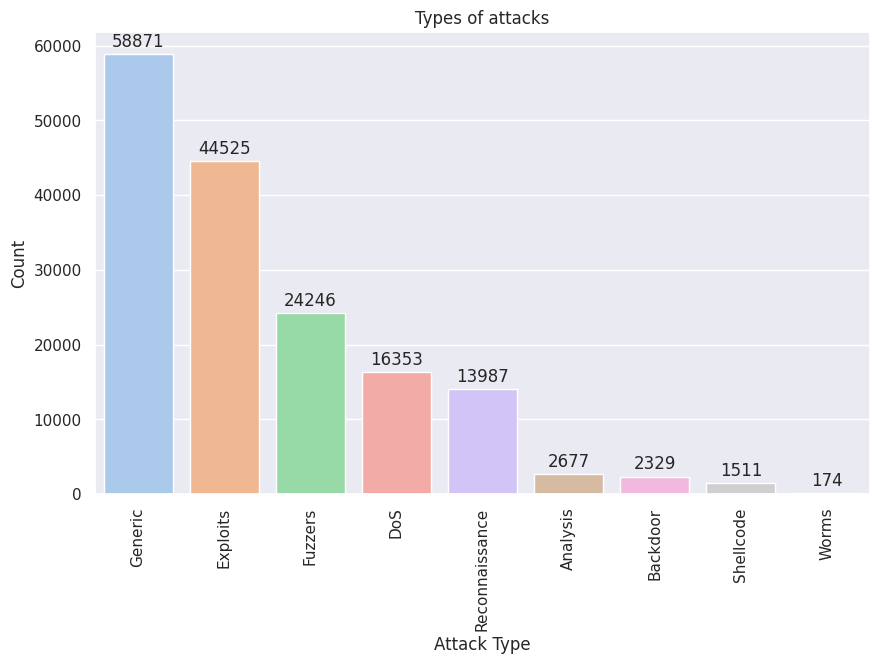

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'Normal'
attacks = data.loc[data['Attack Type'] != 'Normal']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Attack Type', data=attacks, palette='pastel', order=attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha='center')

plt.show()

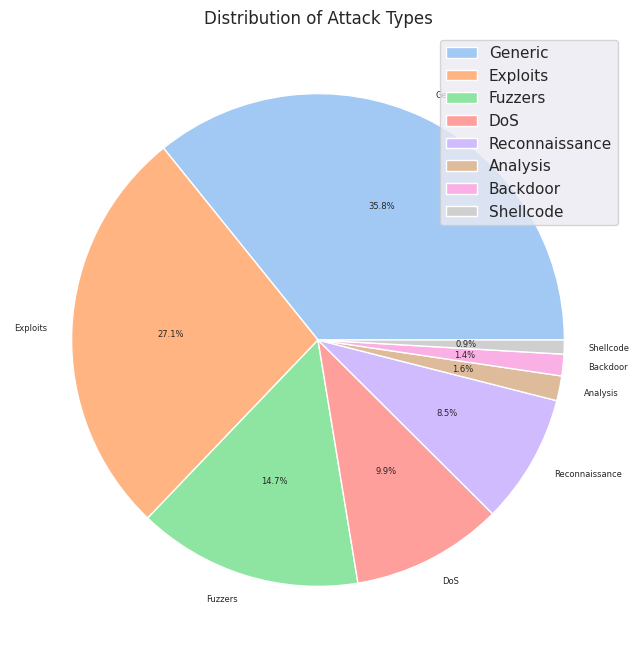

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts.drop(small_slices, inplace=True)

sns.set_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc='best')
plt.show()

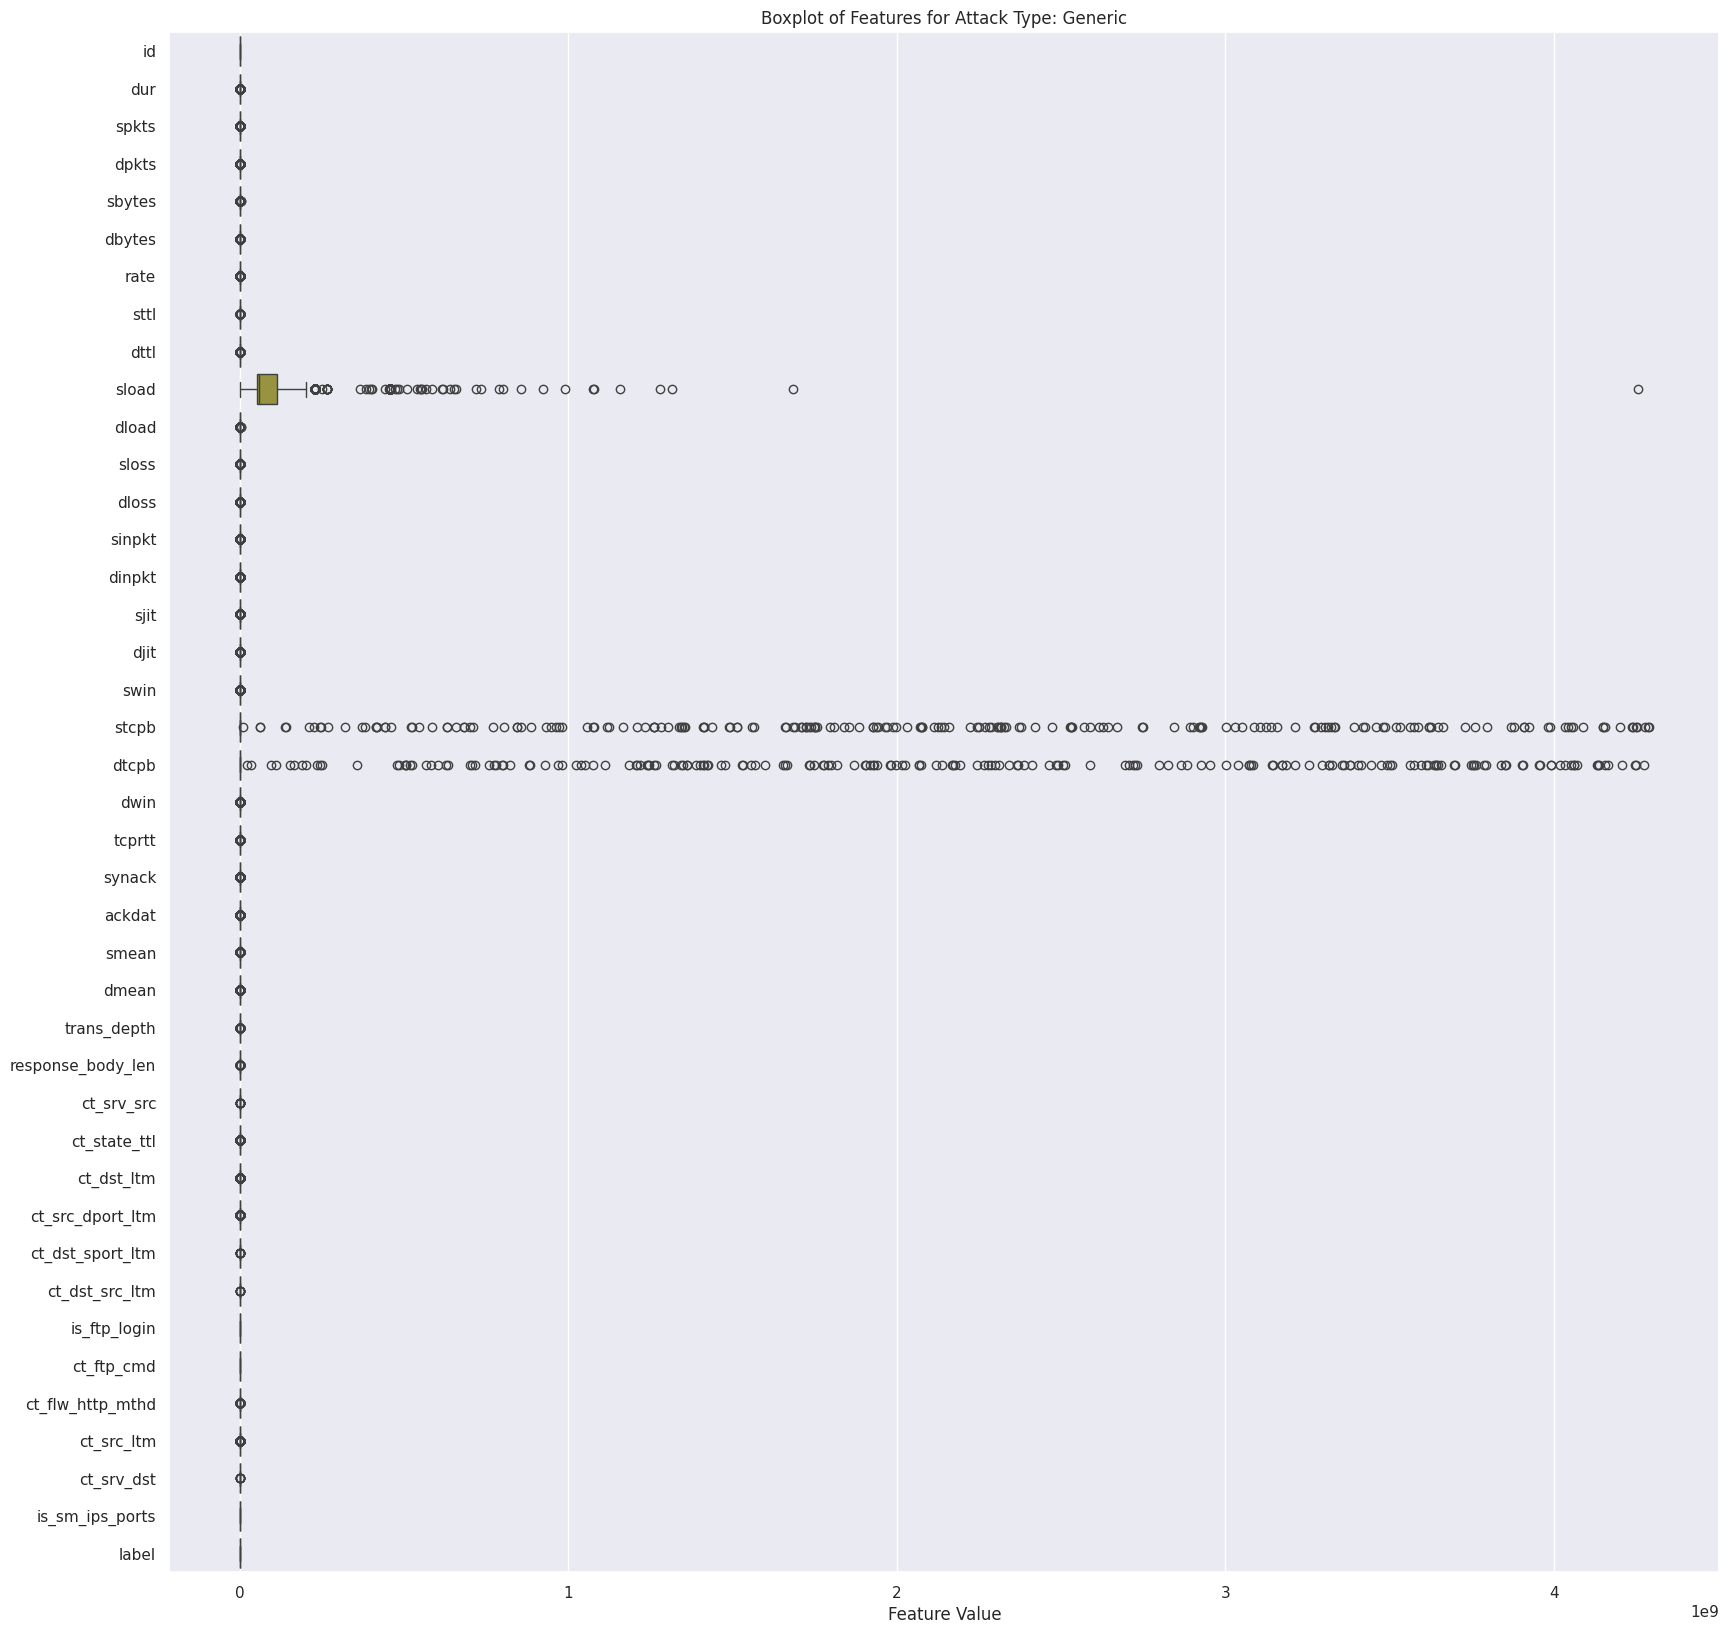

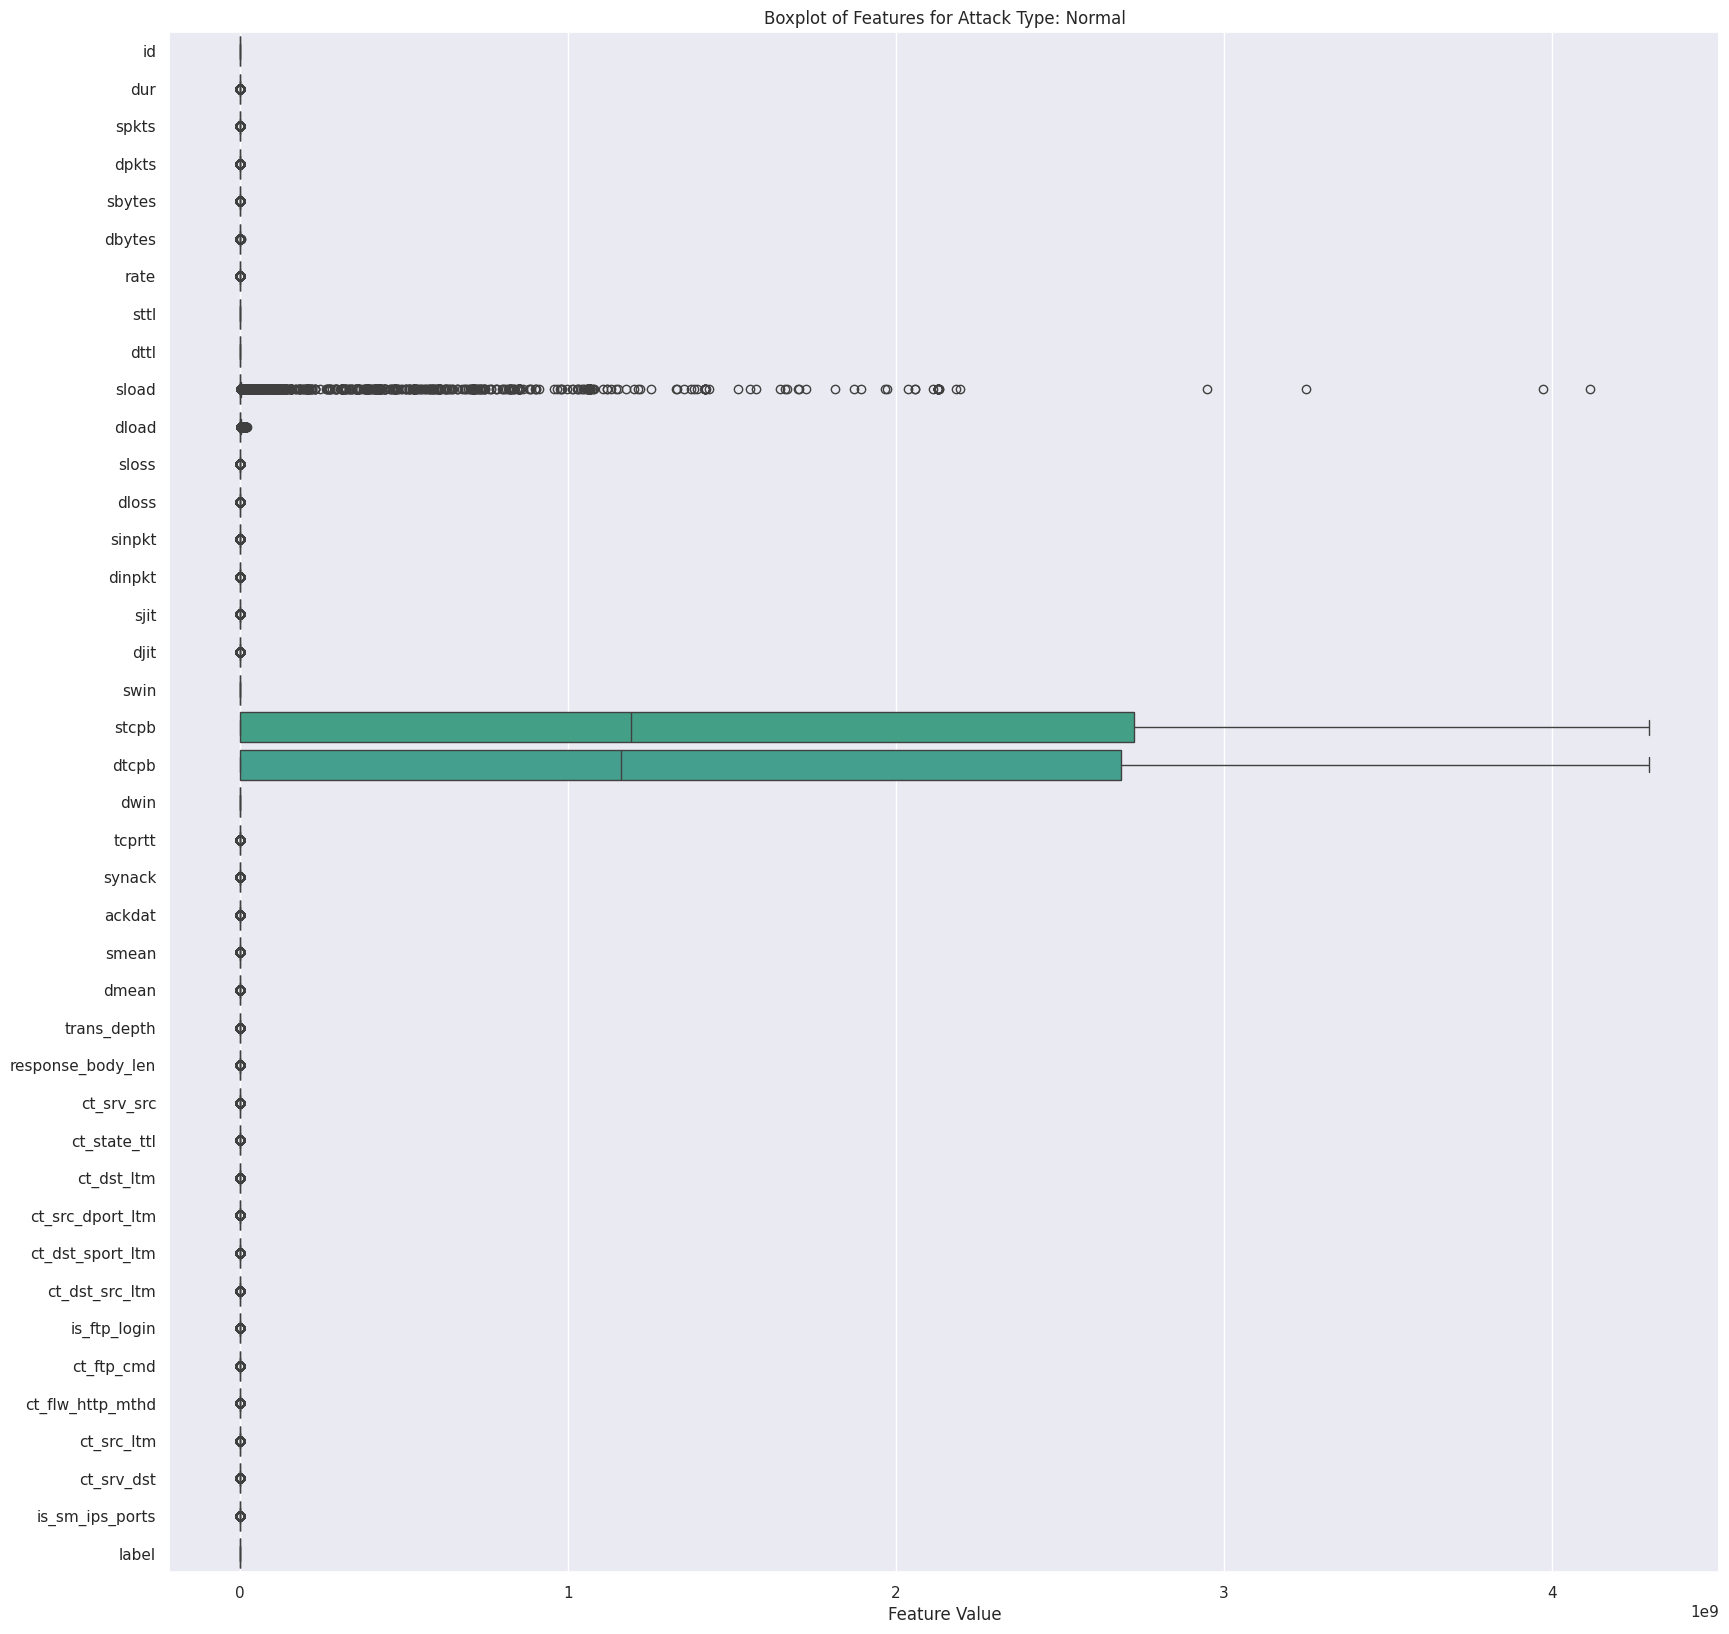

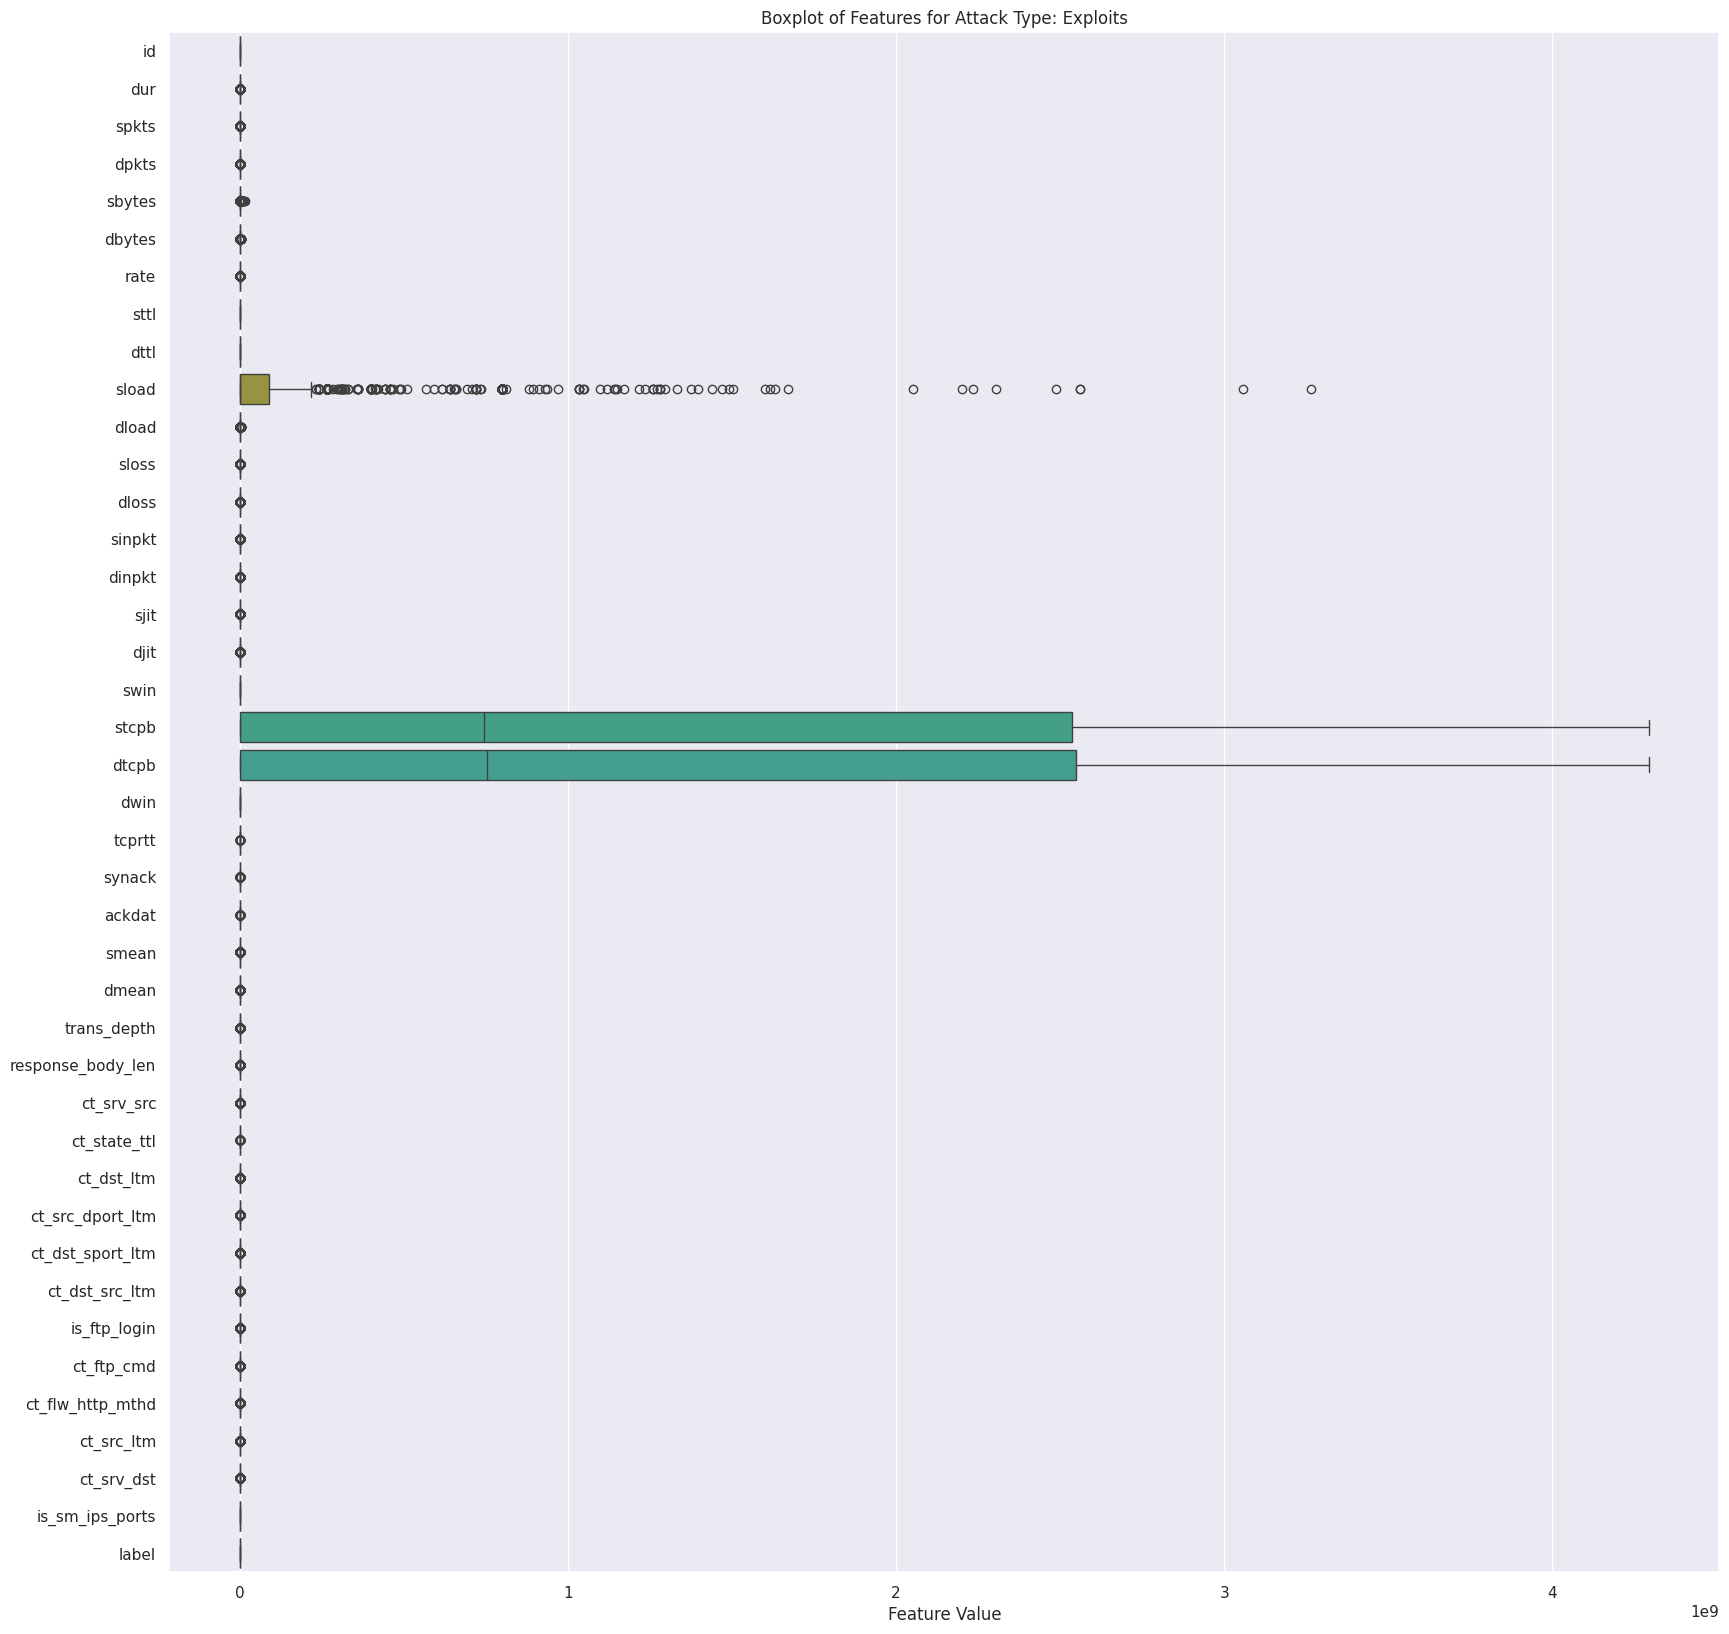

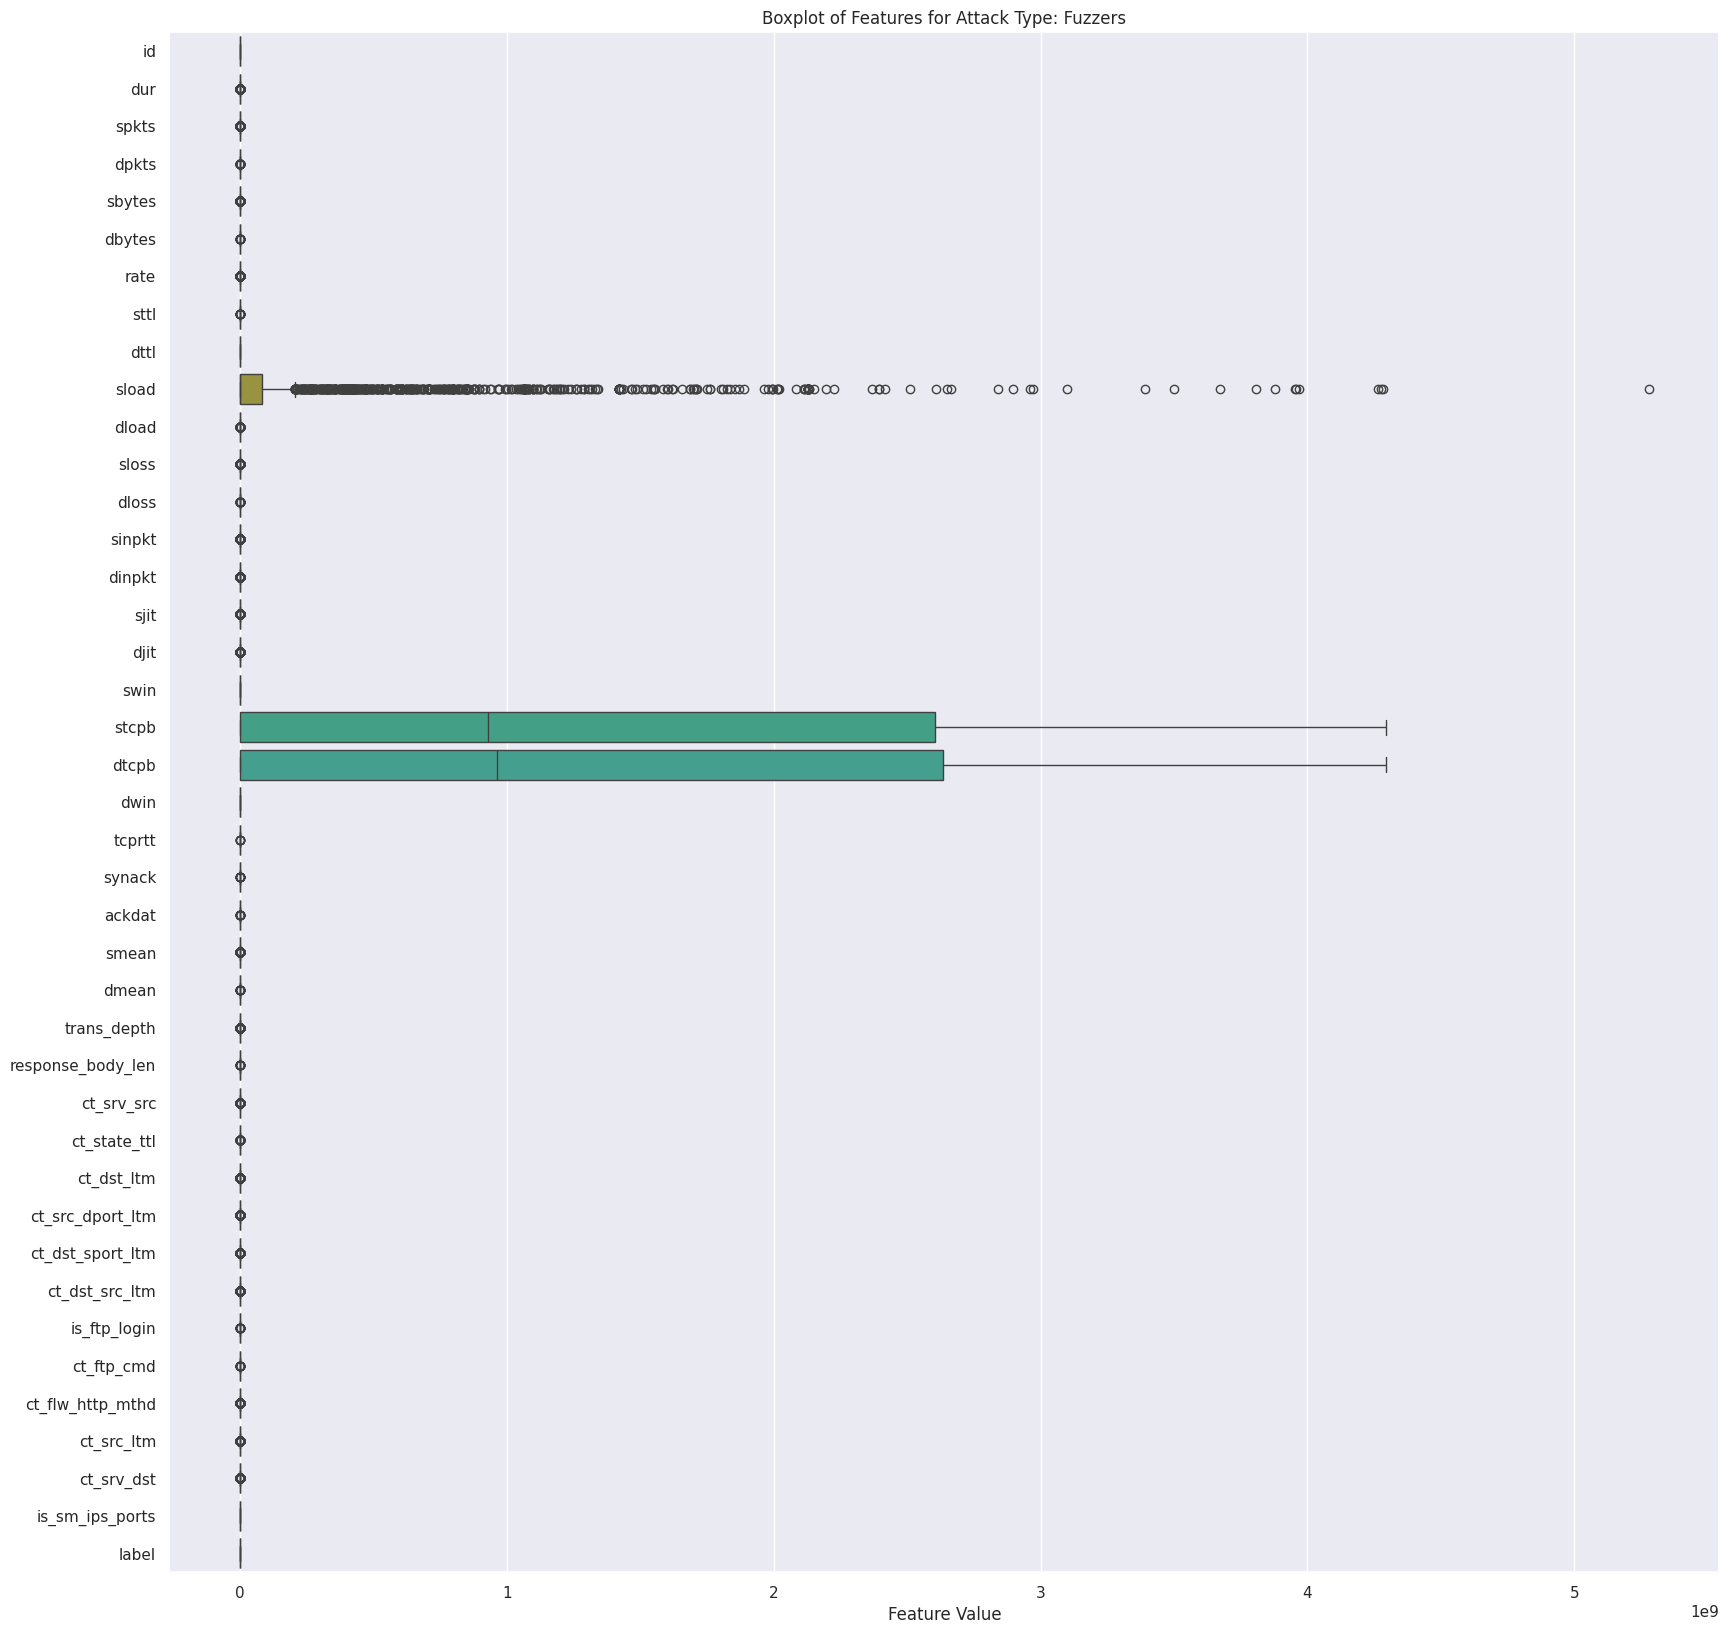

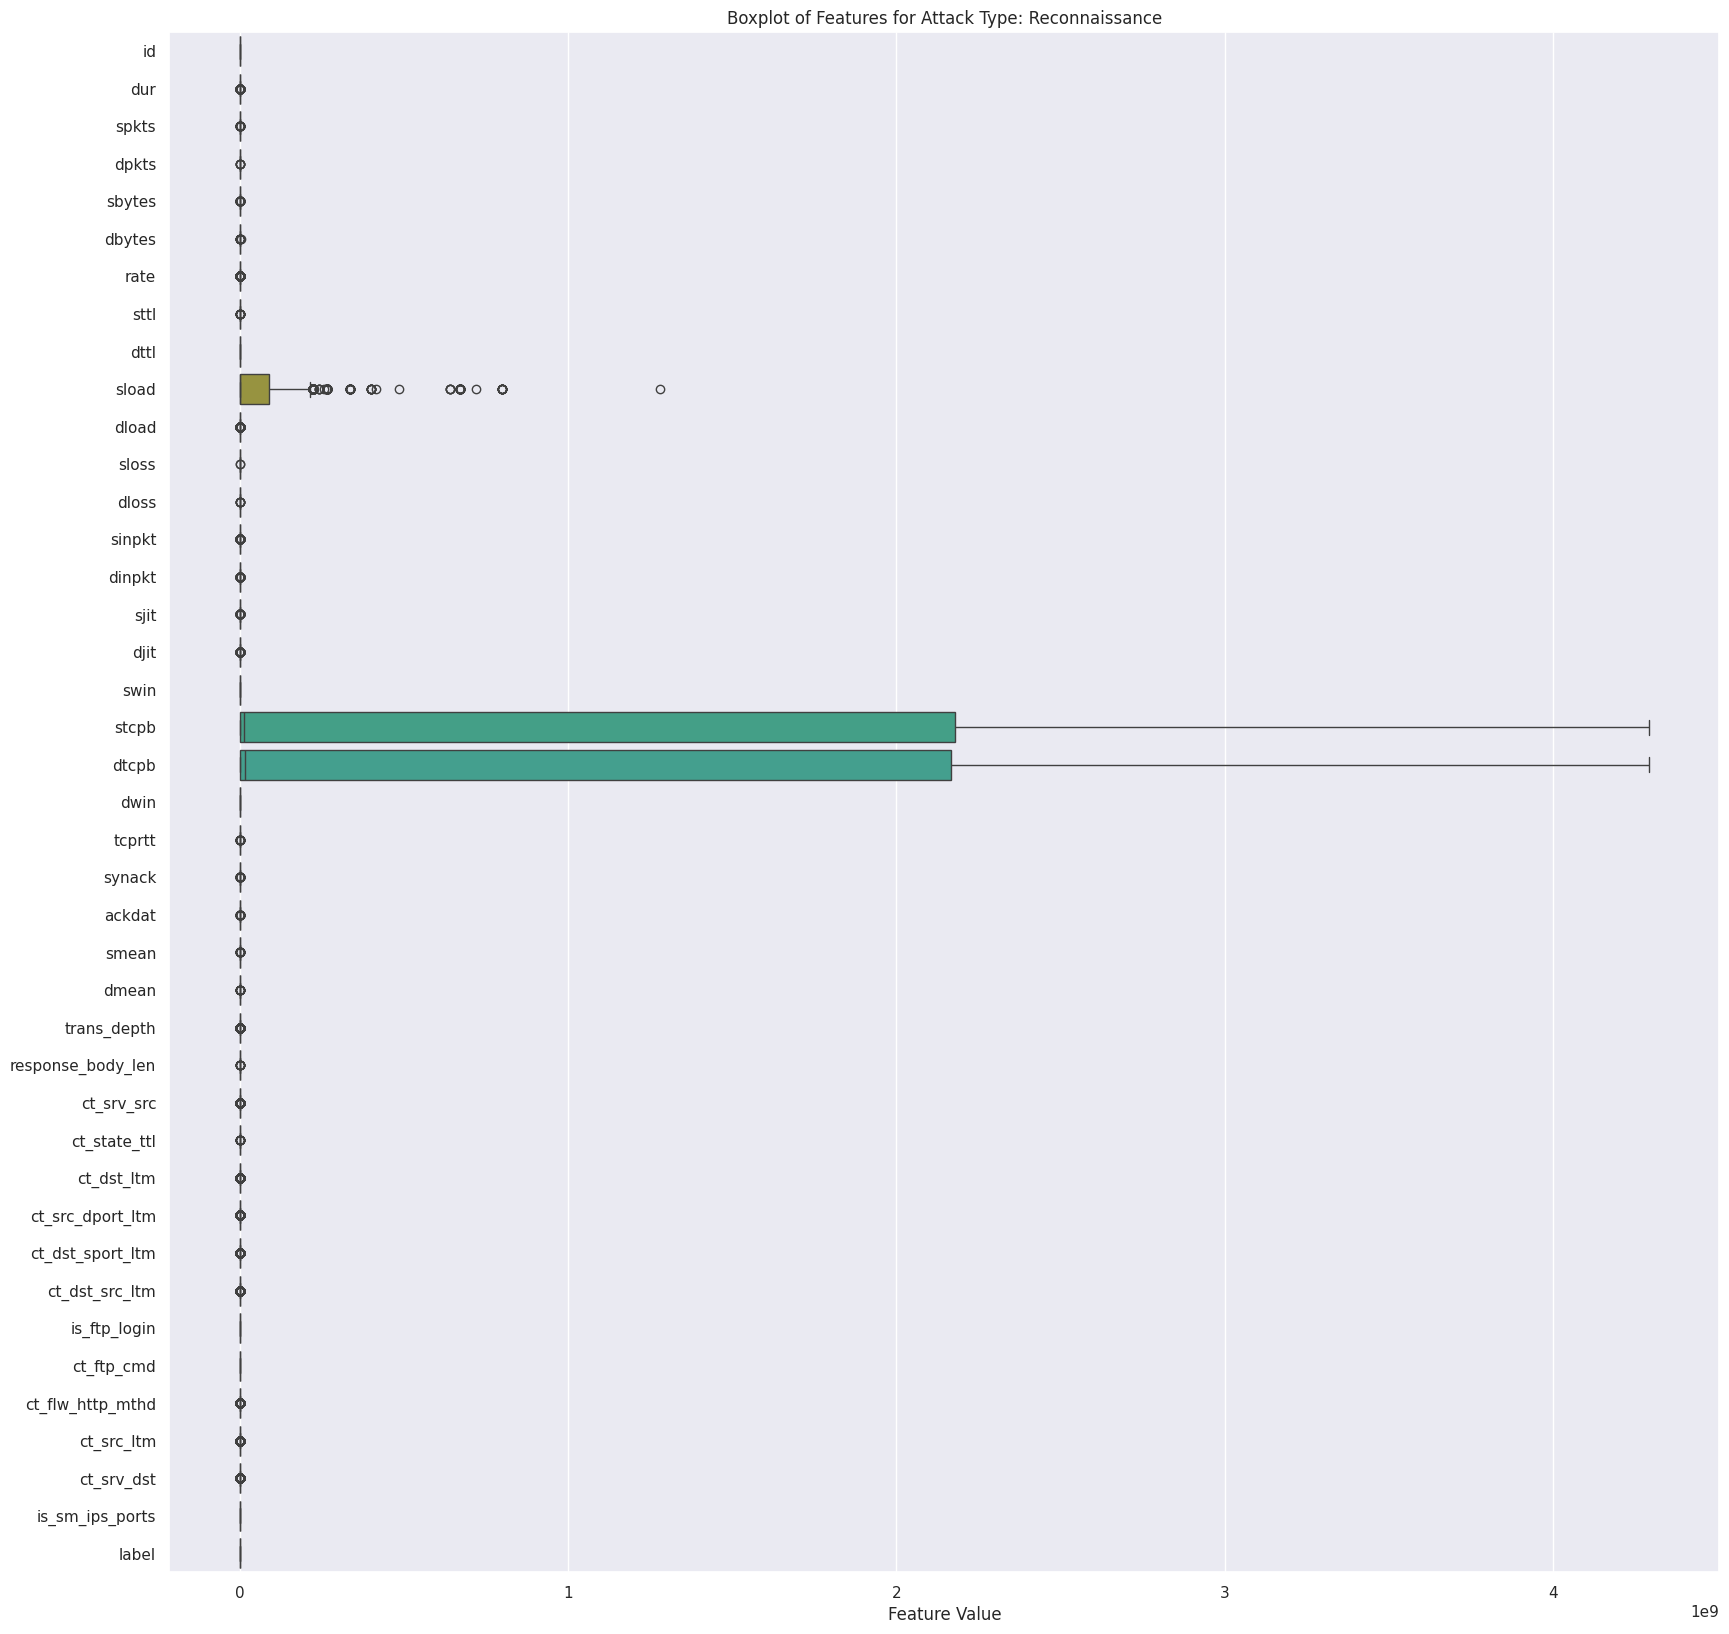

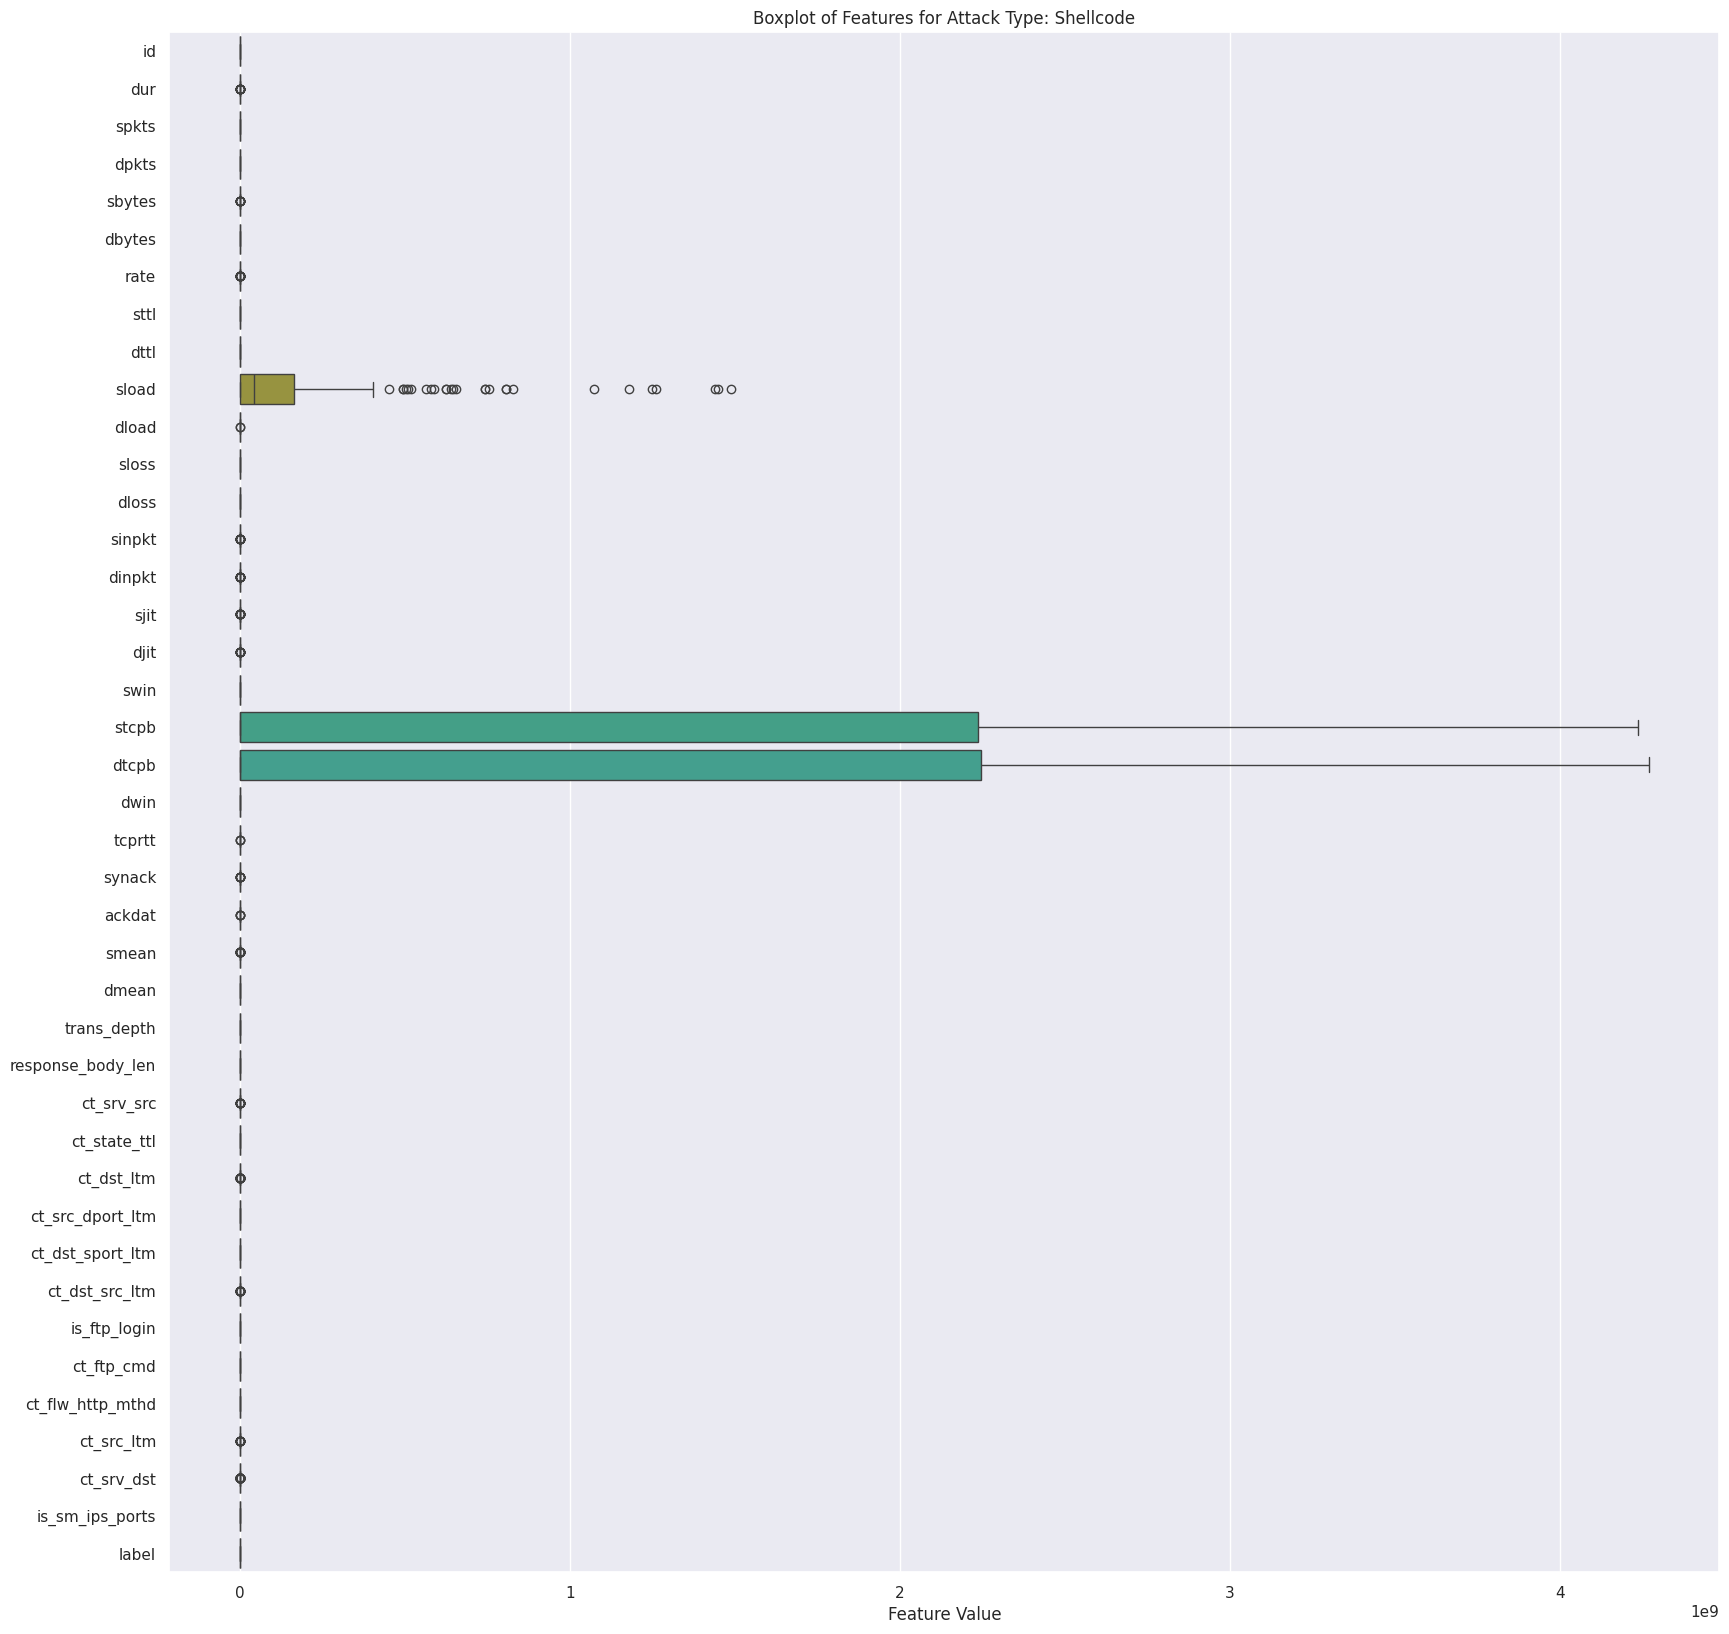

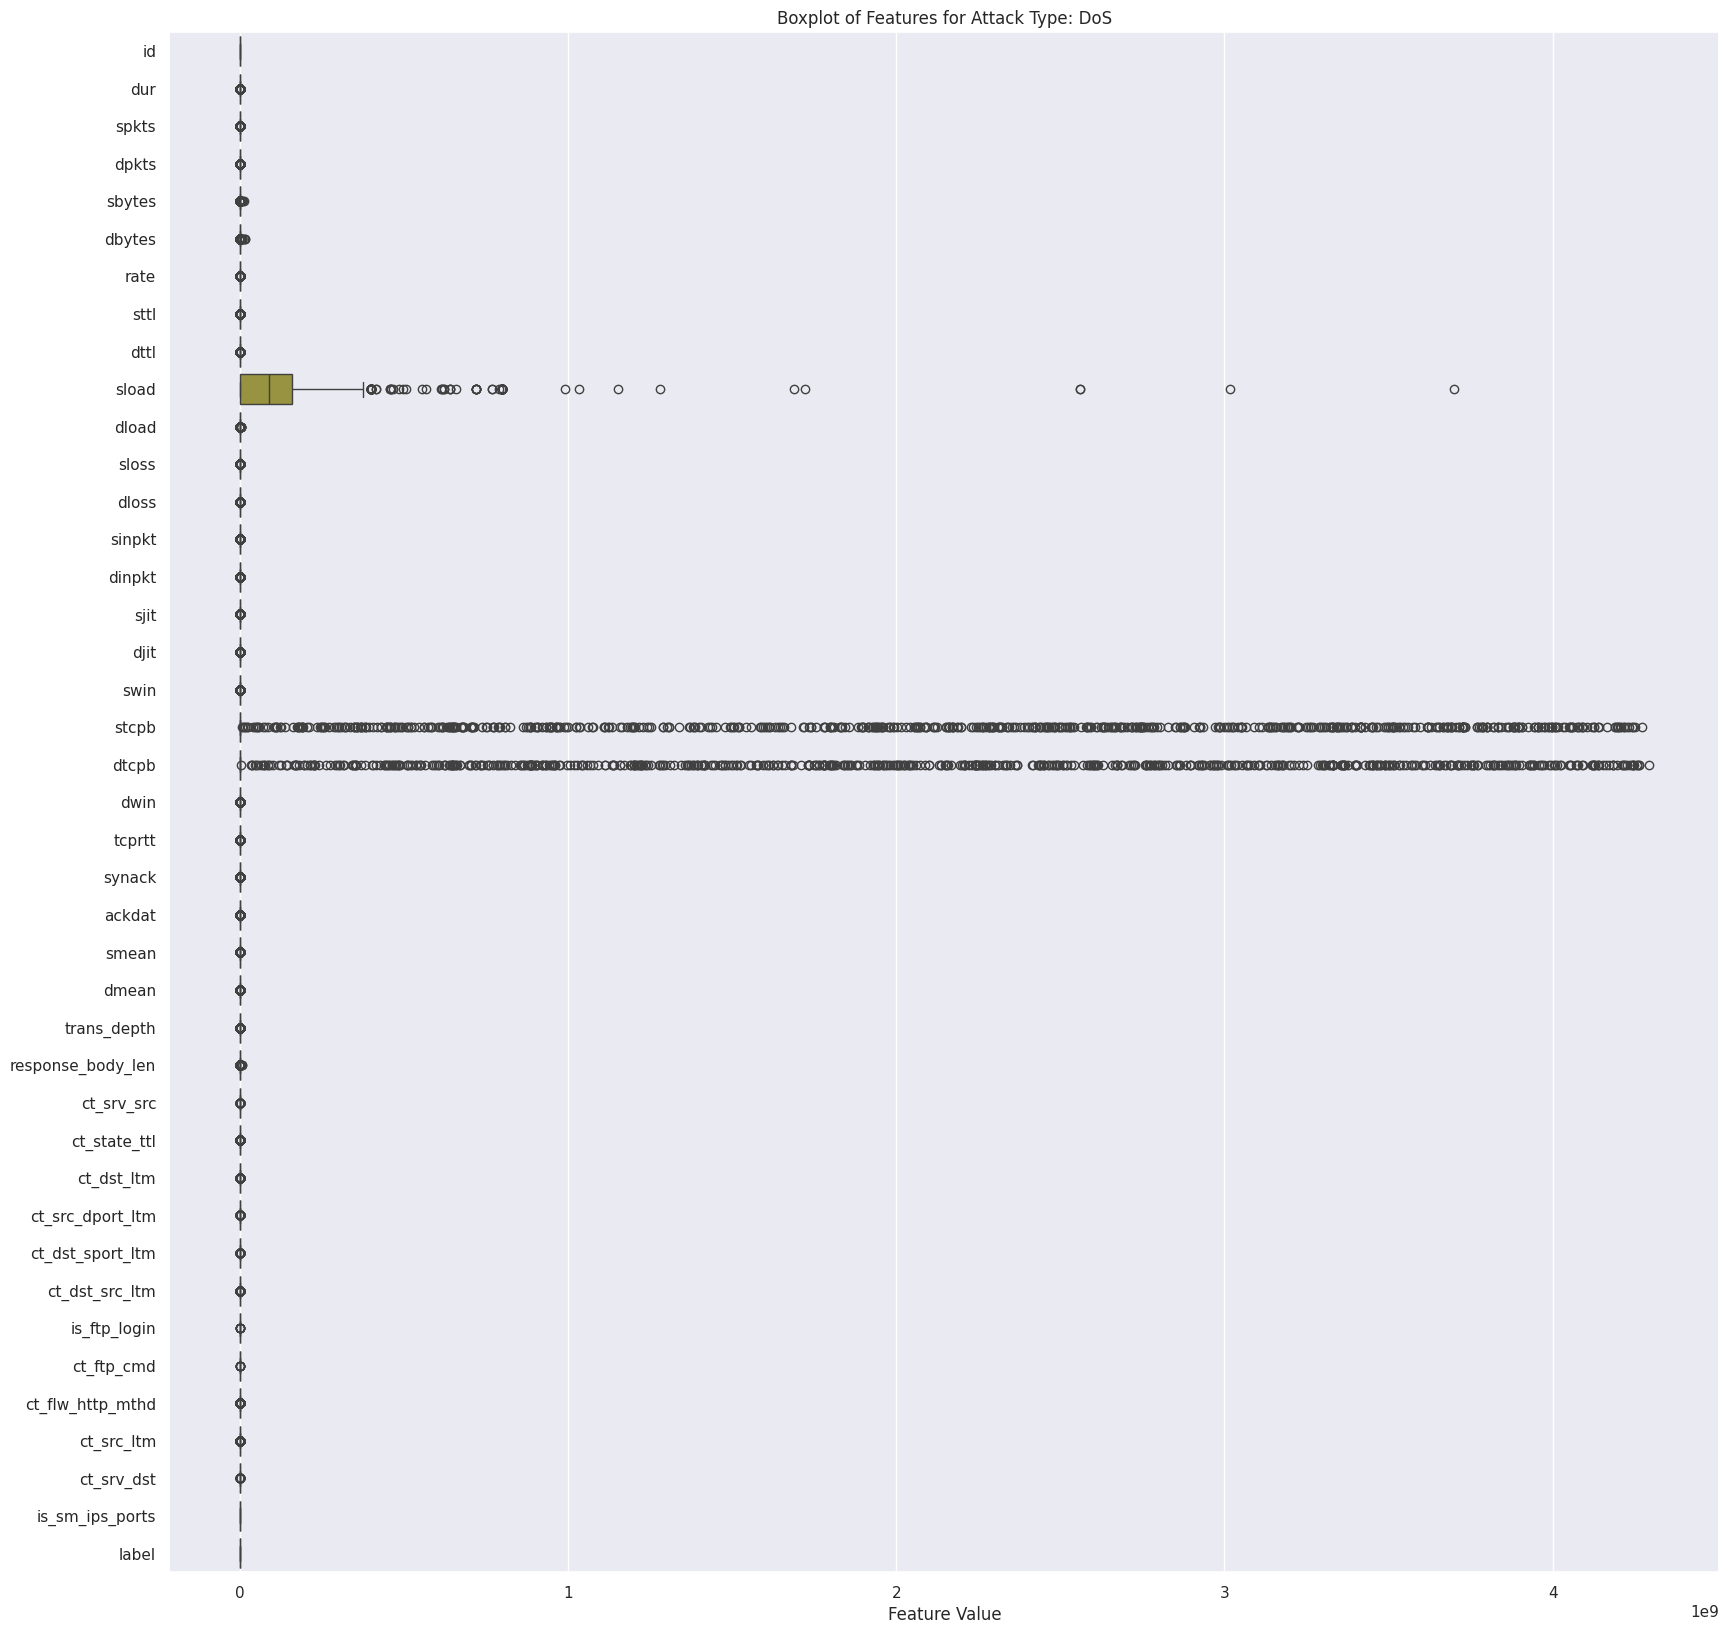

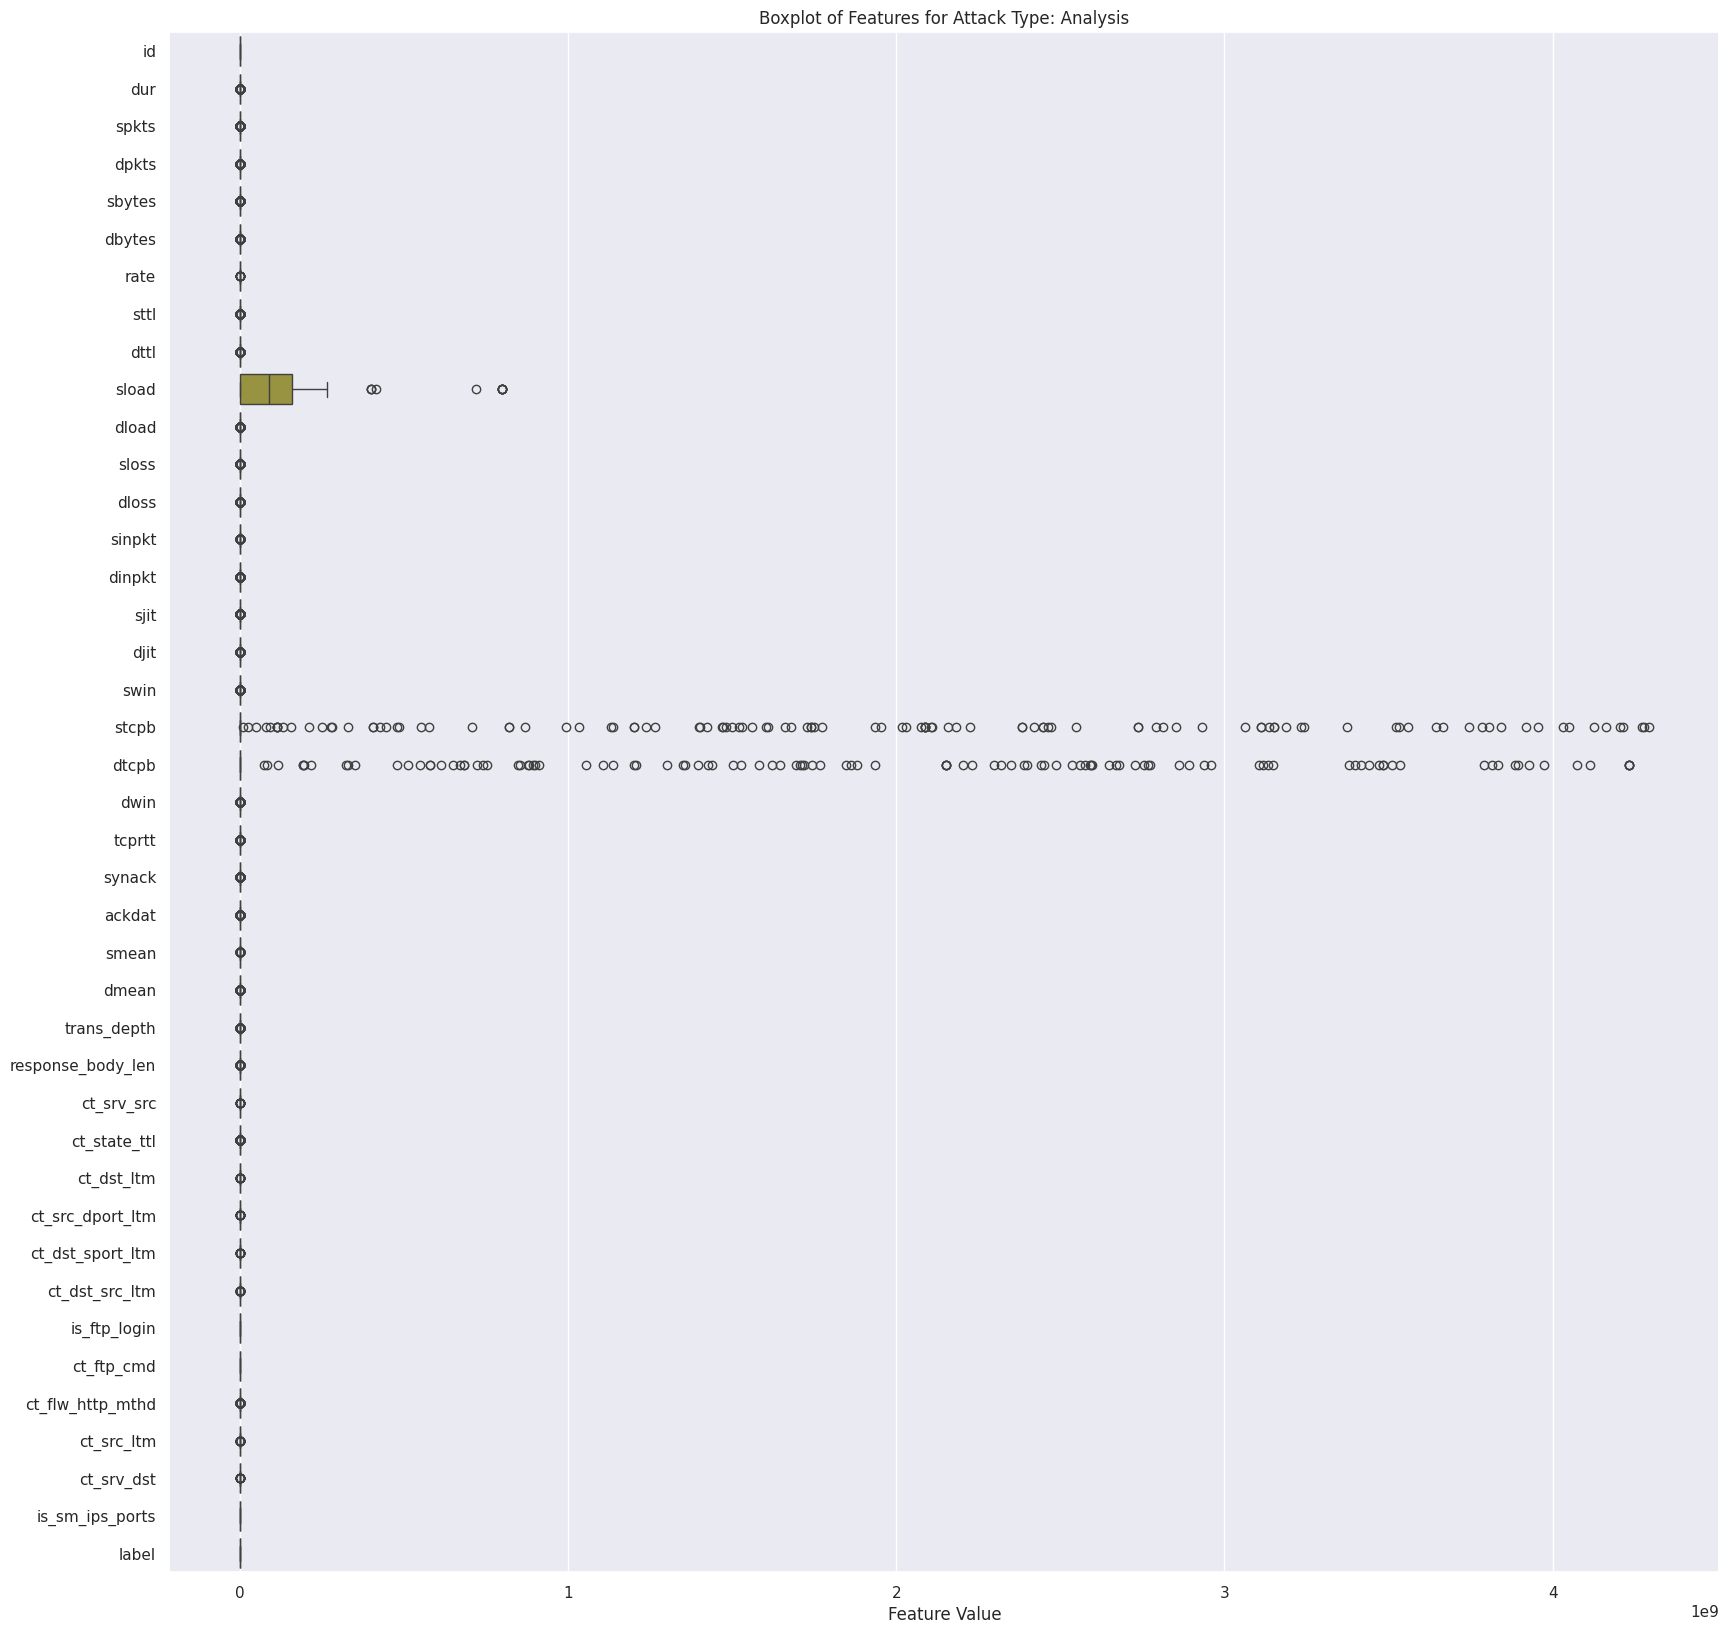

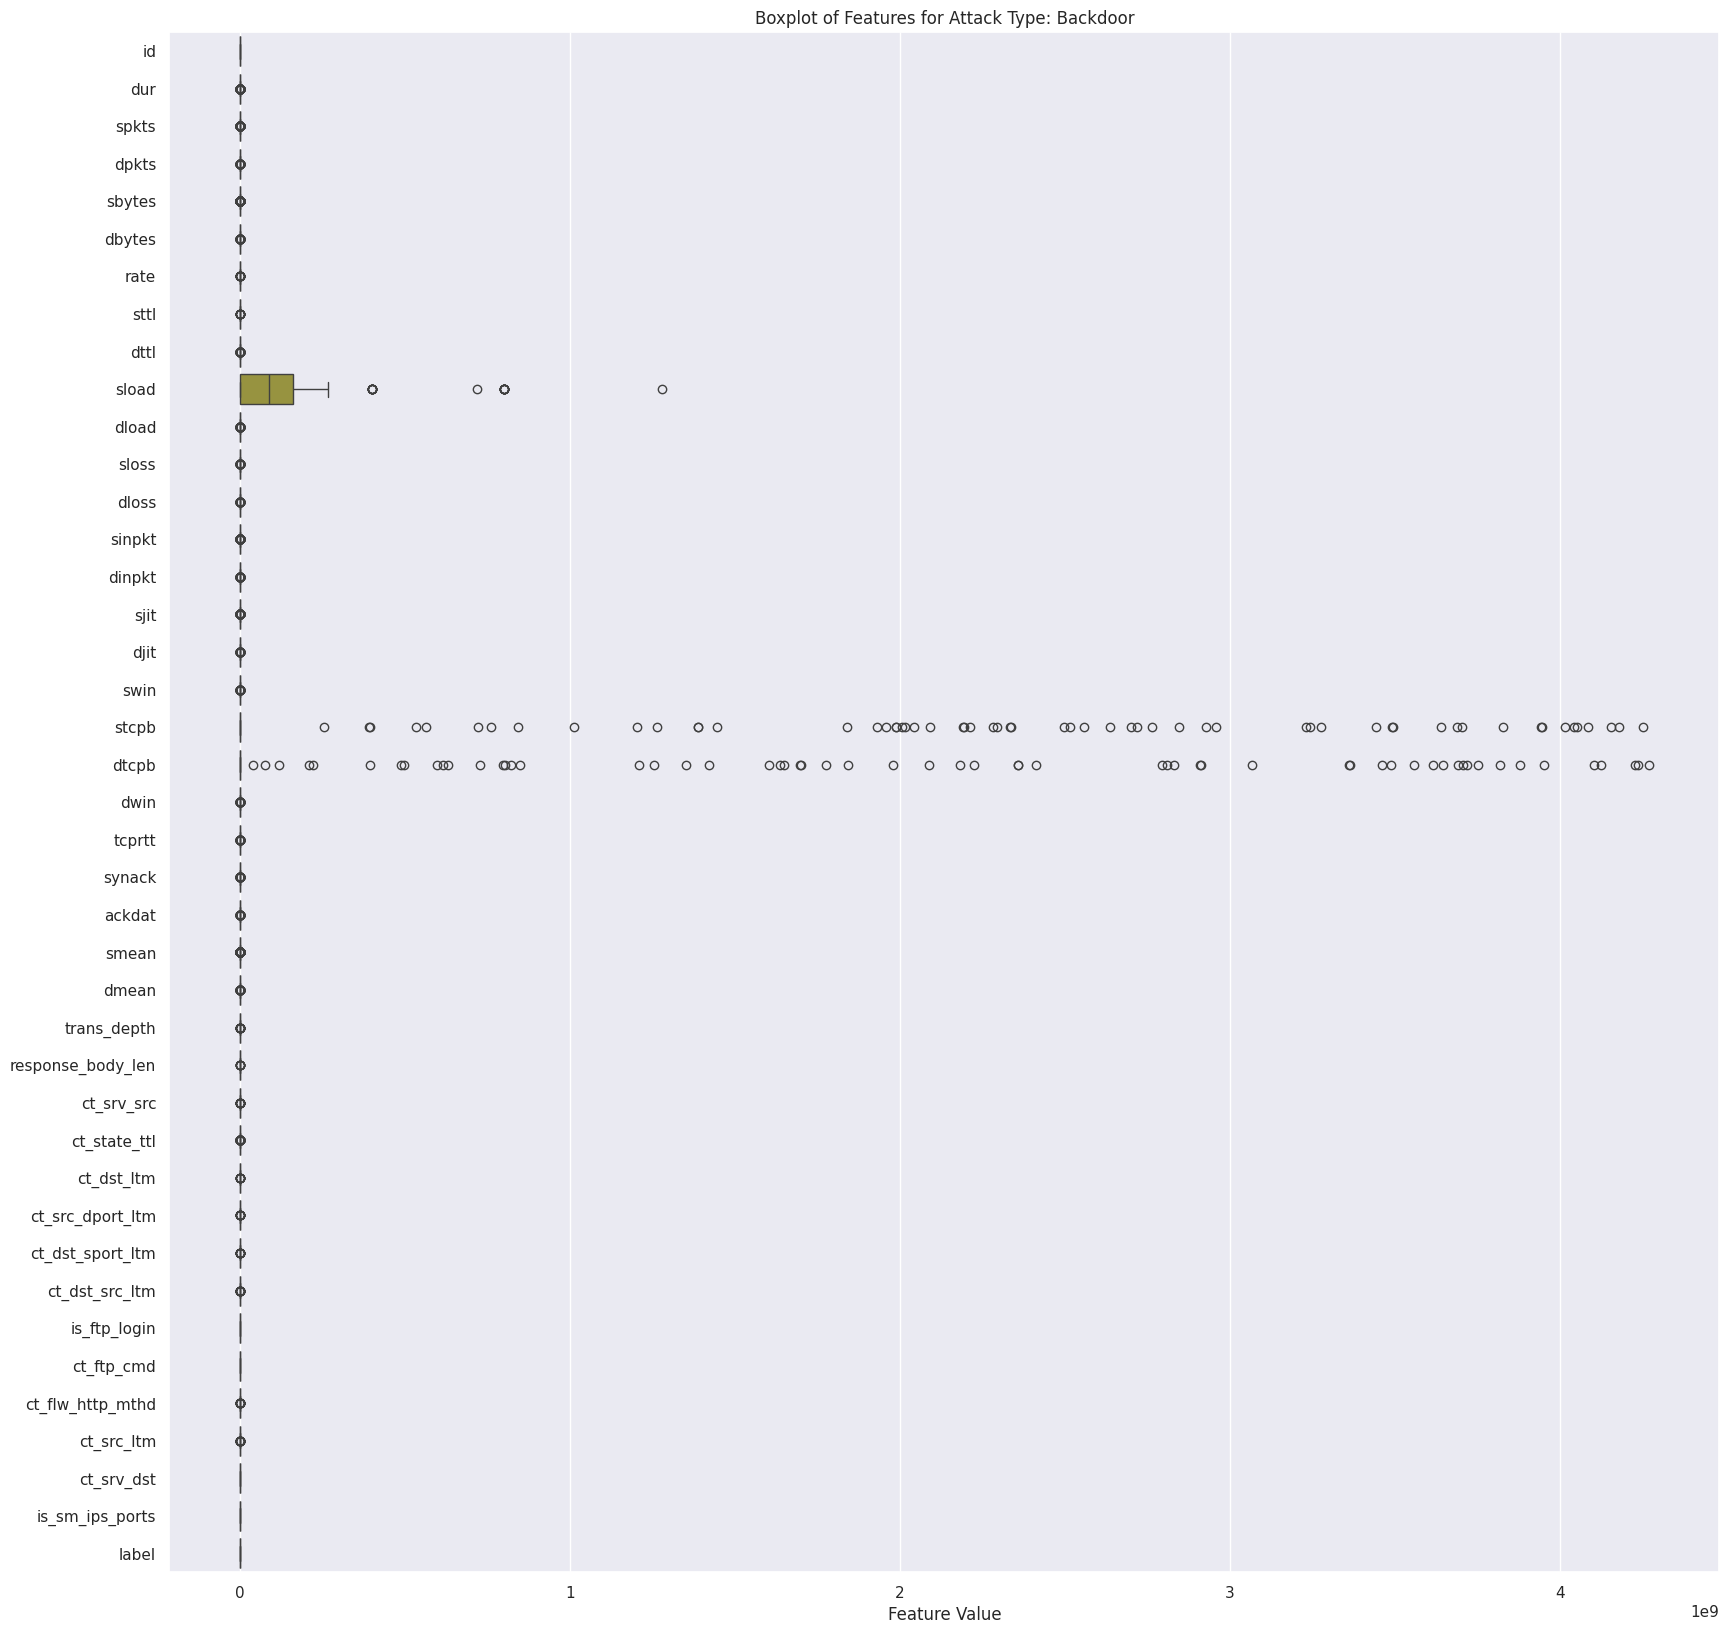

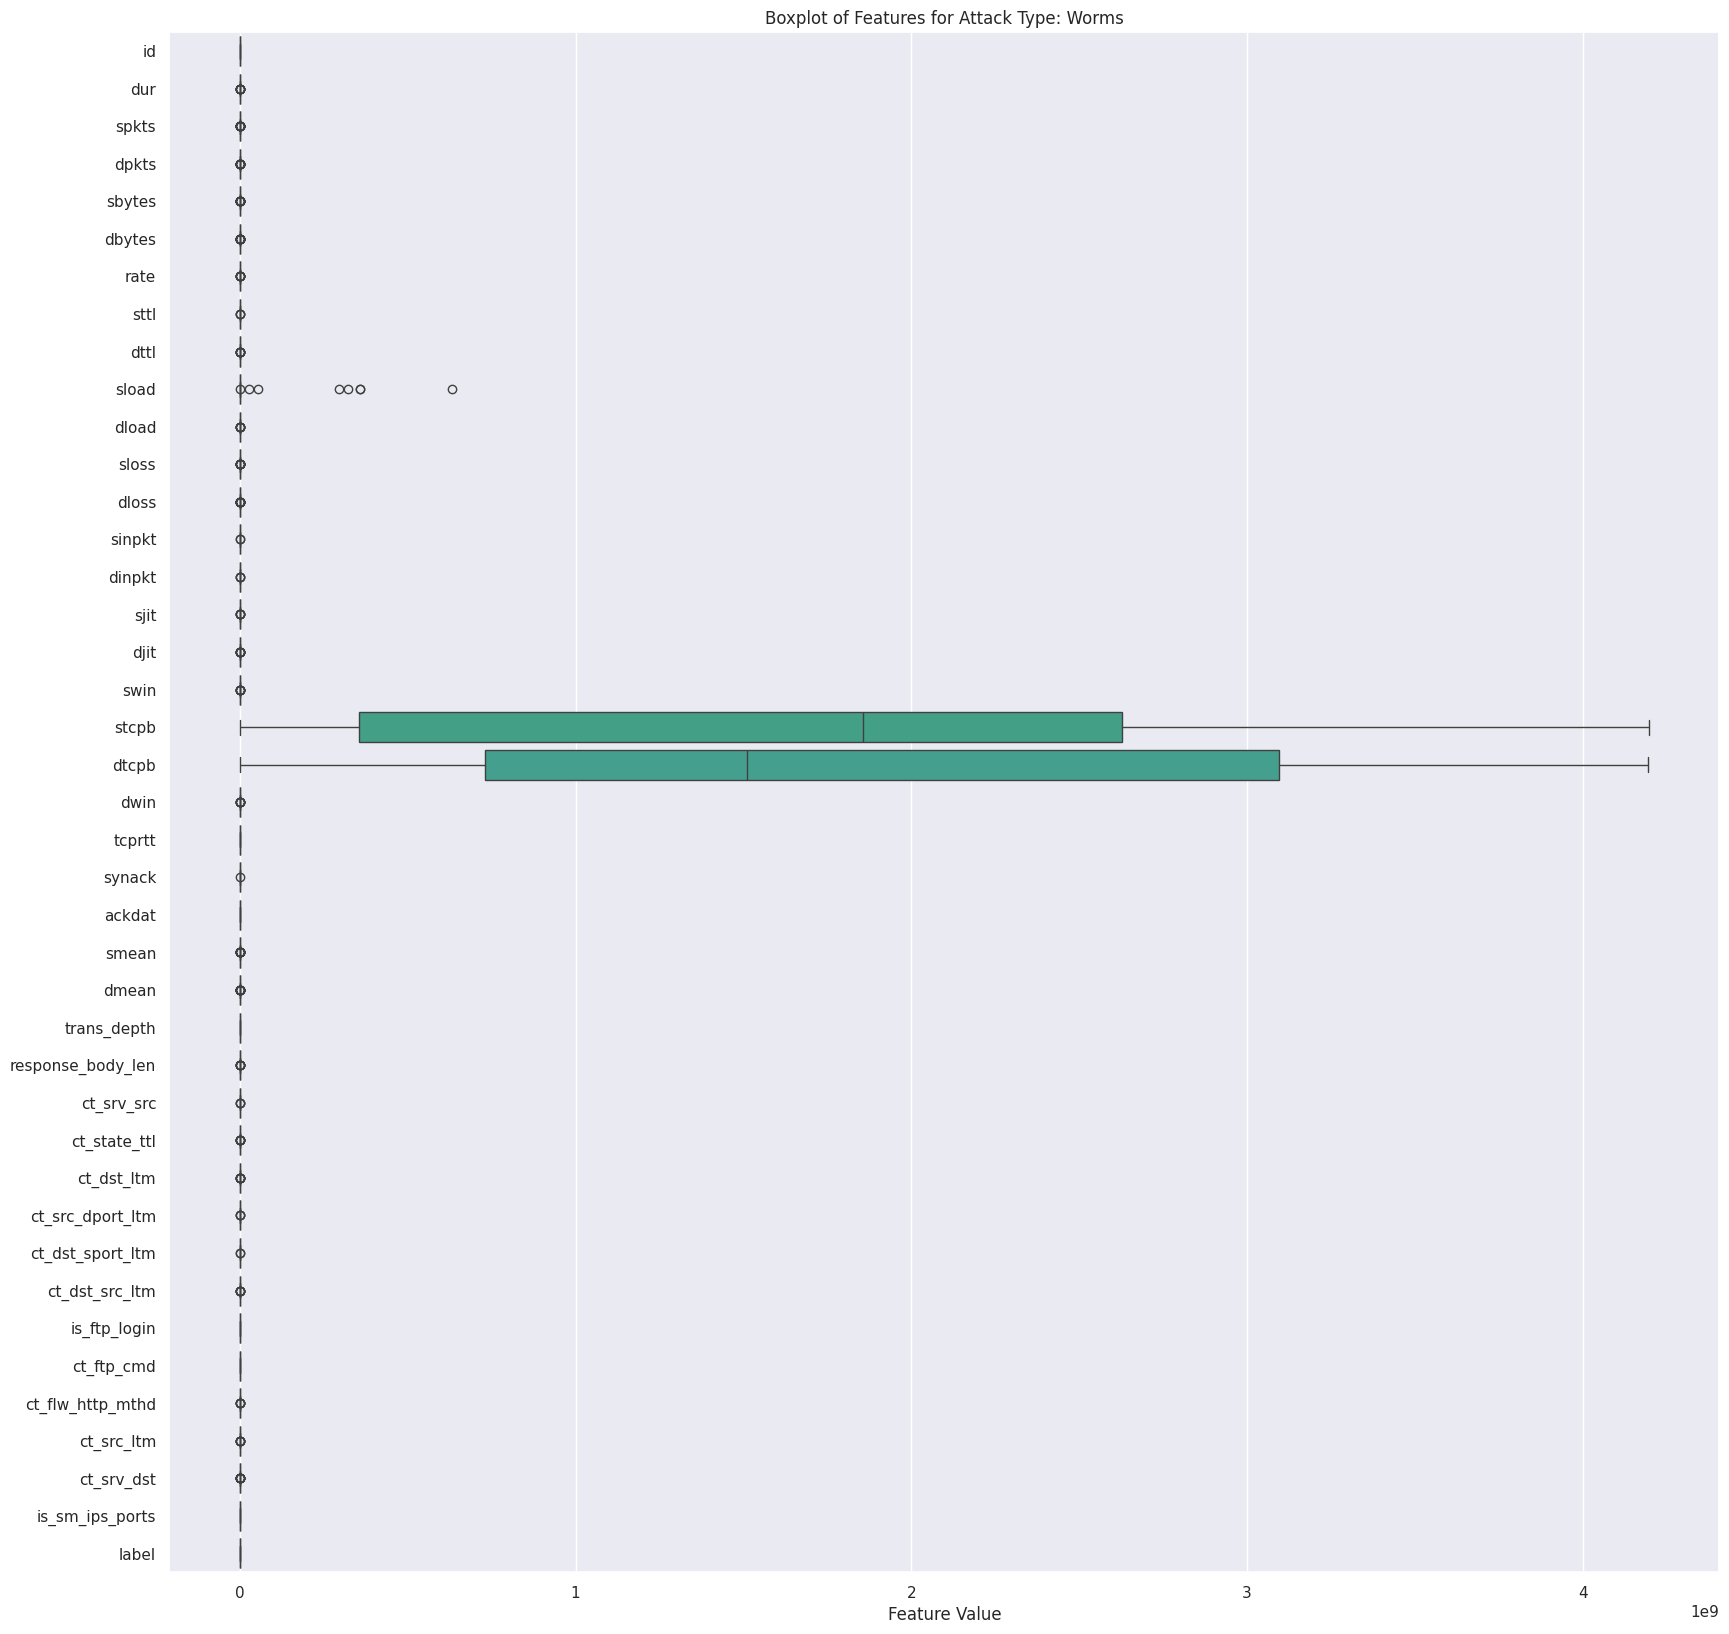

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in sampled_data['Attack Type'].unique():
  attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
  plt.figure(figsize=(20, 20))
  sns.boxplot(data=attack_data.drop(columns=['Attack Type']), orient='h')
  plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
  plt.xlabel('Feature Value')
  plt.show()

In [ ]:
data.groupby('Attack Type').first()

id       dur  proto service state  spkts  dpkts  sbytes  \
Attack Type                                                                   
Analysis         47933  0.000009   unas       -   INT      2      0     200   
Backdoor         47912  0.000009    ddp       -   INT      2      0     200   
DoS              49000  0.000009  encap       -   INT      2      0     200   
Exploits         48933  0.505999    tcp    http   FIN     12     26     860   
Fuzzers          48018  0.675470    tcp     ftp   FIN     12     12    2616   
Generic         117205  0.000003    udp     dns   INT      2      0     114   
Normal               1  0.121478    tcp       -   FIN      6      4     258   
Reconnaissance   48867  0.179422    tcp    http   FIN     10      6     888   
Shellcode        48814  0.000013    udp       -   INT      2      0     240   
Worms            49960  0.338518    tcp    http   FIN     66     14   78481   

                dbytes           rate  sttl  dttl         sload  \
Attack Type                                                       
Analysis             0  111111.107200   254     0  8.888889e+07   
Backdoor             0  111111.107200   254     0  8.888889e+07   
DoS                  0  111111.107200   254     0  8.888889e+07   
Exploits         26136      73.122670    62   252  1.247433e+04   
Fuzzers            682      34.050365   254   252  2.840096e+04   
Generic              0  333333.321500   254     0  1.520000e+08   
Normal             172      74.087490   252   254  1.415894e+04   
Reconnaissance     268      83.601785   254   252  3.567009e+04   
Shellcode            0   76923.077790   254     0  7.384615e+07   
Worms              612     233.370165   254   252  1.826597e+06   

                        dload  sloss  dloss     sinpkt     dinpkt  \
Attack Type                                                         
Analysis             0.000000      0      0   0.009000   0.000000   
Backdoor             0.000000      0      0   0.009000   0.000000   
DoS                  0.000000      0      0   0.009000   0.000000   
Exploits        397328.812500      2     10  45.999909  17.784881   
Fuzzers           7414.096680      3      4  61.406365  52.081363   
Generic              0.000000      0      0   0.003000   0.000000   
Normal            8495.365234      0      0  24.295600   8.375000   
Reconnaissance    9987.626953      2      1  18.801444  34.297801   
Shellcode            0.000000      0      0   0.013000   0.000000   
Worms            13446.847660     30      1   4.991231  25.489846   

                       sjit         djit  swin       stcpb       dtcpb  dwin  \
Attack Type                                                                    
Analysis           0.000000     0.000000     0           0           0     0   
Backdoor           0.000000     0.000000     0           0           0     0   
DoS                0.000000     0.000000     0           0           0     0   
Exploits        3178.403187  2219.545984   255  1381170896  3232491580   255   
Fuzzers         3035.186668    64.822973   255  2162593193  2671705107   255   
Generic            0.000000     0.000000     0           0           0     0   
Normal            30.177547    11.830604   255   621772692  2202533631   255   
Reconnaissance  1004.215673    60.206633   255  4164751767  3459933746   255   
Shellcode          0.000000     0.000000     0           0           0     0   
Worms            514.881352    38.656297   255  2381717425   307268346   255   

                  tcprtt    synack    ackdat  smean  dmean  trans_depth  \
Attack Type                                                               
Analysis        0.000000  0.000000  0.000000    100      0            0   
Backdoor        0.000000  0.000000  0.000000    100      0            0   
DoS             0.000000  0.000000  0.000000    100      0            0   
Exploits        0.120070  0.054775  0.065295     72   1005            1   
Fuzzers         0.162189  

## **3.   Data Preprocessing**

### **Preprocessing**

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
  col_type = data[col].dtype
  if col_type != object:
    c_min = data[col].min()
    c_max = data[col].max()
    # Downcasting float64 to float32
    if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
      data[col] = data[col].astype(np.float32)

    # Downcasting int64 to int32
    elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
      data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Final memory usage: {new_memory_usage:.2f} MB')

Initial memory usage: 90.43 MB
Final memory usage: 52.10 MB


In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 42.39%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int32  
 1   dur                257673 non-null  float32
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int32  
 6   dpkts              257673 non-null  int32  
 7   sbytes             257673 non-null  int32  
 8   dbytes             257673 non-null  int32  
 9   rate               257673 non-null  float32
 10  sttl               257673 non-null  int32  
 11  dttl               257673 non-null  int32  
 12  sload              257673 non-null  float32
 13  dload              257673 non-null  float32
 14  sloss              257673 non-null  int32  
 15  dloss              257673 non-null  int32  
 16  sinpkt  

In [ ]:
data.describe().transpose()

count          mean           std   min           25%  \
id                 257673.0  7.281182e+04  4.892992e+04   1.0  32210.000000   
dur                257673.0  1.246715e+00  5.974400e+00   0.0      0.000008   
spkts              257673.0  1.977714e+01  1.359472e+02   1.0      2.000000   
dpkts              257673.0  1.851470e+01  1.119860e+02   0.0      0.000000   
sbytes             257673.0  8.572952e+03  1.737739e+05  24.0    114.000000   
dbytes             257673.0  1.438729e+04  1.461993e+05   0.0      0.000000   
rate               257673.0  9.125392e+04  1.603769e+05   0.0     30.789276   
sttl               257673.0  1.800009e+02  1.024883e+02   0.0     62.000000   
dttl               257673.0  8.475496e+01  1.127621e+02   0.0      0.000000   
sload              257673.0  7.060869e+07  1.858389e+08   0.0  12318.004883   
dload              257673.0  6.582142e+05  2.409641e+06   0.0      0.000000   
sloss              257673.0  4.889317e+00  6.557495e+01   0.0      0.000000   
dloss              257673.0  6.743691e+00  5.370222e+01   0.0      0.000000   
sinpkt             257673.0  9.123007e+02  6.931191e+03   0.0      0.008000   
dinpkt             257673.0  9.891545e+01  1.094940e+03   0.0      0.000000   
sjit               257673.0  5.419374e+03  4.904773e+04   0.0      0.000000   
djit               257673.0  5.822515e+02  3.926478e+03   0.0      0.000000   
swin               257673.0  1.217537e+02  1.273674e+02   0.0      0.000000   
stcpb              257673.0  1.006120e+09  1.367795e+09   0.0      0.000000   
dtcpb              257673.0  1.002295e+09  1.363877e+09   0.0      0.000000   
dwin               257673.0  1.192546e+02  1.272305e+02   0.0      0.000000   
tcprtt             257673.0  4.603809e-02  9.287276e-02   0.0      0.000000   
synack             257673.0  2.365186e-02  5.382806e-02   0.0      0.000000   
ackdat             257673.0  2.238623e-02  4.573291e-02   0.0      0.000000   
smean              257673.0  1.376390e+02  2.059011e+02  24.0     57.000000   
dmean              257673.0  1.216497e+02  2.540410e+02   0.0      0.000000   
trans_depth        257673.0  1.022420e-01  7.105928e-01   0.0      0.000000   
response_body_len  257673.0  1.968900e+03  4.962523e+04   0.0      0.000000   
ct_srv_src         257673.0  9.383176e+00  1.082971e+01   1.0      2.000000   
ct_state_ttl       257673.0  1.324978e+00  9.922998e-01   0.0      1.000000   
ct_dst_ltm         257673.0  6.050467e+00  8.173749e+00   1.0      1.000000   
ct_src_dport_ltm   257673.0  5.238271e+00  8.160822e+00   1.0      1.000000   
ct_dst_sport_ltm   257673.0  4.032677e+00  5.831515e+00   1.0      1.000000   
ct_dst_src_ltm     257673.0  8.322964e+00  1.112075e+01   1.0      1.000000   
is_ftp_login       257673.0  1.281857e-02  1.160907e-01   0.0      0.000000   
ct_ftp_cmd         257673.0  1.284962e-02  1.164211e-01   0.0      0.000000   
ct_flw_http_mthd   257673.0  1.320045e-01  6.818536e-01   0.0      0.000000   
ct_src_ltm         257673.0  6.800045e+00  8.396266e+00   1.0      2.000000   
ct_srv_dst         257673.0  9.121049e+00  1.087475e+01   1.0      2.000000   
is_sm_ips_ports    257673.0  1.427391e-02  1.186179e-01   0.0      0.000000   
label              257673.0  6.390774e-01  4.802691e-01   0.0      0.000000   

                             50%           75%           max  
id                  64419.000000  1.109230e+05  1.753410e+05  
dur                     0.004285  6.857770e-01  5.999999e+01  
spkts                   4.000000  1.200000e+01  1.064600e+04  
dpkts                   2.000000  1.000000e+01  1.101800e+04  
sbytes                528.000000  1.362000e+03  1.435577e+07  
dbytes                178.000000  1.064000e+03  1.465753e+07  
rate                 2955.664795  1.250000e+05  1.000000e+06  
sttl                  254.000000  2.540000e+02  2.550000e+02  
dttl                   29.000000  2.520000e+02  2.540000e+02  
sload              743942.312500  8.000000e+07  5.988000e+09  
dload     

In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index([], dtype='object')

In [ ]:
data.shape

(257673, 45)

In [ ]:
# Columns after removing non variant columns
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label', 'Attack Type'],
      dtype='object')

### **Applying PCA to reduce dimensions**

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['id', 'Attack Type', 'proto', 'service', 'state'], axis=1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components=size, batch_size=500)
for batch in np.array_split(scaled_features, len(features) // 500):
  ipca.partial_fit(batch)

print(f'Information retained: {sum(ipca.explained_variance_ratio_):.2%}')

Information retained: 93.06%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns=[f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6        PC7  \
0       2.213096 -0.431683 -0.580293 -0.441355 -0.514228 -0.470580  -0.102739   
1       2.138336  1.770864  0.207228 -2.012574 -1.269089 -0.223046  -0.530715   
2       3.518493  0.468645  0.980693 -1.383115 -0.529023  0.954592  -0.462033   
3       2.855321 -0.278886 -0.193440 -1.164245 -1.902855  2.101090  11.593730   
4       0.003205 -0.096526  3.254812 -1.151648 -0.736815 -0.018429  -0.589876   
...          ...       ...       ...       ...       ...       ...        ...   
257668 -0.548909 -0.643942 -2.248844  0.729506  0.638639 -0.288162   0.114328   
257669  3.320520 -1.248554  1.617252  0.920355  0.115623 -0.599268  -0.539473   
257670  0.264112 -0.450028 -5.657068  0.601006 -0.446212  7.352516  -2.073128   
257671  0.264121 -0.450035 -5.657046  0.601008 -0.446198  7.352615  -2.073137   
257672 -0.341661 -0.651240 -2.272920  0.686996  0.568948 -0.228520   0.082233   

             PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0      -0.235897 -0.161098 -0.494642  0.724617 -0.681727  0.883830  0.234505   
1      -0.317622 -0.173109  0.144704 -0.308534  0.987384  0.759632 -0.443934   
2      -0.806108 -0.276575  0.127465 -0.686406  0.835544 -0.070278 -1.366194   
3       0.927589  0.494694  0.314375  0.178688 -0.111260 -0.342012 -0.039585   
4       0.785239 -0.893715  0.457210  0.294827  0.014111  0.353832  0.187950   
...          ...       ...       ...       ...       ...       ...       ...   
257668 -0.351740 -0.249775 -0.420552 -0.335403 -0.503105 -0.557511  0.015181   
257669  0.406492 -0.719909  1.860952  2.303387 -0.038411 -0.603363 -0.235829   
257670  7.642213  0.519221  1.756860 -0.459123 -0.068866  1.353538  0.026901   
257671  7.642123  0.519205  1.756871 -0.459128 -0.068897  1.353549  0.026921   
257672 -0.279323 -0.266059 -0.740690 -0.120184 -0.578075 -0.596401 -0.028539   

            PC15      PC16      PC17      PC18      PC19      PC20 Attack Type  
0      -0.077024  0.377027 -0.953059  0.829840  1.029076 -0.552341      Normal  
1      -0.509625 -0.244041 -0.214986  0.798611  1.103428 -1.755569      Normal  
2      -1.723855  1.107744  0.062170  0.409238  0.001058 -0.978736      Normal  
3      -0.035214  0.068898  0.034299 -0.057397  1.070201 -0.846716      Normal  
4       0.105999  0.413929 -1.149866 -0.274895  2.581124 -1.597580      Normal  
...          ...       ...       ...       ...       ...       ...         ...  
257668 -0.039091  0.186308 -0.541094 -0.007903  0.318407  0.174905      Normal  
257669  0.265938 -0.239968  0.899828  1.137483  0.139247  0.108136      Normal  
257670 -0.029319  0.365728  0.509033  0.004848 -0.007736  0.021079      Normal  
257671 -0.029293  0.365715  0.509043  0.004851 -0.007643  0.021202      Normal  
257672  0.014183  0.137402 -0.331318 -0.010222  0.385097  0.157535      Normal  

[257673 rows x 21 columns]

## **4.   Machine Learning Models**

### **Each of the model descriptions is written in their designated sections.**

In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

### **Creating a Balanced Dataset for Binary Classification**

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'Normal']
intrusions = new_data.loc[new_data['Attack Type'] != 'Normal']

intrusions = intrusions.sample(n=len(normal_traffic), replace=False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'Normal'), 0, 1)
bc_data = ids_data.sample(n=15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7601
1    7399
Name: count, dtype: int64


In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis=1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.25, random_state=0)

### **Logistic Regression (Binary Classification)**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter=10000, C=0.1, random_state=0, solver='saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv=5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9906666666666667, 0.988, 0.9848888888888889, 0.9875555555555555, 0.9911111111111112

Mean cross-validation score: 0.99


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep=', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

Logistic Regression Model 1 coefficients:
[-0.91824618 -0.40193234  1.63651012  0.90291124  1.60191329 -1.87141669
  0.87008171 -1.79955274  1.03969277 -1.35454714 -0.44387606  0.70683043
  1.95634988 -0.04004959  0.79950989 -0.25192289  2.14557543  0.12610184
 -2.73063147  0.6770354 ]

Logistic Regression Model 1 intercept: 0.7133897005797343


In [ ]:
lr2 = LogisticRegression(max_iter=15000, C=100, random_state=0, solver='sag')
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv=5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 0.992, 0.9928888888888889, 0.9902222222222222, 0.9906666666666667, 0.9915555555555555

Mean cross-validation score: 0.99


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[-1.45040937 -0.59523747  2.83428248  1.33643879  2.52245014 -3.77175156
  1.55005251 -3.76894323  1.33360285 -2.41071095 -0.71788863  1.10963468
  2.78779251  0.07242836  1.18123391 -0.48106888  3.29009486  0.23265358
 -4.28501182  1.35415235]

Logistic Regression Model 2 intercept: 1.1054842577880326


### **Support Vector Machine (Binary Classification)**

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel='poly', C=1, random_state=0, probability=True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv=5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 0.9991111111111111, 0.9973333333333333, 0.9977777777777778, 0.9946666666666667, 0.9982222222222222

Mean cross-validation score: 1.00


In [ ]:
svm2 = SVC(kernel='rbf', C=1, gamma=0.1, random_state=0, probability=True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv=5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9964444444444445, 0.9946666666666667, 0.996, 0.9973333333333333, 0.996

Mean cross-validation score: 1.00


In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: 0.28958573839280694
SVM Model 2 intercept: -0.11418275825231908


### **Creating a Balanced Dataset for Multi-class Classification**

In [ ]:
new_data['Attack Type'].value_counts()

Attack Type
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1500]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 5000:
    df = df.sample(n=5000, random_state=0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df['Attack Type'].value_counts()

Attack Type
Normal            5000
Generic           5000
Exploits          5000
Fuzzers           5000
DoS               5000
Reconnaissance    5000
Analysis          2677
Backdoor          2329
Shellcode         1511
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Exploits          5000
Fuzzers           5000
Reconnaissance    5000
Normal            5000
Backdoor          5000
Analysis          5000
Generic           5000
Shellcode         5000
DoS               5000
Name: count, dtype: int64

In [ ]:
features = blnc_data.drop('Attack Type', axis=1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=10, max_depth=6, max_features=None, random_state=0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv=5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.48948148148148146, 0.4794074074074074, 0.4951111111111111, 0.49244444444444446, 0.48992592592592593

Mean cross-validation score: 0.49


In [ ]:
rf2 = RandomForestClassifier(n_estimators=15, max_depth=8, max_features=20, random_state=0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv=5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.549037037037037, 0.542962962962963, 0.5546666666666666, 0.5539259259259259, 0.5567407407407408

Mean cross-validation score: 0.55


### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv=5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.484, 0.47125925925925927, 0.48059259259259257, 0.4845925925925926, 0.47688888888888886

Mean cross-validation score: 0.48


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv=5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.5311111111111111, 0.5237037037037037, 0.5306666666666666, 0.5327407407407407, 0.5365925925925926

Mean cross-validation score: 0.53


### **K Nearest Neighbors**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv=5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.5857777777777777, 0.5903703703703703, 0.5934814814814815, 0.5958518518518519, 0.5958518518518519

Mean cross-validation score: 0.59


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv=5)
print('K Nearest Neighbors Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 2

Cross-validation scores: 0.5955555555555555, 0.5937777777777777, 0.601037037037037, 0.6013333333333334, 0.601037037037037

Mean cross-validation score: 0.60


## **5.   Performance Evaluation and Discussion**

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve

### **Logistic Regression Models Comparison**

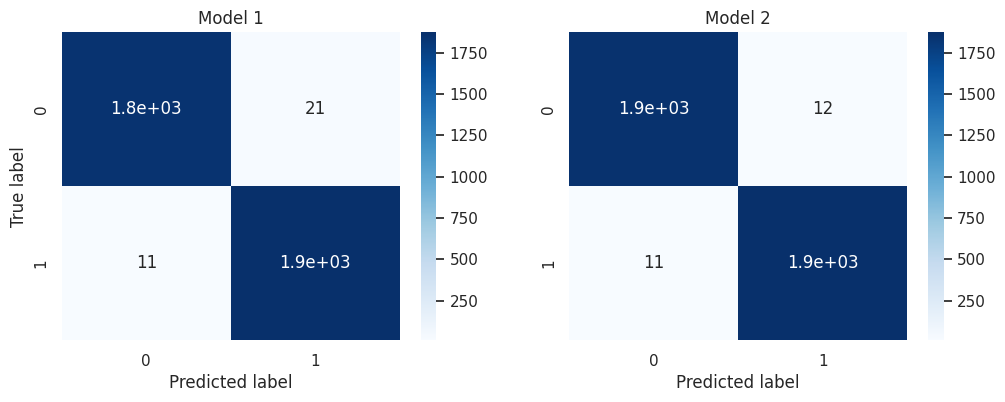

In [ ]:
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(conf_matrix_model1, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

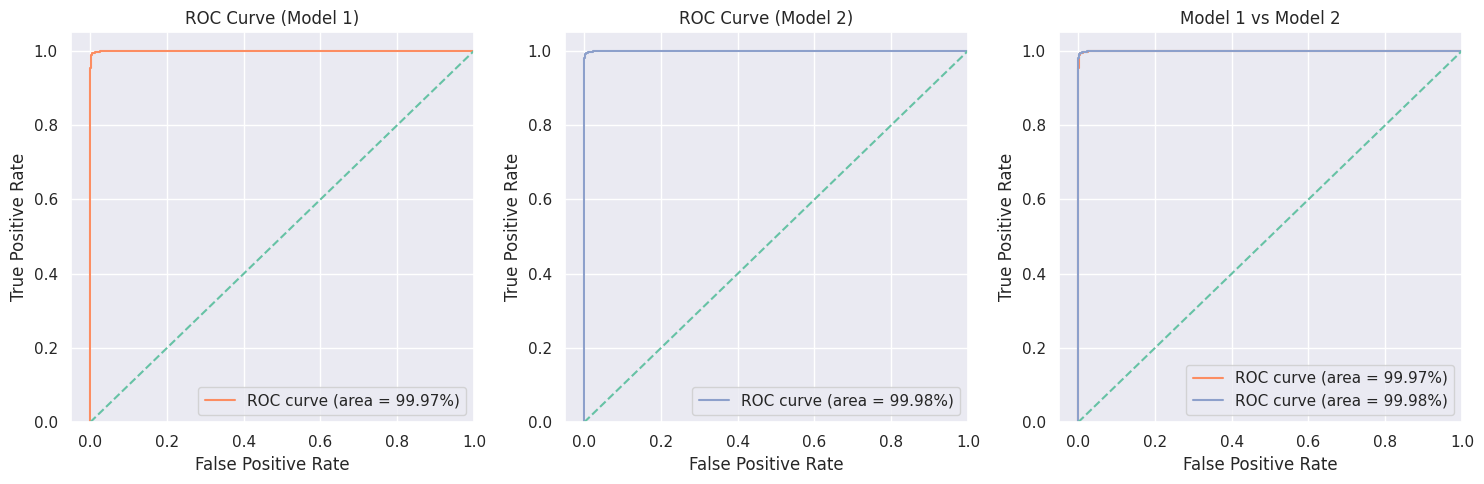

In [ ]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = sns.color_palette('Set2', n_colors=3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(fpr1, tpr1, color=colors[1], label=f'ROC curve (area = {roc_auc1:.2%})')
axes[0].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc='lower right')

axes[1].plot(fpr2, tpr2, color=colors[2], label=f'ROC curve (area = {roc_auc2:.2%})')
axes[1].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc='lower right')

axes[2].plot(fpr1, tpr1, color=colors[1], label=f'ROC curve (area = {roc_auc1:.2%})')
axes[2].plot(fpr2, tpr2, color=colors[2], label=f'ROC curve (area = {roc_auc2:.2%})')
axes[2].plot([0, 1], [0, 1], color=colors[0], linestyle='--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

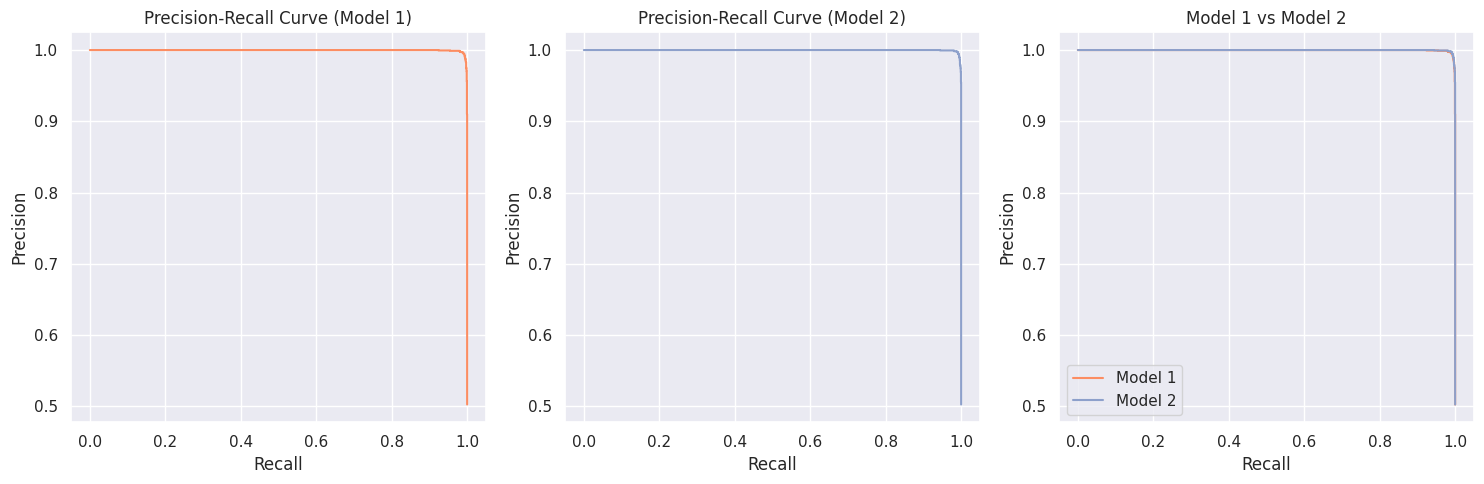

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

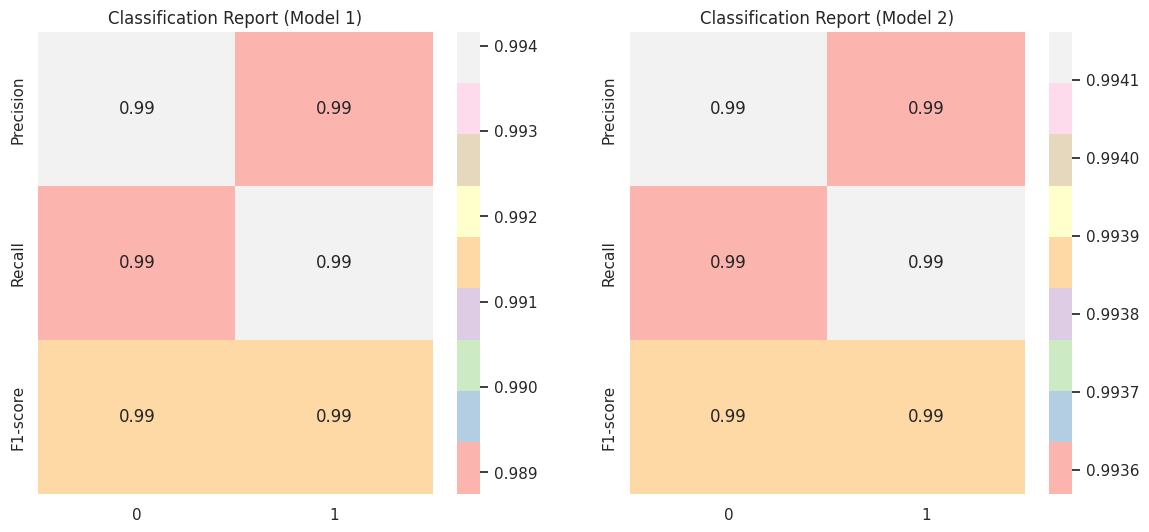

In [ ]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

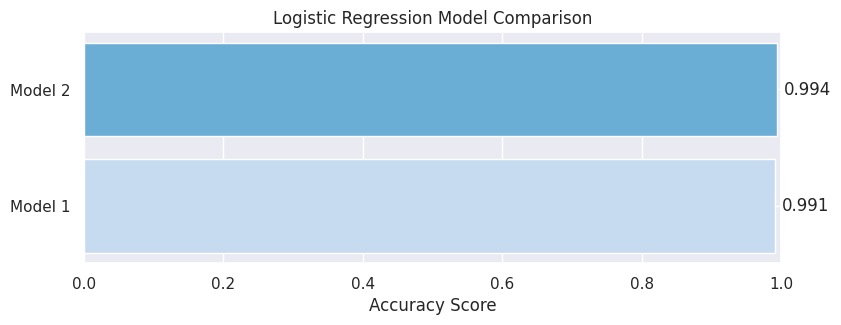

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

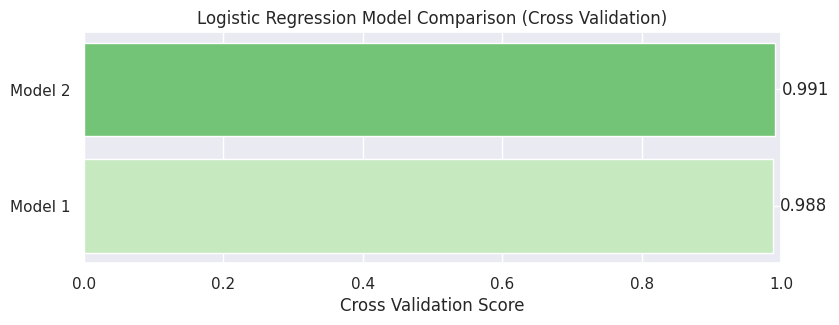

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **Support Vector Machine Comparison**

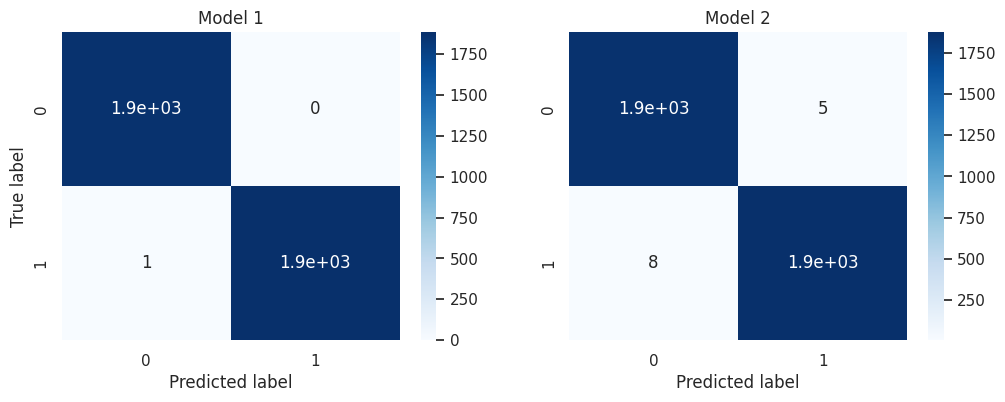

In [ ]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

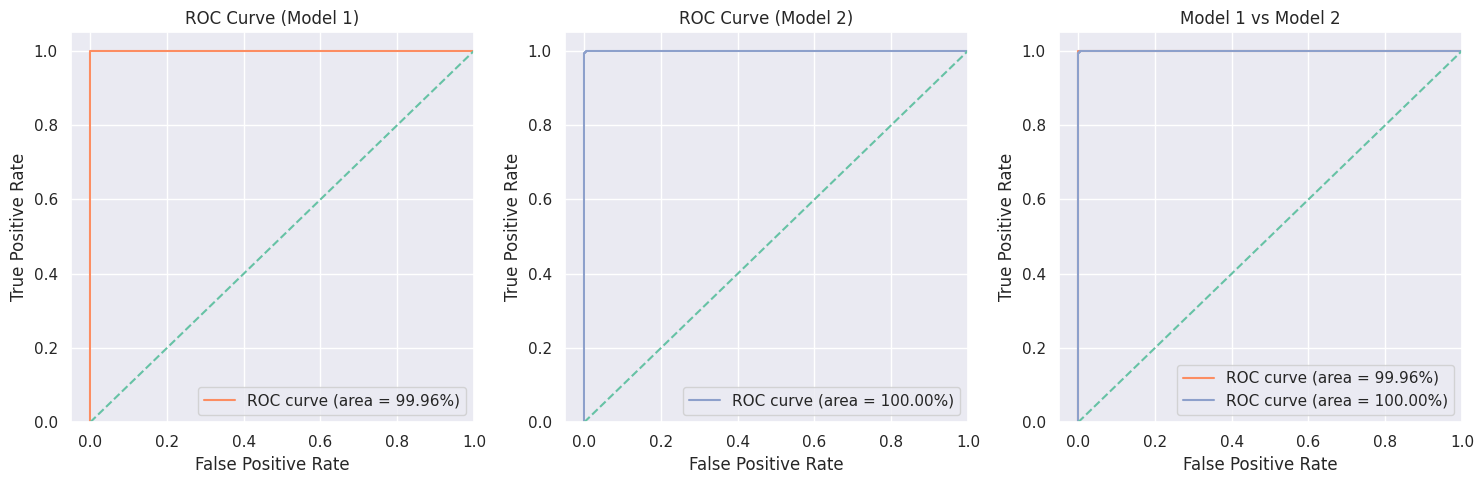

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

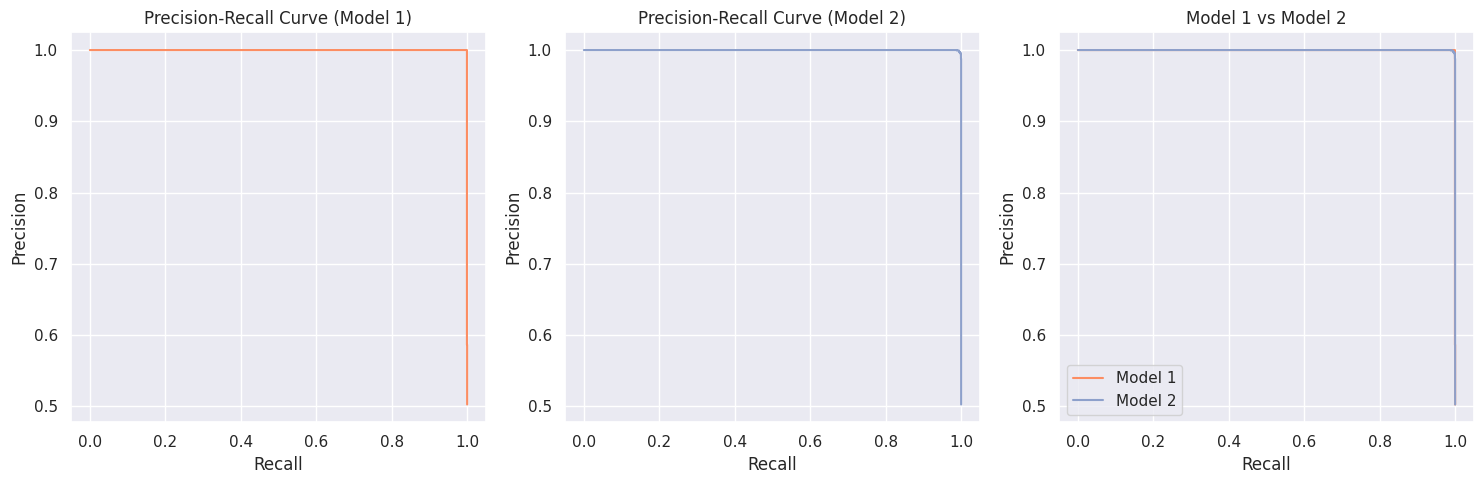

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

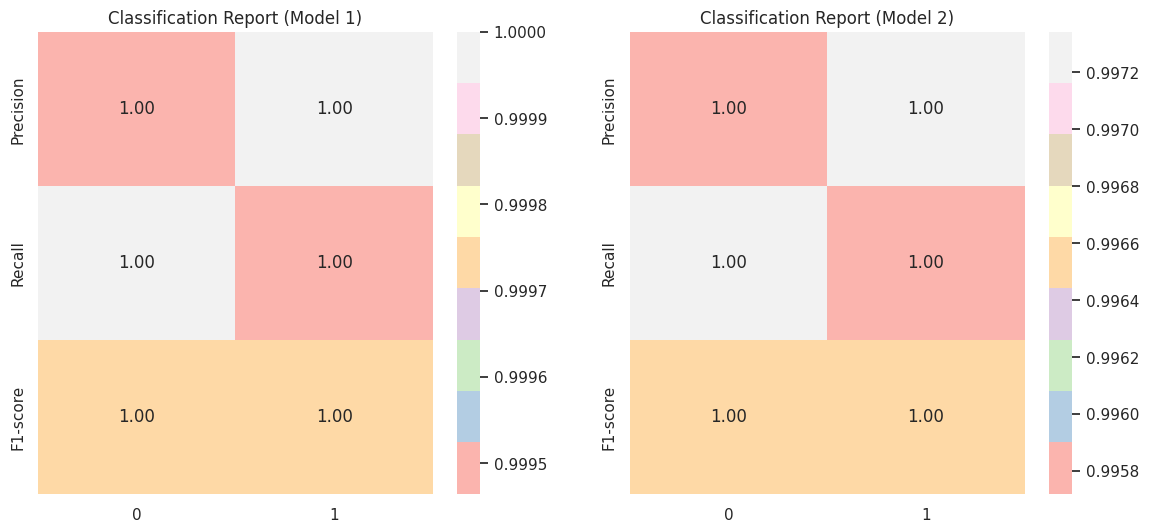

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

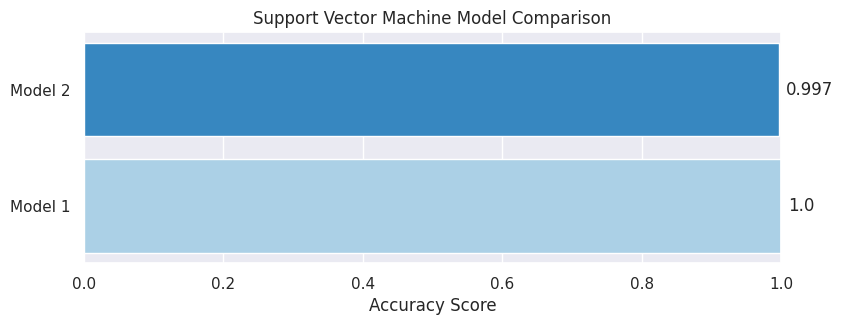

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

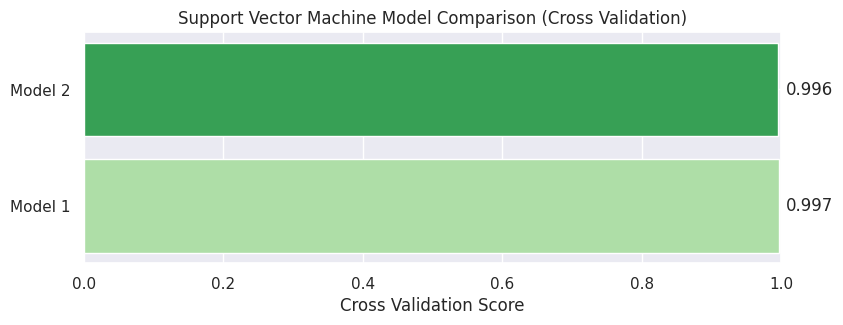

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **Comparison of the Binary Classification Algorithms**

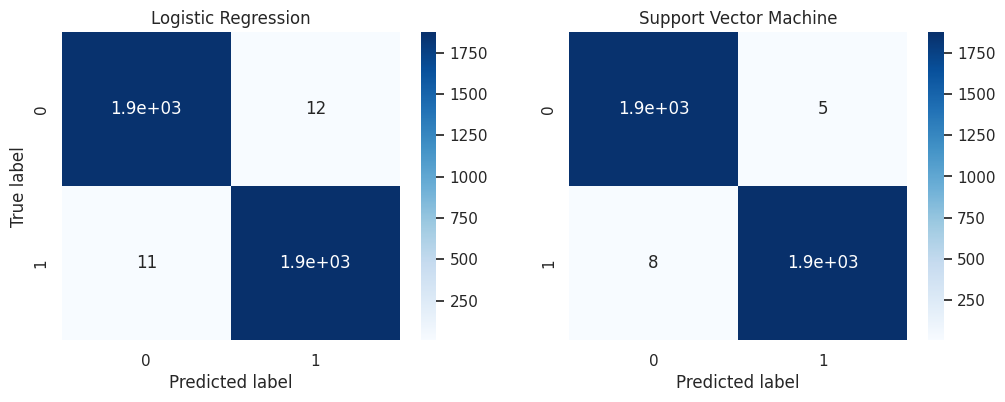

In [ ]:
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()


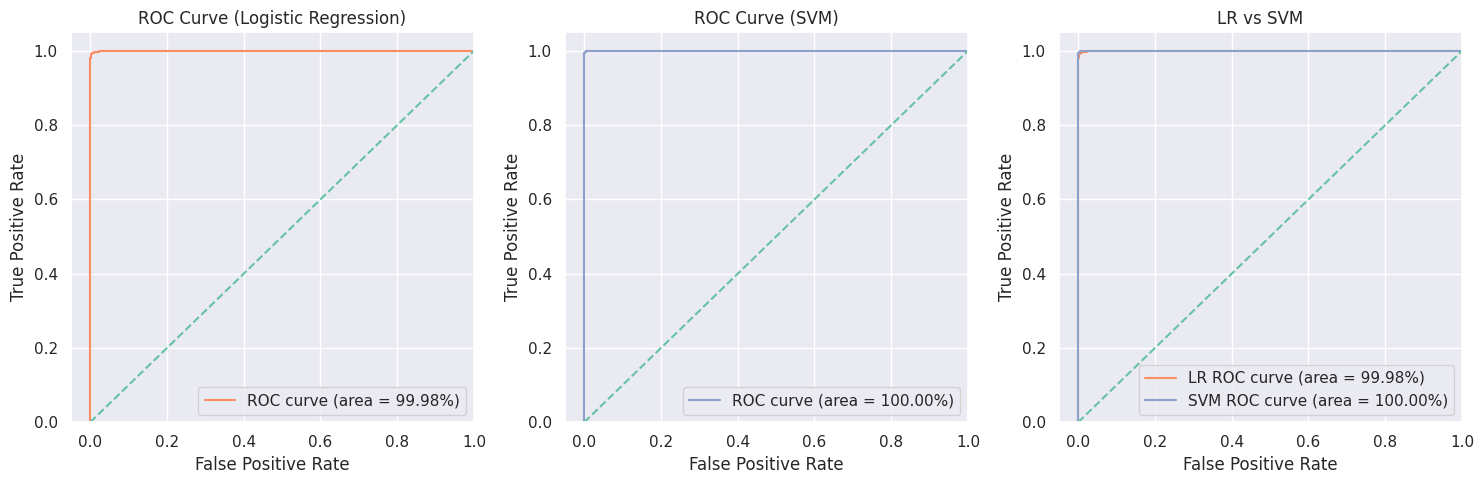

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

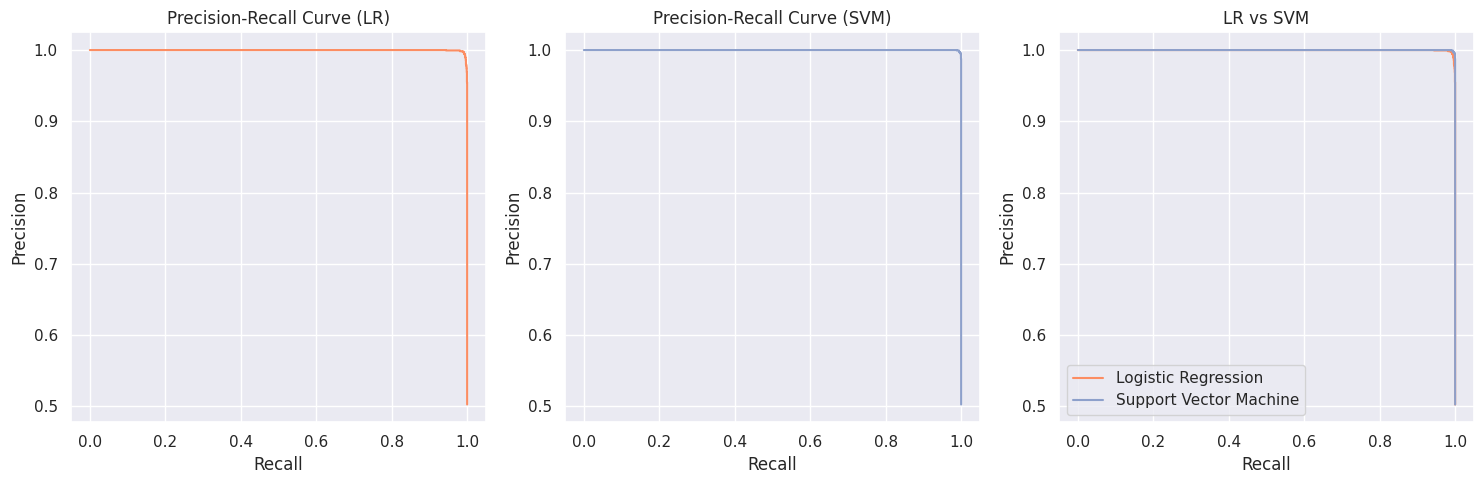

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

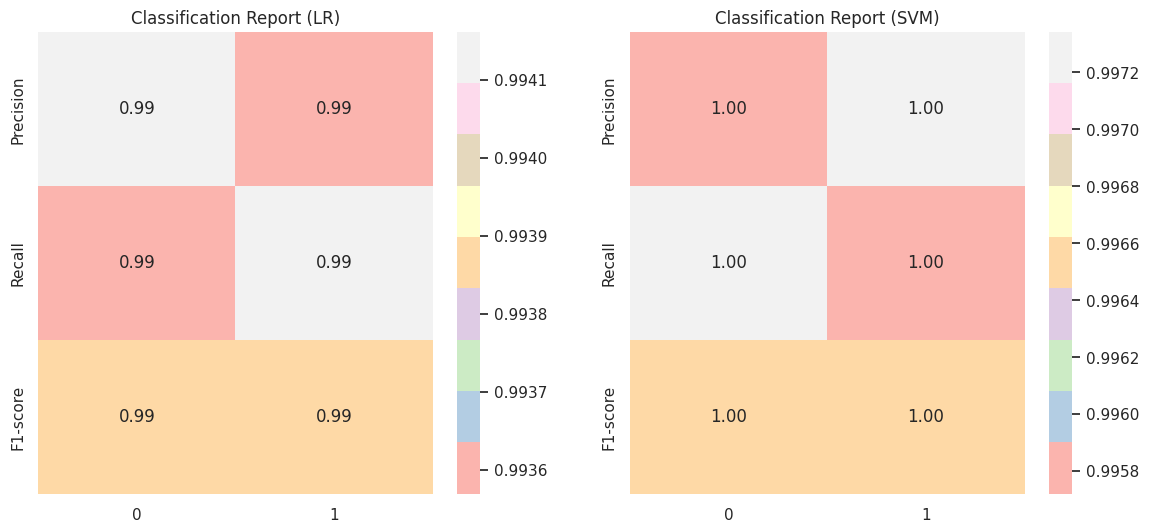

In [ ]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

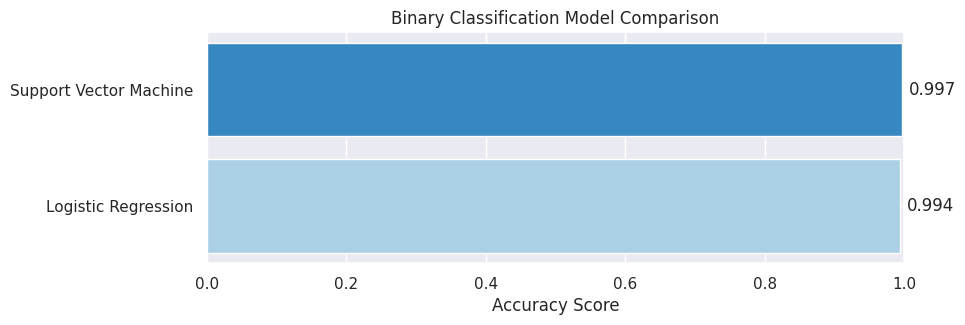

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

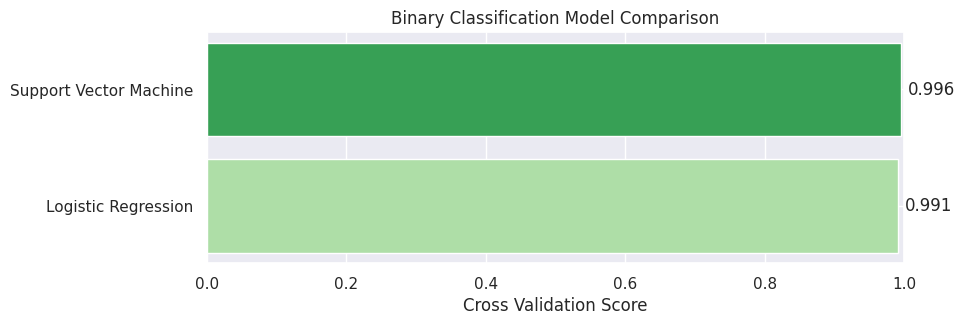

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **Random Forest Models Comparison**

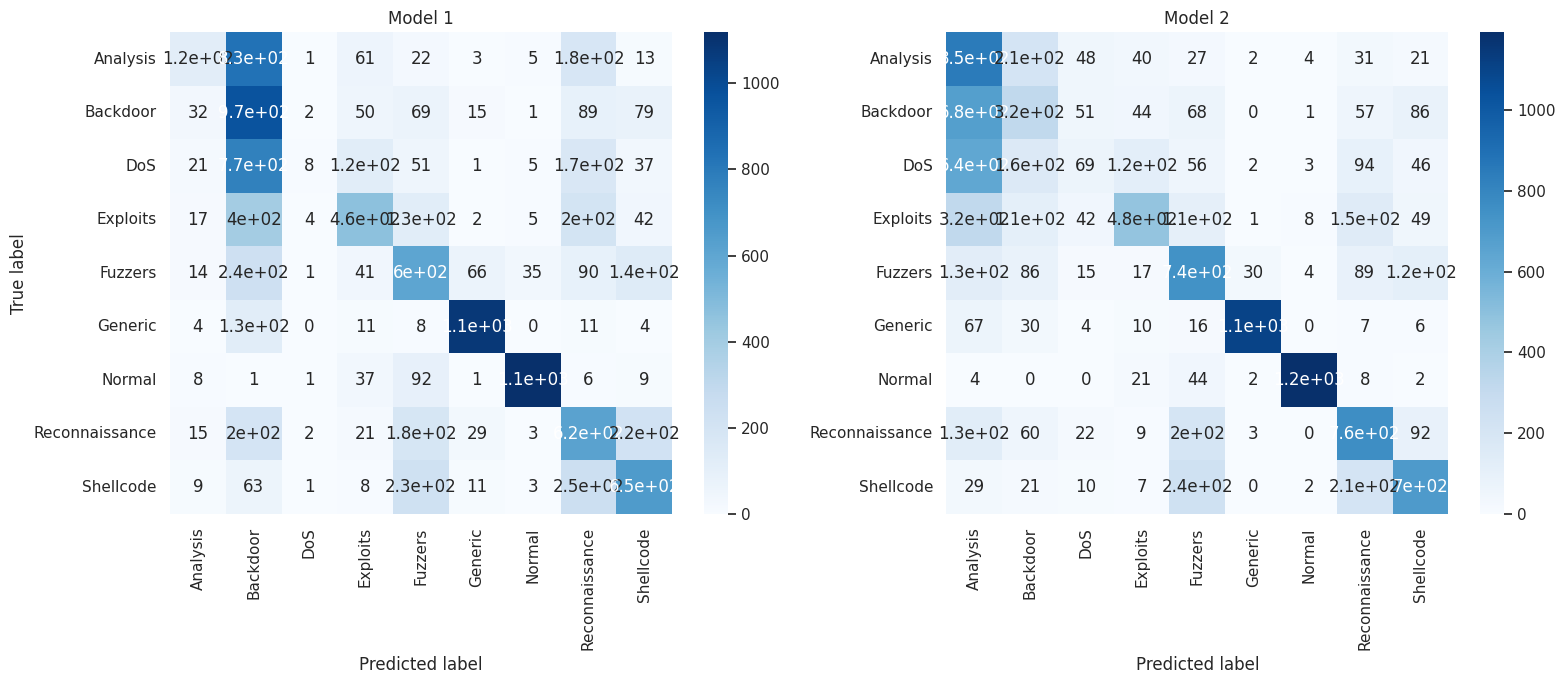

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

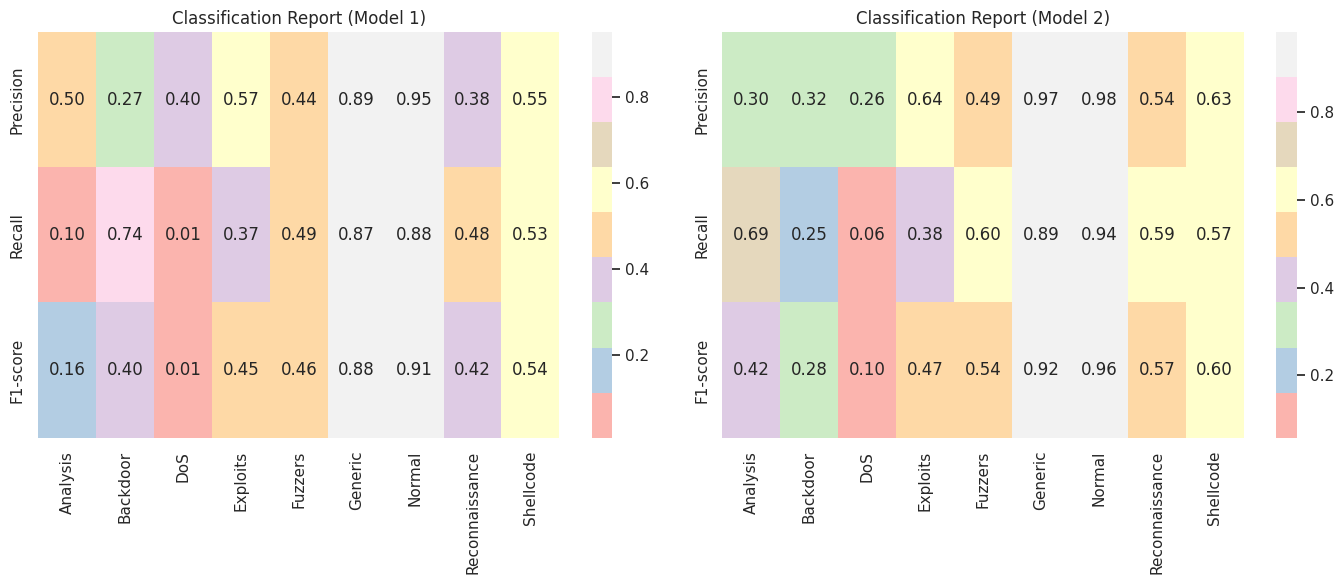

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

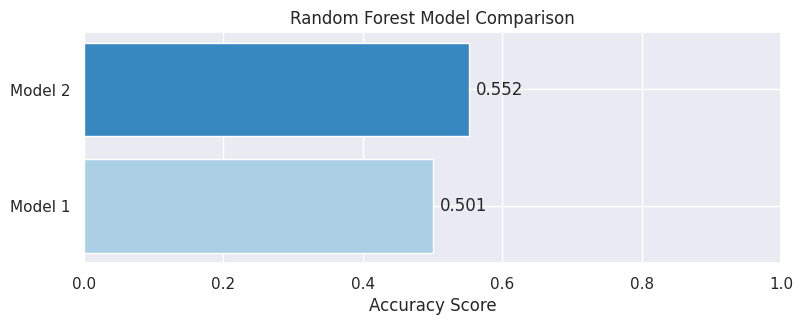

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

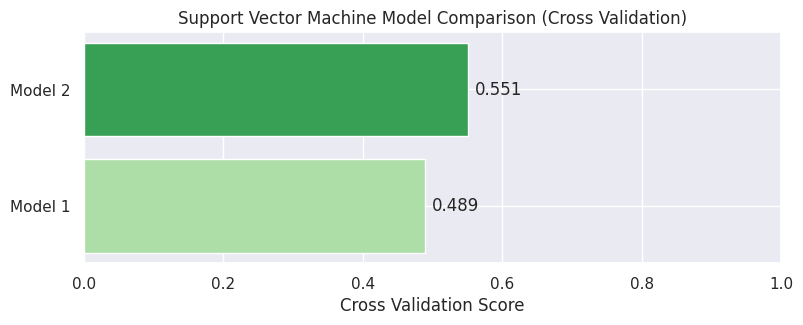

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **Decision Trees Models Comparison**

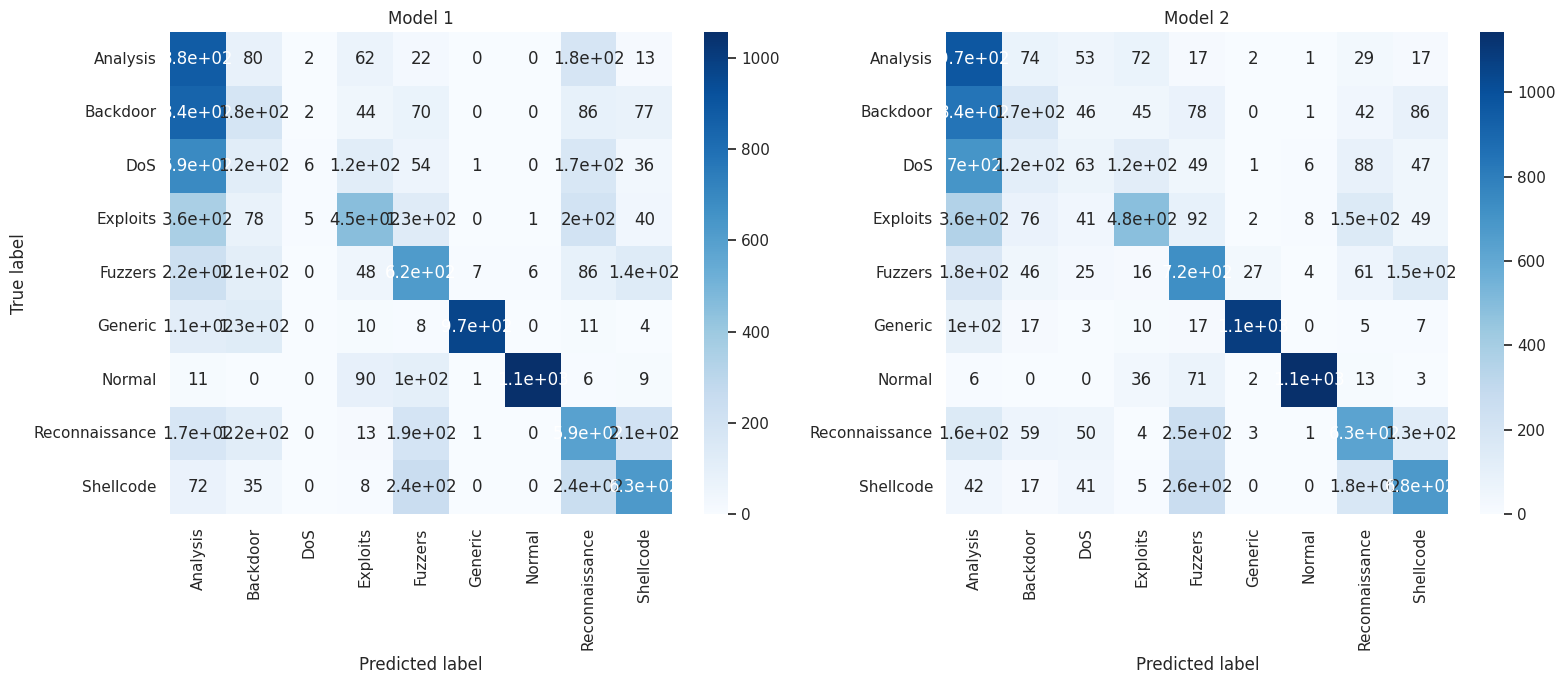

In [ ]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

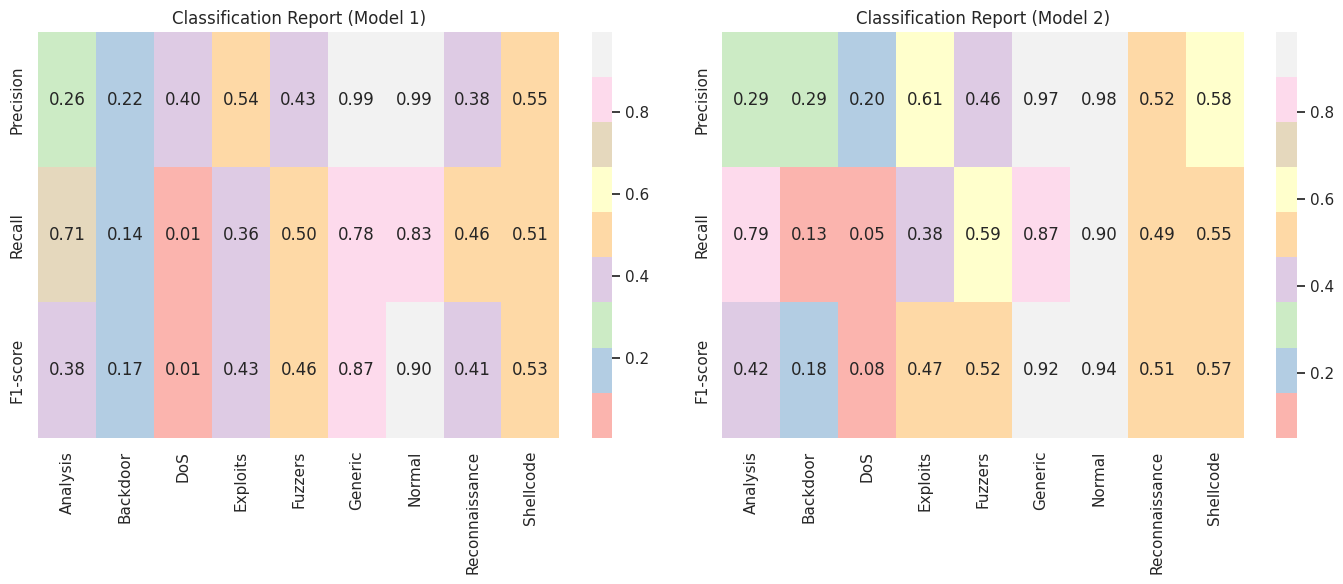

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

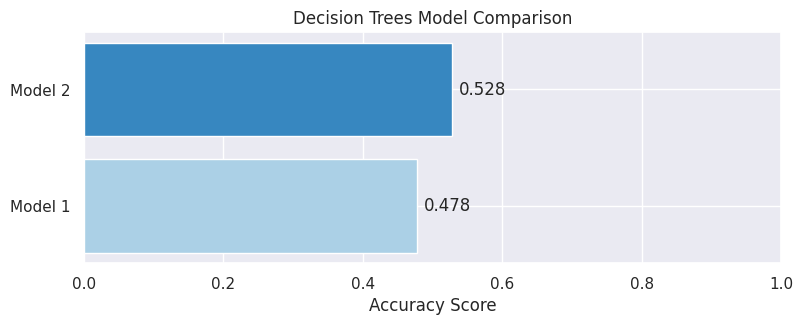

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_dt1, y_test)
acc2 = accuracy_score(y_pred_dt2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Decision Trees Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

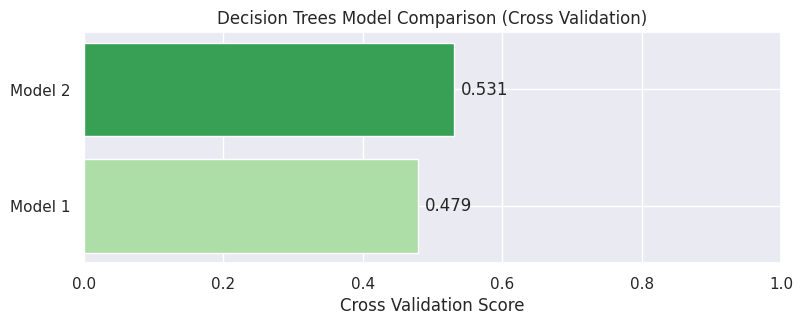

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_dt1.mean(), cv_dt2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **K Nearest Neighbors Models Comparison**

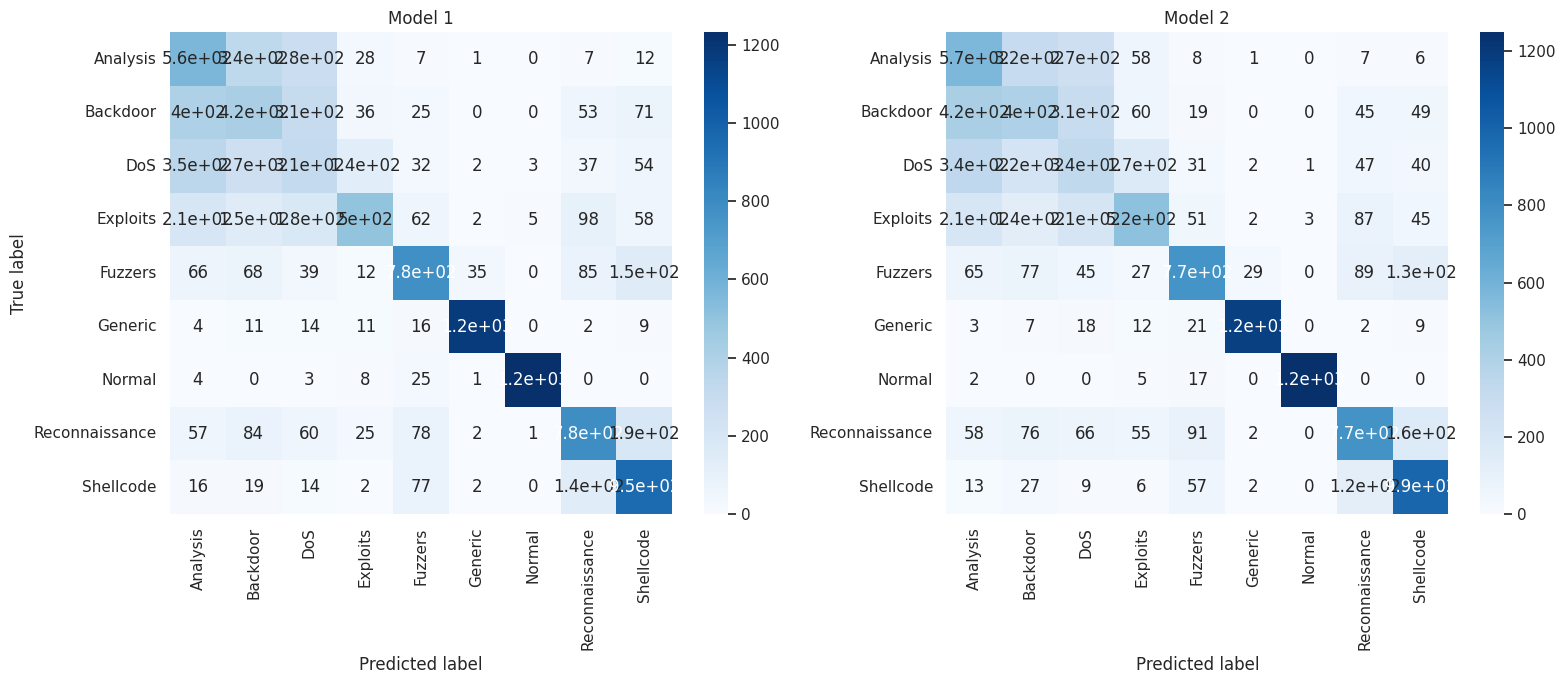

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

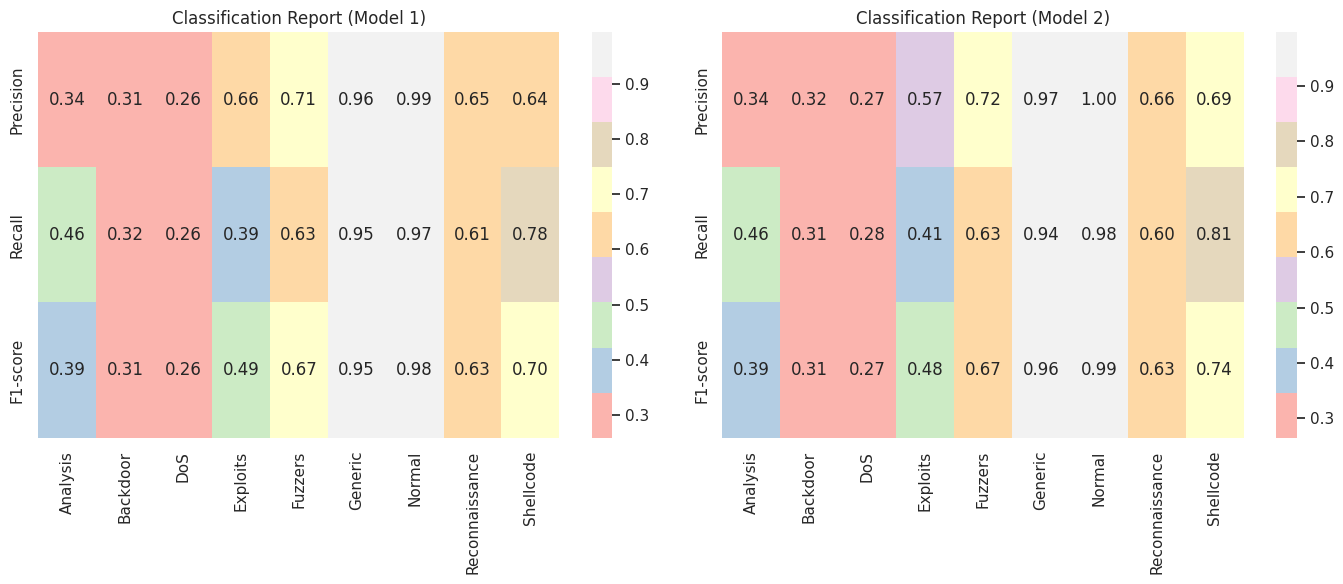

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

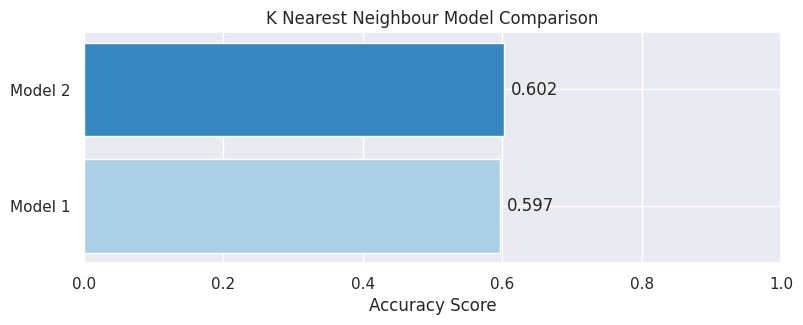

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_knn1, y_test)
acc2 = accuracy_score(y_pred_knn2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('K Nearest Neighbour Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

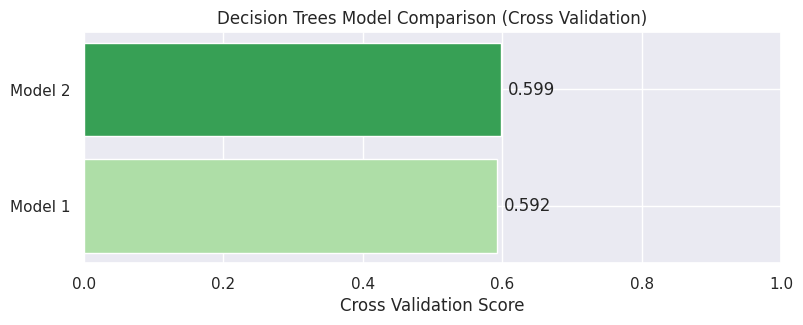

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_knn1.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### **Comparison of the Multi-class Classification Algorithms**

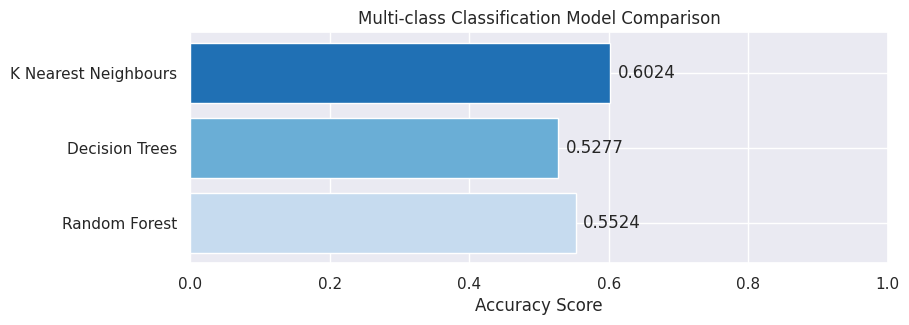

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [rf_acc, dt_acc, knn_acc]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

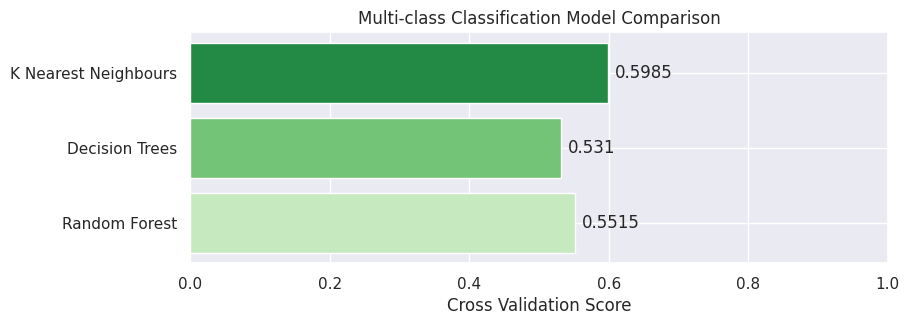

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [cv_rf2.mean(), cv_dt2.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

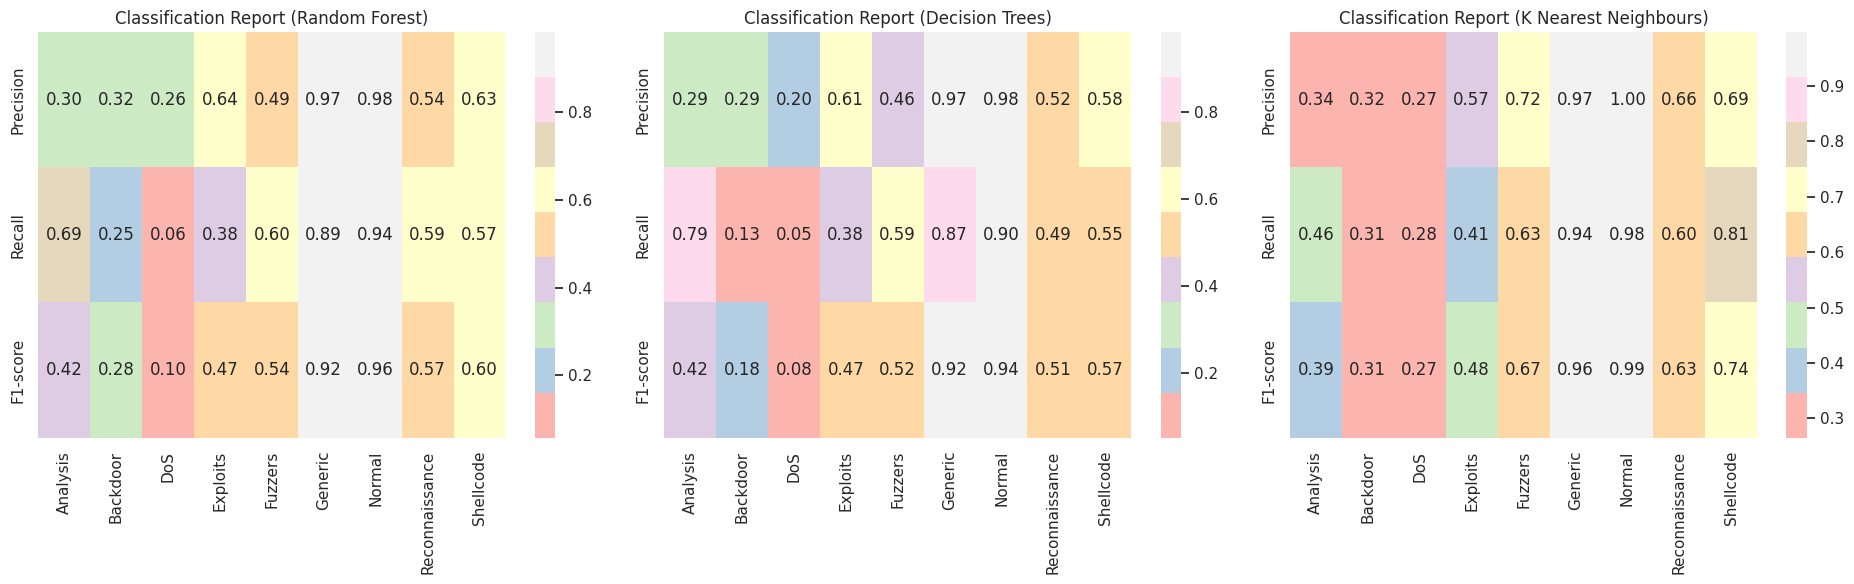

In [ ]:
target_names = rf2.classes_
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

datas = []
for pred in preds:
    metrics = classification_report(y_true = y_test, y_pred = pred, target_names = target_names, output_dict = True)
    precision = [metrics[target_name]['precision'] for target_name in target_names]
    recall = [metrics[target_name]['recall'] for target_name in target_names]
    f1_score = [metrics[target_name]['f1-score'] for target_name in target_names]

    datas.append(np.array([precision, recall, f1_score]))

rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 3, figsize = (19, 6))
sns.heatmap(datas[0], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(datas[1], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
sns.heatmap(datas[2], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[2])

axs[0].set_title('Classification Report (Random Forest)')
axs[1].set_title('Classification Report (Decision Trees)')
axs[2].set_title('Classification Report (K Nearest Neighbours)')
fig.tight_layout()
plt.show()

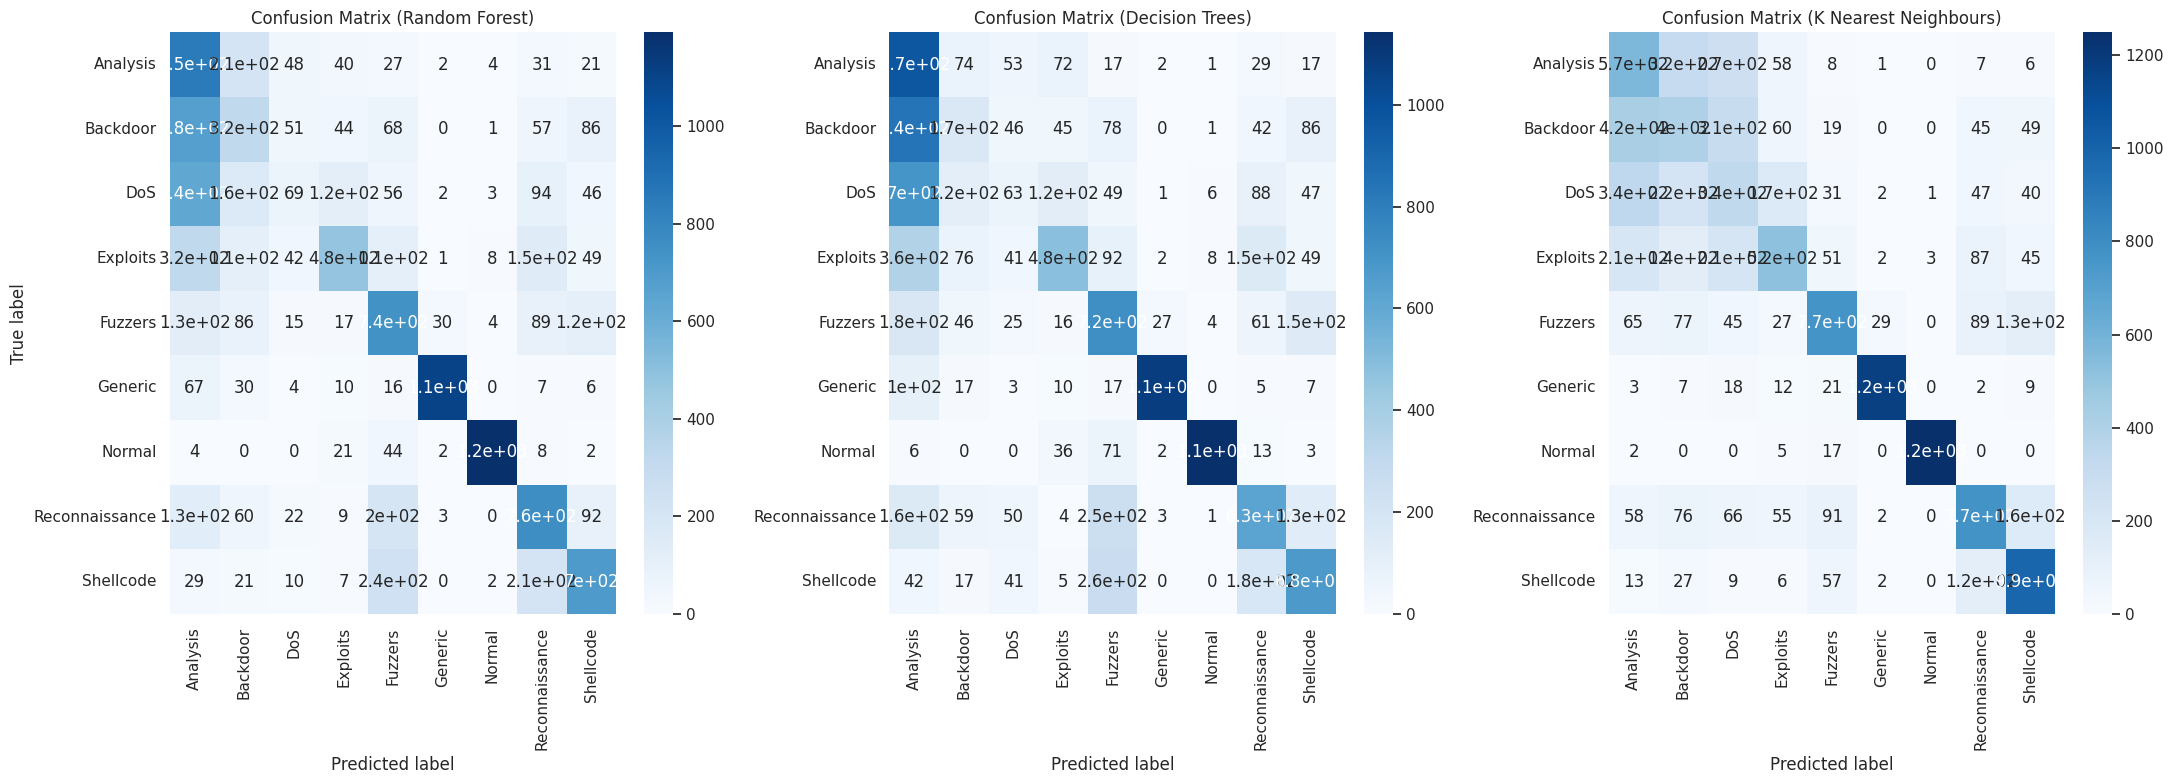

In [ ]:
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

conf_matrix = [confusion_matrix(y_test, y_pred) for y_pred in preds]

fig, axs = plt.subplots(1, 3, figsize = (22, 8))

sns.heatmap(conf_matrix[0], annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[1], annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[2], annot = True, cmap = 'Blues', ax = axs[2], xticklabels = dt1.classes_, yticklabels = dt1.classes_)

axs[0].set_title('Confusion Matrix (Random Forest)')
axs[1].set_title('Confusion Matrix (Decision Trees)')
axs[2].set_title('Confusion Matrix (K Nearest Neighbours)')

axs[0].set_xlabel('Predicted label')
axs[1].set_xlabel('Predicted label')
axs[2].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

fig.tight_layout()
plt.show()